<a href="https://colab.research.google.com/github/jiayeye28/BDML-Life-Insurance/blob/main/BDML_EDA_%26_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**BLUF**
>  In this project, we aim to build an automated classifier and help underwriters in insurance company to review applicants and assign risk classes. We have perform the EDA analysis and identified a few interesting relationship between some features and the response variable, specifically, BMI. Then we preprocessed the data and performed grid search on various models. The final model suggested the model can generalize to predict across the entire distribution to a reasonable degree of accuracy, with highest value belonging to class 8. Some features play a significant role in decision making process, for example, BMI, Medical_History_23, and Product_Info_4. The model could provide some insights regarding each instance potentially aid underwriters in the decision process

## **Business Problem**
> As Prudential, a leading life insurance issuer, seeks to enhance their decision-making capabilities, they are exploring the potential of Supervised Machine Learning (ML) in automating their application process. Specifically, this project aims to leverage ML classifiers to analyze various applicant features that are critical in evaluating risk, thereby influencing policy coverage and quoted premium. By automating this process, Prudential seeks to improve the efficiency and accuracy of their risk assessment procedures.

## **Overview**
> During the preparation stage, our team conduct a comprehensive data exploratory analysis, including pre-processing and feature engineering techniques, to ensure the data is of high quality and suitable for our ML classifier models. Our objective is to accurately predict the response variable by testing several ML classifier models. To optimize the model's performance, we will perform grid search and further calibrate the model, ensuring its validity and robustness.





##**EDA Stage**
> - The dataset consists of 128 columns with 127 predictors and 1 response variable. The target response variable, `Response`, is categorical, representing the final decision associated with an application. Ordinal scale from 1 to 8. Need to dummy encode `Product_Info_2`
- A few columns have many missing values, some represent a large portion of the dataset. Luckily, we believe most missing values could be replaced by 0.
- Some numerical values have outliers and needs to be cleared. And few of the columns are not skewed properly and needs to be taken care of in the preprocessing stage.
- Analyzing the corrlation heatmap, none variable could be the best predictor, as we couldn't identify one with high corrlation with the response variable.



####**Data Description**
The following variables are all categorical (nominal):

> Product_Info_1, Product_Info_2, Product_Info_3, Product_Info_5, Product_Info_6, Product_Info_7, Employment_Info_2, Employment_Info_3, Employment_Info_5, InsuredInfo_1, InsuredInfo_2, InsuredInfo_3, InsuredInfo_4, InsuredInfo_5, InsuredInfo_6, InsuredInfo_7, Insurance_History_1, Insurance_History_2, Insurance_History_3, Insurance_History_4, Insurance_History_7, Insurance_History_8, Insurance_History_9, Family_Hist_1, Medical_History_2, Medical_History_3, Medical_History_4, Medical_History_5, Medical_History_6, Medical_History_7, Medical_History_8, Medical_History_9, Medical_History_11, Medical_History_12, Medical_History_13, Medical_History_14, Medical_History_16, Medical_History_17, Medical_History_18, Medical_History_19, Medical_History_20, Medical_History_21, Medical_History_22, Medical_History_23, Medical_History_25, Medical_History_26, Medical_History_27, Medical_History_28, Medical_History_29, Medical_History_30, Medical_History_31, Medical_History_33, Medical_History_34, Medical_History_35, Medical_History_36, Medical_History_37, Medical_History_38, Medical_History_39, Medical_History_40, Medical_History_41

The following variables are continuous:


> Product_Info_4, Ins_Age, Ht, Wt, BMI, Employment_Info_1, Employment_Info_4, Employment_Info_6, Insurance_History_5, Family_Hist_2, Family_Hist_3, Family_Hist_4, Family_Hist_5

The following variables are discrete:



> Medical_History_1, Medical_History_10, Medical_History_15, Medical_History_24, Medical_History_32

Medical_Keyword_1-48 are dummy variables.

#**Libraries**

In [ ]:
# Basic Libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from scipy.stats.mstats import winsorize
import scipy.stats as ss
import math
from sklearn.utils import resample
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance

#**Importing Data**

In [ ]:
# Load the CSV data file into a Pandas dataframe.
LINK = 'https://raw.githubusercontent.com/mwang164/Prudential-Life-Insurance-Assessment/main/train.csv'
df = pd.read_csv(LINK)

In [ ]:
print(df.shape)

df.head()

(59381, 128)


Id  Product_Info_1 Product_Info_2  Product_Info_3  Product_Info_4  \
0   2               1             D3              10        0.076923   
1   5               1             A1              26        0.076923   
2   6               1             E1              26        0.076923   
3   7               1             D4              10        0.487179   
4   8               1             D2              26        0.230769   

   Product_Info_5  Product_Info_6  Product_Info_7   Ins_Age        Ht  ...  \
0               2               1               1  0.641791  0.581818  ...   
1               2               3               1  0.059701  0.600000  ...   
2               2               3               1  0.029851  0.745455  ...   
3               2               3               1  0.164179  0.672727  ...   
4               2               3               1  0.417910  0.654545  ...   

   Medical_Keyword_40  Medical_Keyword_41  Medical_Keyword_42  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   0   
4                   0                   0                   0   

   Medical_Keyword_43  Medical_Keyword_44  Medical_Keyword_45  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   0   
4                   0                   0                   0   

   Medical_Keyword_46  Medical_Keyword_47  Medical_Keyword_48  Response  
0                   0                   0                   0         8  
1                   0                   0                   0         4  
2                   0                   0                   0         8  
3                   0                   0                   0         8  
4                   0                   0                   0         8  

[5 rows x 128 columns]

In [ ]:
# Set 'id' as the index column
df.set_index('Id', inplace=True)

df.head()

Product_Info_1 Product_Info_2  Product_Info_3  Product_Info_4  \
Id                                                                  
2                1             D3              10        0.076923   
5                1             A1              26        0.076923   
6                1             E1              26        0.076923   
7                1             D4              10        0.487179   
8                1             D2              26        0.230769   

    Product_Info_5  Product_Info_6  Product_Info_7   Ins_Age        Ht  \
Id                                                                       
2                2               1               1  0.641791  0.581818   
5                2               3               1  0.059701  0.600000   
6                2               3               1  0.029851  0.745455   
7                2               3               1  0.164179  0.672727   
8                2               3               1  0.417910  0.654545   

          Wt  ...  Medical_Keyword_40  Medical_Keyword_41  Medical_Keyword_42  \
Id            ...                                                               
2   0.148536  ...                   0                   0                   0   
5   0.131799  ...                   0                   0                   0   
6   0.288703  ...                   0                   0                   0   
7   0.205021  ...                   0                   0                   0   
8   0.234310  ...                   0                   0                   0   

    Medical_Keyword_43  Medical_Keyword_44  Medical_Keyword_45  \
Id                                                               
2                    0                   0                   0   
5                    0                   0                   0   
6                    0                   0                   0   
7                    0                   0                   0   
8                    0                   0                   0   

    Medical_Keyword_46  Medical_Keyword_47  Medical_Keyword_48  Response  
Id                                                                        
2                    0                   0                   0         8  
5                    0                   0                   0         4  
6                    0                   0                   0         8  
7                    0                   0                   0         8  
8                    0                   0                   0         8  

[5 rows x 127 columns]

#**Target Variables**

In [ ]:
# Check value counts for each
df['Response'].value_counts()

8    19475
6    11228
7     8025
2     6550
1     6203
5     5430
4     1427
3     1013
Name: Response, dtype: int64

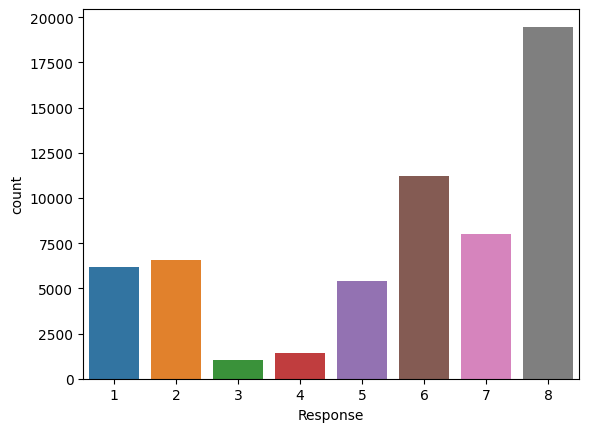

In [ ]:
# Check the distribution of response variable
sns.countplot(x=df['Response']);
# What to do? do we group them in binay 0 & 1 ?
# Combine the sparse categories together

#**EDA**

## **Duplicates**


In [ ]:
# Check for duplicates
print('\n Duplicates\n',df.duplicated().sum())


 Duplicates
 30


In [ ]:
# drop duplicates
df = df.drop_duplicates()
# Check for duplicates
print('\n Duplicates:',df.duplicated().sum())


 Duplicates: 0


## **Missing Values**

In [ ]:
# assume missing_cols is the Series containing the count of missing values for each column
missing_cols = df.isnull().sum()
missing_cols = missing_cols[missing_cols > 0]

# convert Series to dataframe
missing_df = pd.DataFrame(missing_cols, columns=['missing_count'])

# add percentage column
total_rows = len(df)
missing_df['missing_percent'] = missing_df['missing_count'].apply(lambda x: round((x / total_rows) * 100, 2))

missing_df

missing_count  missing_percent
Employment_Info_1               19             0.03
Employment_Info_4             6777            11.42
Employment_Info_6            10851            18.28
Insurance_History_5          25388            42.78
Family_Hist_2                28644            48.26
Family_Hist_3                34223            57.66
Family_Hist_4                19176            32.31
Family_Hist_5                41789            70.41
Medical_History_1             8885            14.97
Medical_History_10           58794            99.06
Medical_History_15           44570            75.10
Medical_History_24           55553            93.60
Medical_History_32           58244            98.13

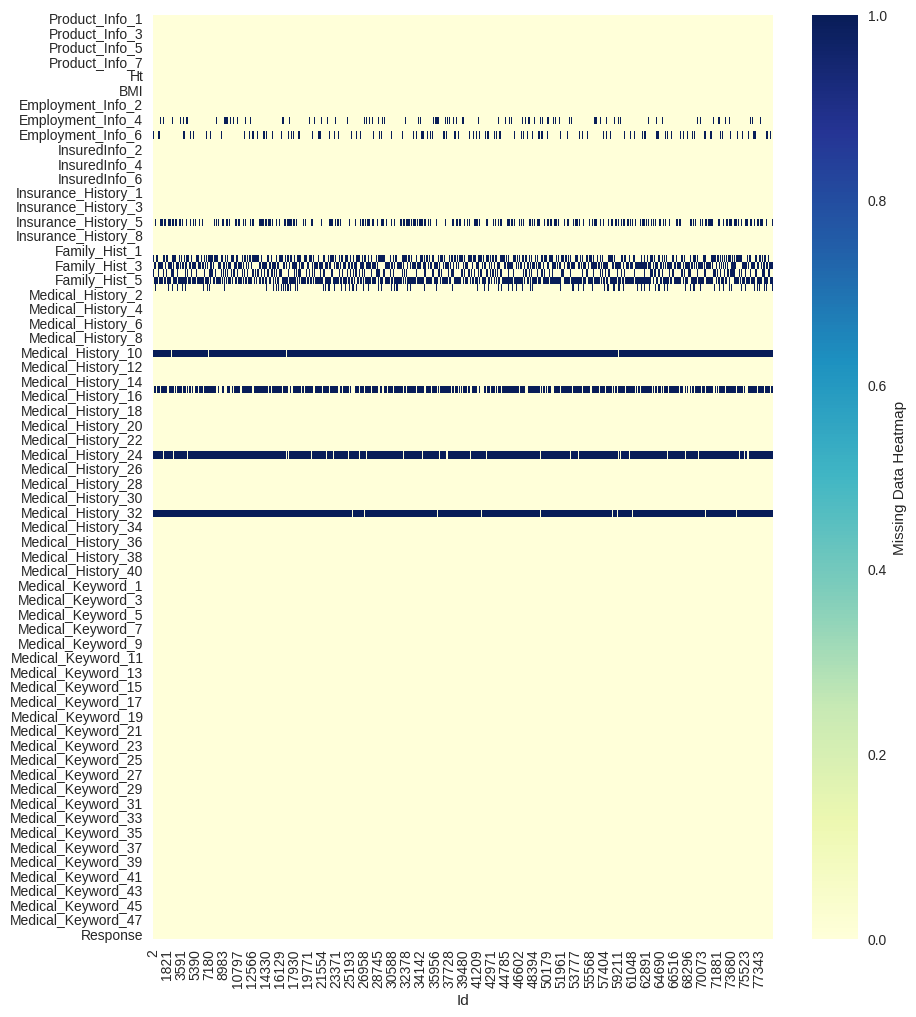

In [ ]:
# Missing value heatmap
plt.figure(figsize=(10,12))
sns.heatmap(df.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data Heatmap'})
plt.show()

## **EDA Data Preprocess**

In [ ]:
# Check data types
df.select_dtypes(include=['float64']).columns

# Need to convert the rest from int64 to object

Index(['Product_Info_4', 'Ins_Age', 'Ht', 'Wt', 'BMI', 'Employment_Info_1',
       'Employment_Info_4', 'Employment_Info_6', 'Insurance_History_5',
       'Family_Hist_2', 'Family_Hist_3', 'Family_Hist_4', 'Family_Hist_5',
       'Medical_History_1', 'Medical_History_10', 'Medical_History_15',
       'Medical_History_24', 'Medical_History_32'],
      dtype='object')

In [ ]:
# Create a df_object with object and float variables,
# as all numerical vairbles are normalized
df_object = df.copy()

# change all int columns to object
int_columns = df_object.select_dtypes(include=['int64']).columns
df_object[int_columns] = df_object[int_columns].astype('object')

# Making lists with categorical and numerical features.
categorical =  [col for col in df_object.columns if df_object[col].dtype =='object']
numerical =  [col for col in df_object.columns if df_object[col].dtype !='object']

In [ ]:
# Splitting Variables to Smaller Sets
# A set of normalized variables relating to the product applied for
ColSet1_ProdInfo = ['Product_Info_{}'.format(i) for i in range(1, 8)]

# Normalized age, height, weight, and BMI of applicant
ColSet2_ApplicantInfo = ['Ins_Age','Ht','Wt','BMI']

# A set of normalized variables relating to the employment history of the applicant
ColSet3_EmploymentInfo = ['Employment_Info_{}'.format(i) for i in range(1, 7)]

# A set of normalized variables providing information about the applicant
ColSet4_InsuredInfo = ['InsuredInfo_{}'.format(i) for i in range(1, 8)]

# A set of normalized variables relating to the insurance history of the applicant, skipping 6, not included in df
ColSet5_InsuranceHistoryInfo = ['Insurance_History_{}'.format(i) for i in range(1, 10) if i != 6]

# A set of normalized variables relating to the family history of the applicant.
ColSet6_FamilyHistoryInfo = ['Family_Hist_{}'.format(i) for i in range(1, 6)]

# A set of normalized variables relating to the medical history of the applicant.
ColSet7_MedicalHistoryInfo = ['Medical_History_{}'.format(i) for i in range(1, 42)]

# A set of dummy variables relating to the presence of/absence of a medical keyword being associated with the application.
ColSet8_MedicalKeywordInfo = ['Medical_Keyword_{}'.format(i) for i in range(1, 49)]

## **Distruibution Plots**

### *Applicant Info*

float64


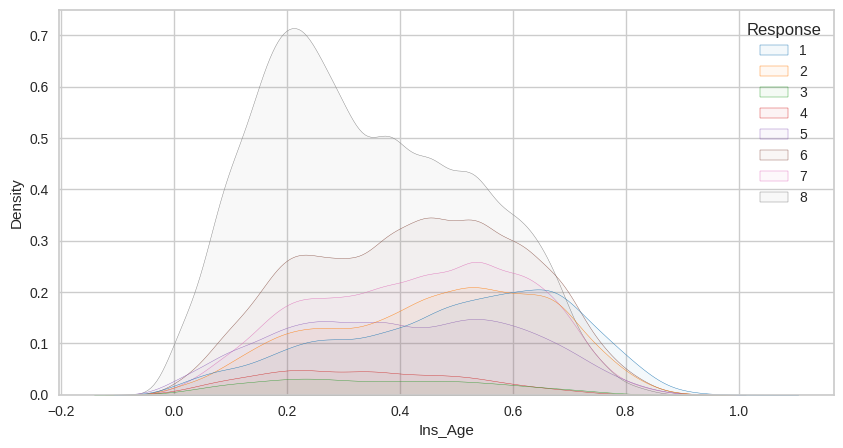

float64


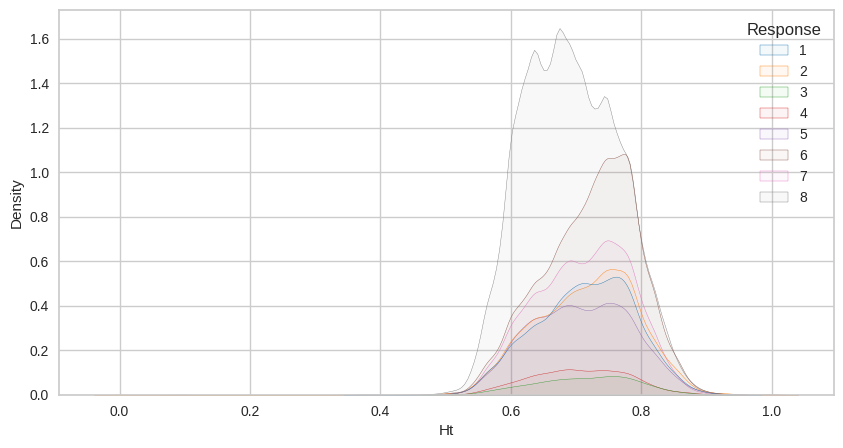

float64


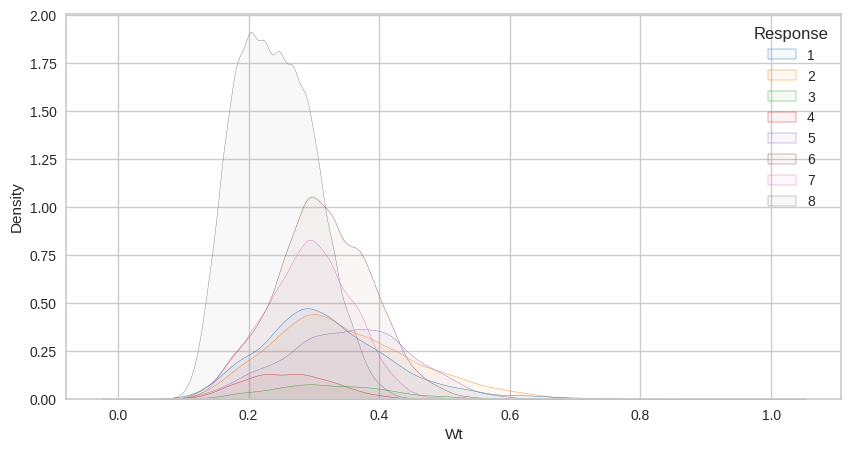

float64


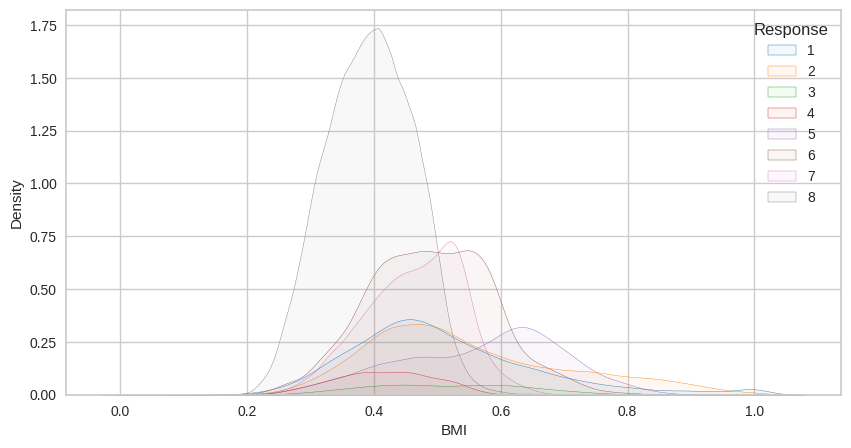

In [ ]:
# Countplot categoricals and density plot for quant variables
for i in df_object[ColSet2_ApplicantInfo].columns:
  print(df_object.dtypes[i])
  if df_object.dtypes[i] == 'object':
    plt.figure(figsize = (10,5))
    sns.countplot(x = i, hue = "Response", data = df_object, palette='tab10')
    plt.show()
  if df_object.dtypes[i] == 'int64' or df_object.dtypes[i] == 'float64':
    plt.figure(figsize = (10,5))
    sns.kdeplot(data=df_object,
                x=i,
                hue="Response", fill=True, common_norm=True, alpha=0.05, palette='tab10')
    plt.show()

### *Product Info*

object


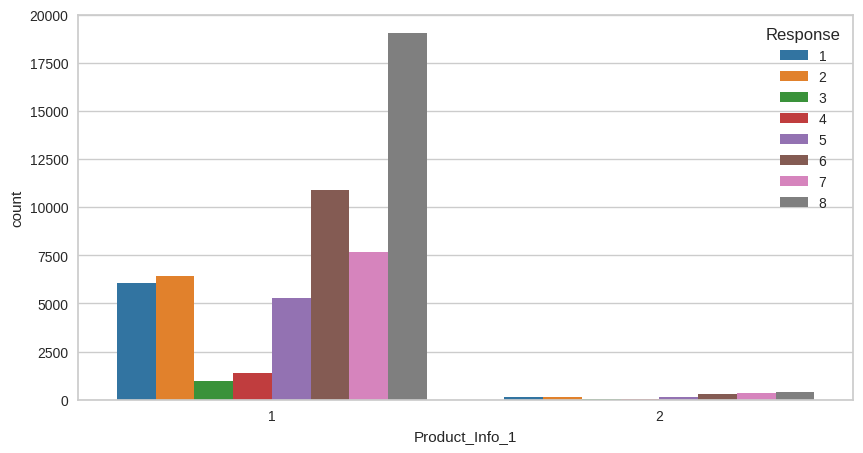

object


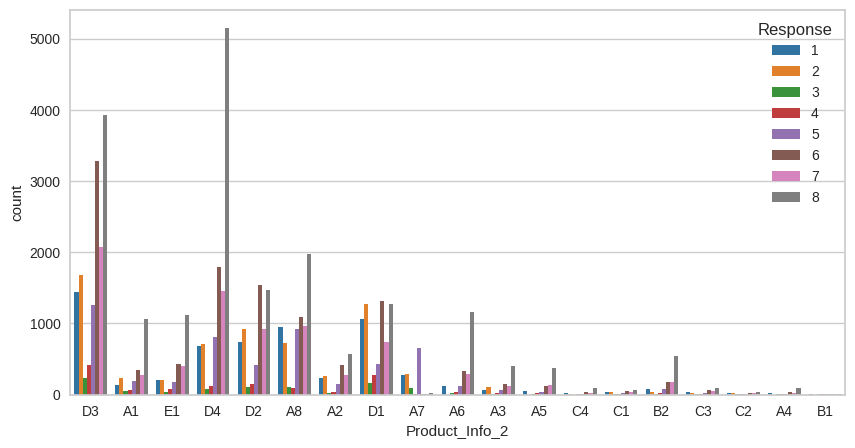

object


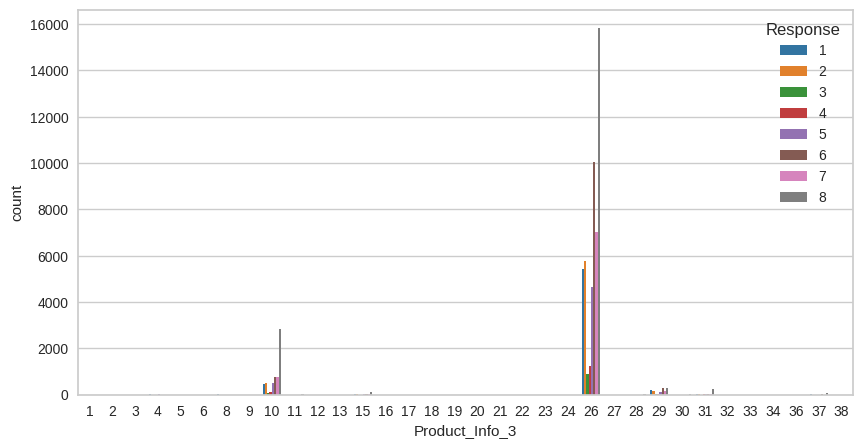

float64


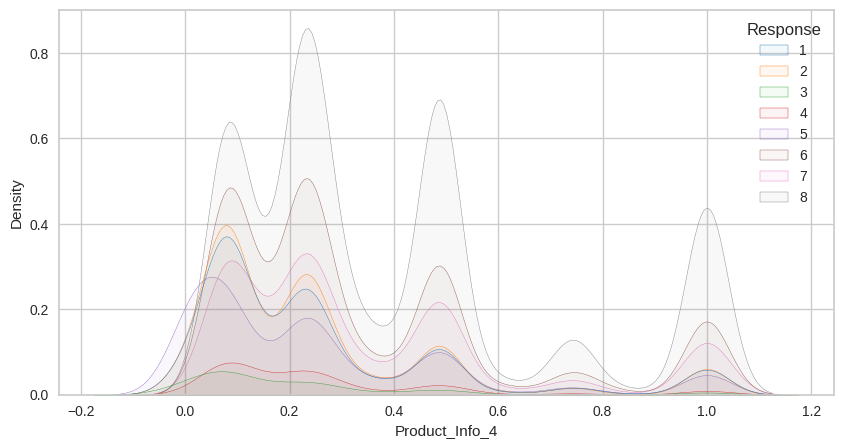

object


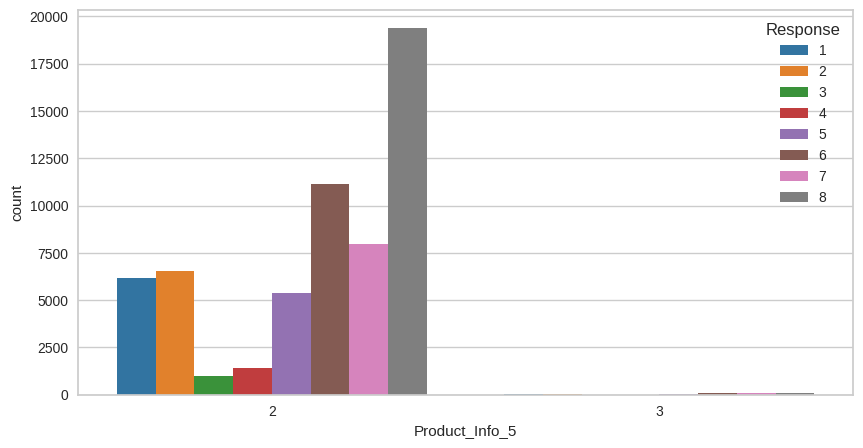

object


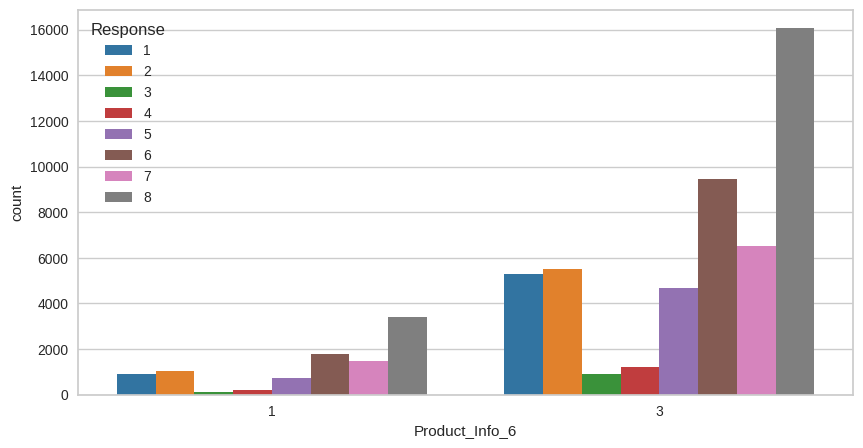

object


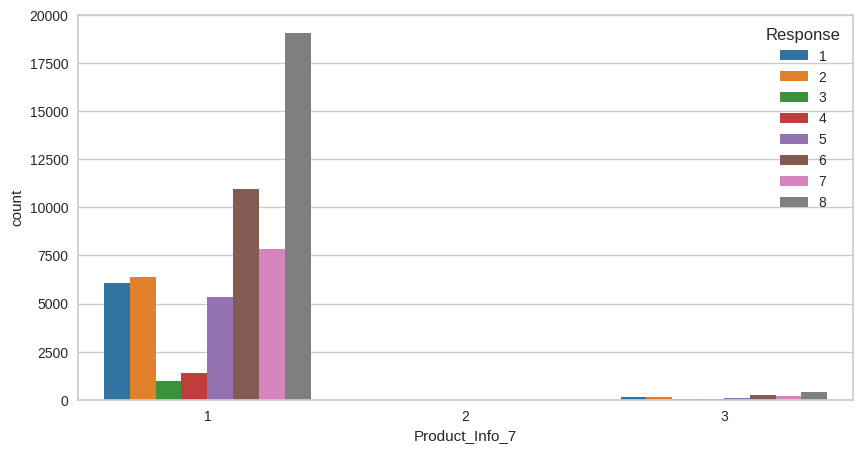

In [ ]:
# Countplot categoricals and density plot for quant variables
for i in df_object[ColSet1_ProdInfo].columns:
  print(df_object.dtypes[i])
  if df_object.dtypes[i] == 'object':
    plt.figure(figsize = (10,5))
    sns.countplot(x = i, hue = "Response", data = df_object, palette='tab10')
    plt.show()
  if df_object.dtypes[i] == 'int64' or df_object.dtypes[i] == 'float64':
    plt.figure(figsize = (10,5))
    sns.kdeplot(data=df_object,
                x=i,
                hue="Response", fill=True, common_norm=True, alpha=0.05, palette='tab10')
    plt.show()

### *EmploymentInfo*

float64


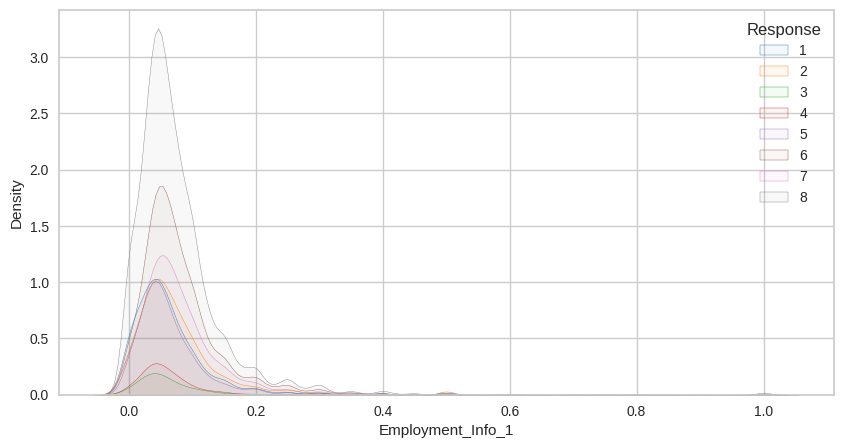

object


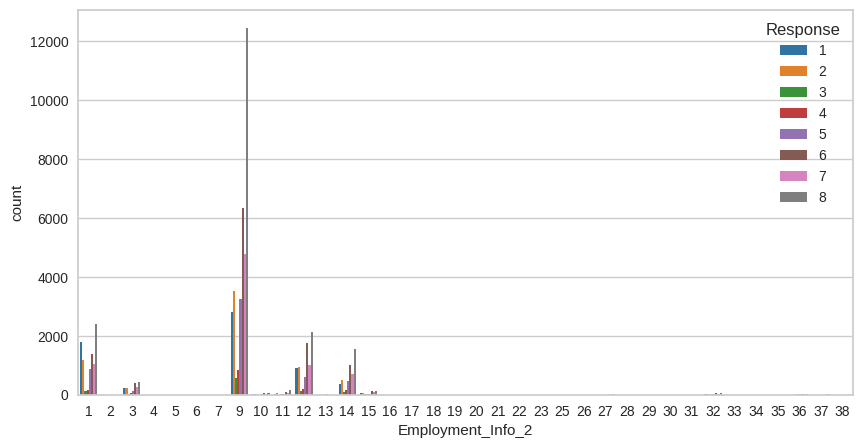

object


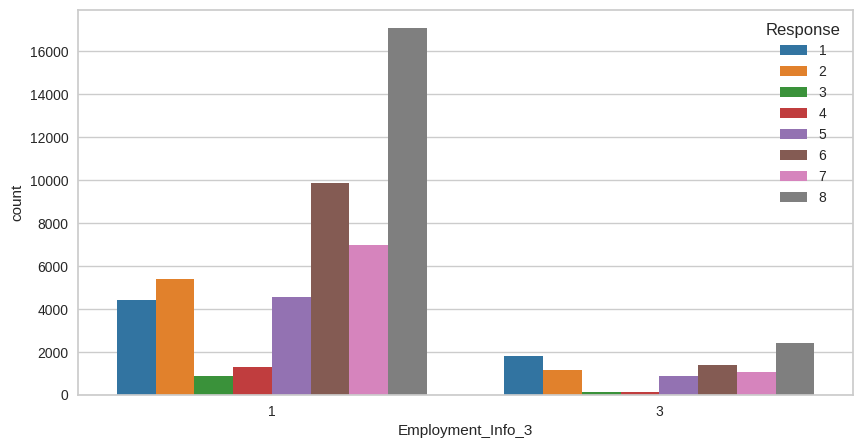

float64


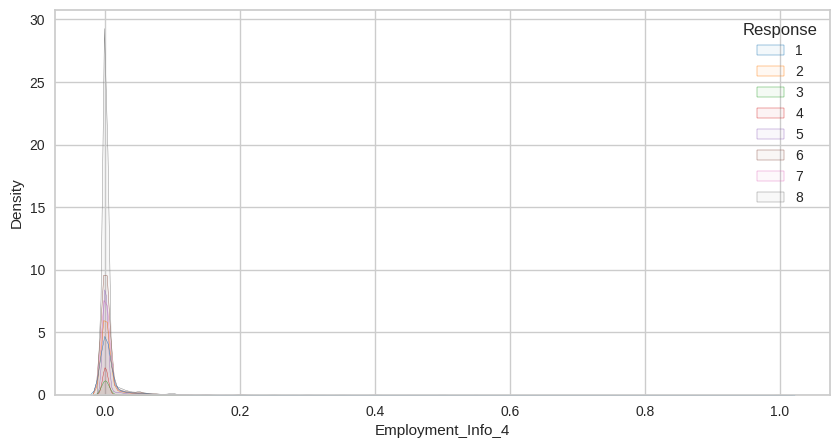

object


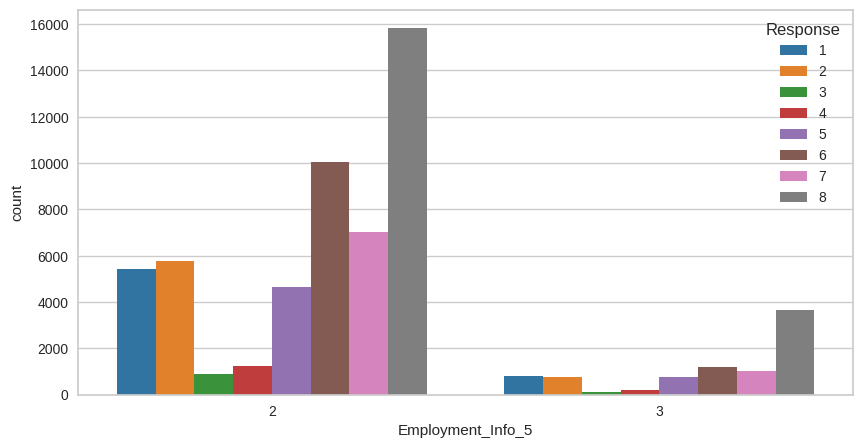

float64


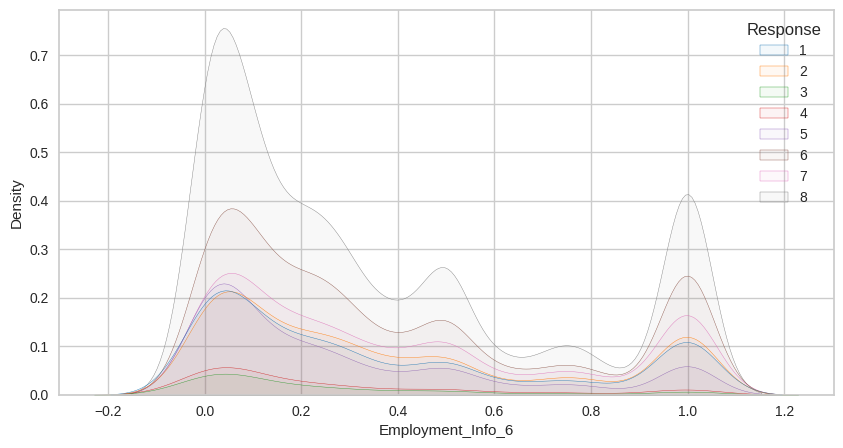

In [ ]:
# Countplot categoricals and density plot for quant variables
for i in df_object[ColSet3_EmploymentInfo].columns:
  print(df_object.dtypes[i])
  if df_object.dtypes[i] == 'object':
    plt.figure(figsize = (10,5))
    sns.countplot(x = i, hue = "Response", data = df_object, palette='tab10')
    plt.show()
  if df_object.dtypes[i] == 'int64' or df_object.dtypes[i] == 'float64':
    plt.figure(figsize = (10,5))
    sns.kdeplot(data=df_object,
                x=i,
                hue="Response", fill=True, common_norm=True, alpha=0.05, palette='tab10')
    plt.show()

###*InsuredInfo*

object


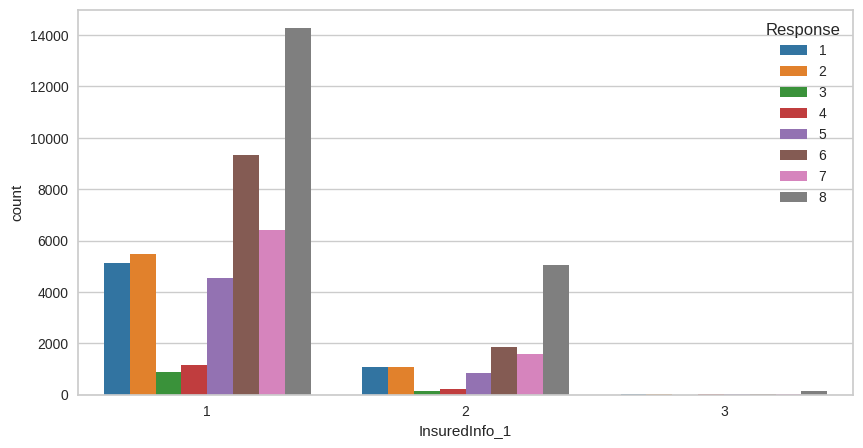

object


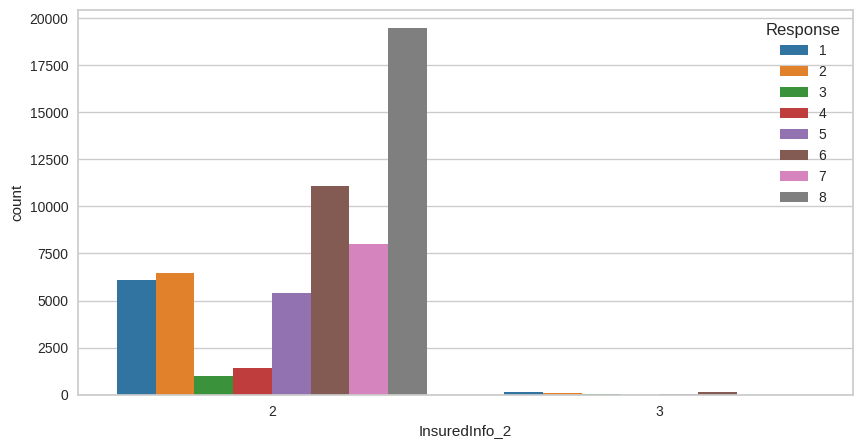

object


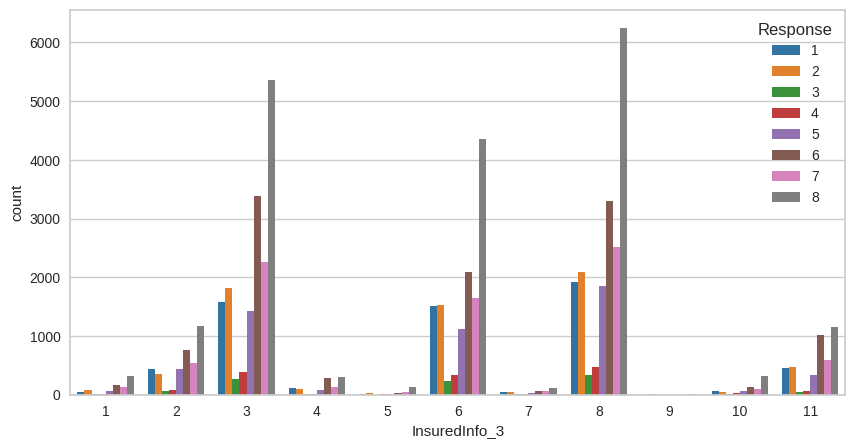

object


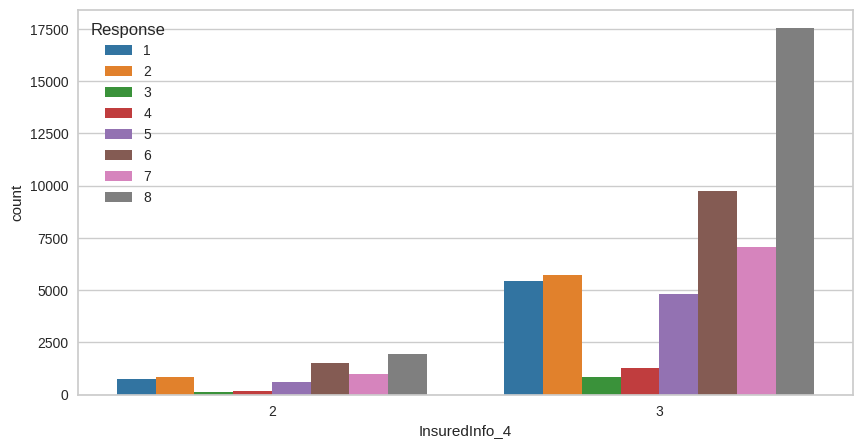

object


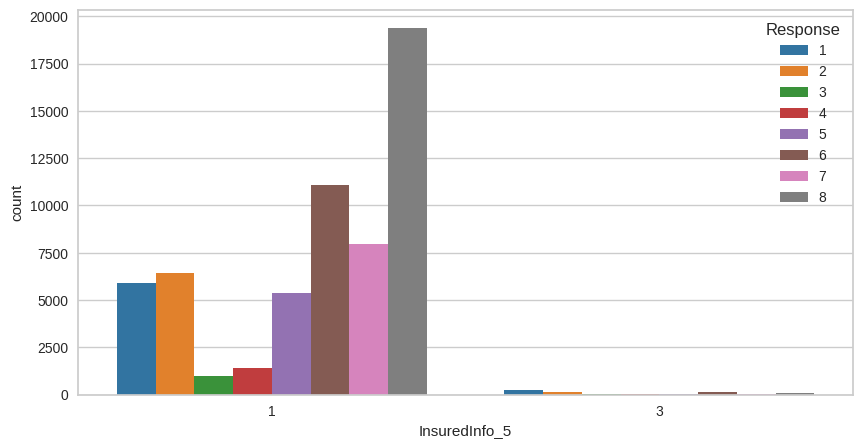

object


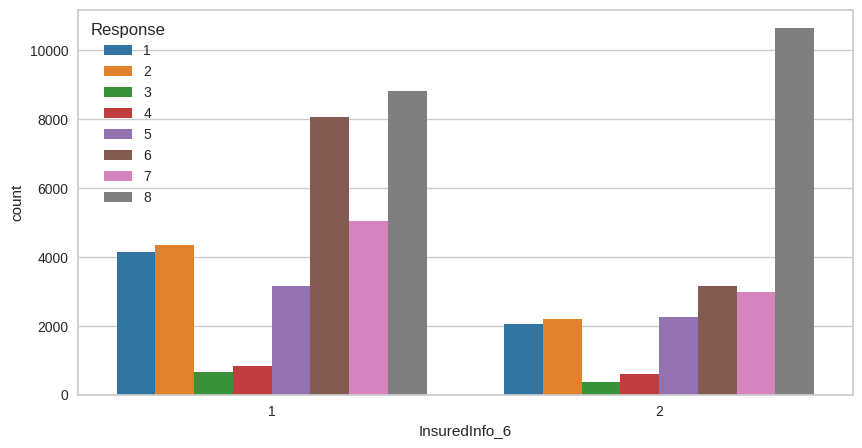

object


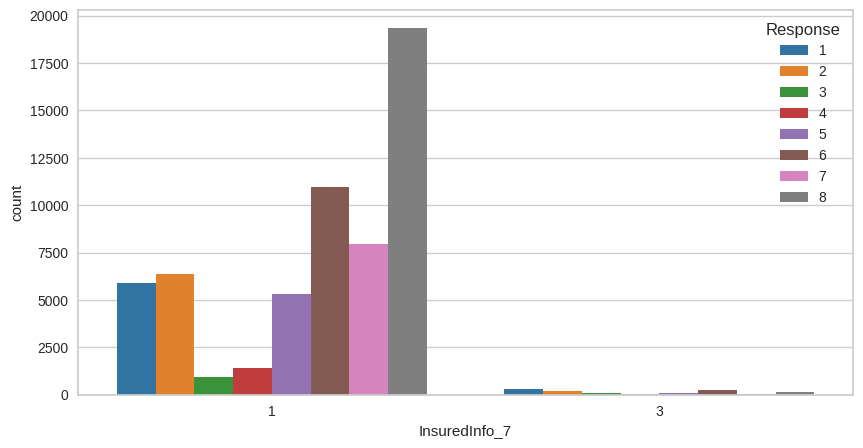

In [ ]:
# Countplot categoricals and density plot for quant variables
for i in df_object[ColSet4_InsuredInfo].columns:
  print(df_object.dtypes[i])
  if df_object.dtypes[i] == 'object':
    plt.figure(figsize = (10,5))
    sns.countplot(x = i, hue = "Response", data = df_object, palette='tab10')
    plt.show()
  if df_object.dtypes[i] == 'int64' or df_object.dtypes[i] == 'float64':
    plt.figure(figsize = (10,5))
    sns.kdeplot(data=df_object,
                x=i,
                hue="Response", fill=True, common_norm=True, alpha=0.05, palette='tab10')
    plt.show()

###*InsurancyHistoryInfo*

object


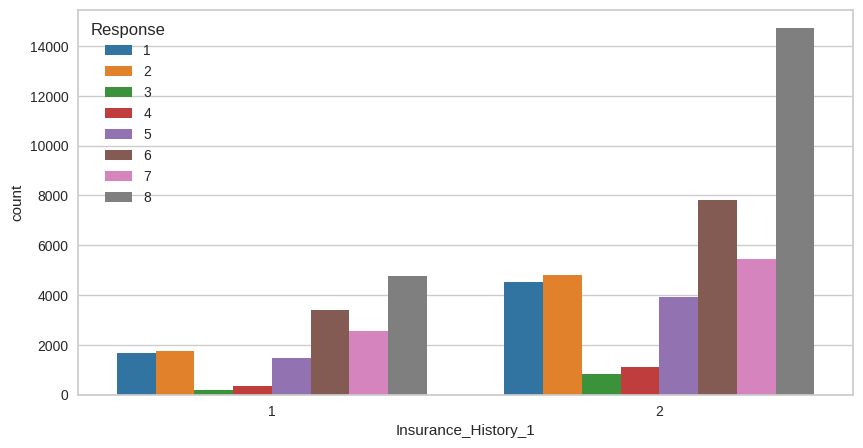

object


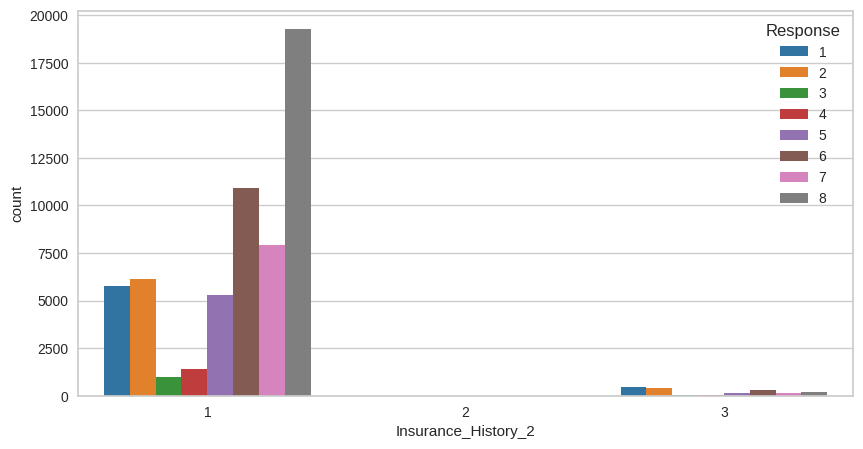

object


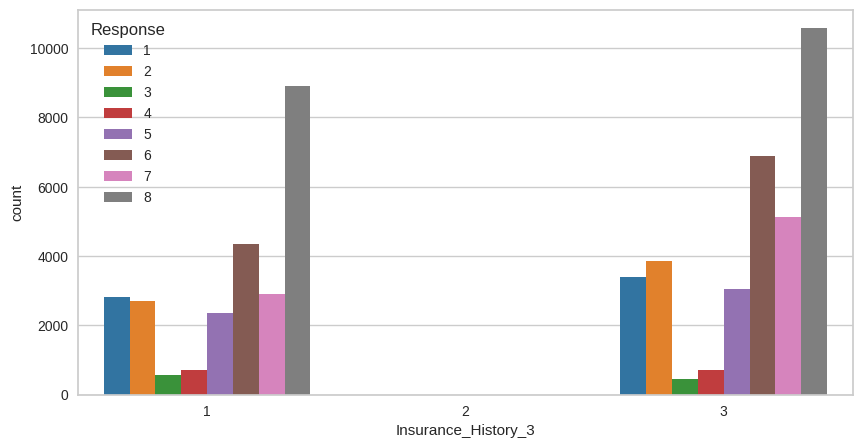

object


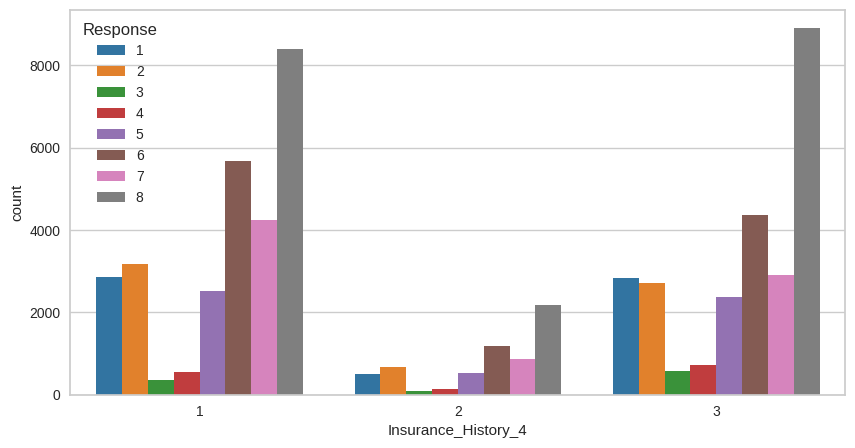

float64


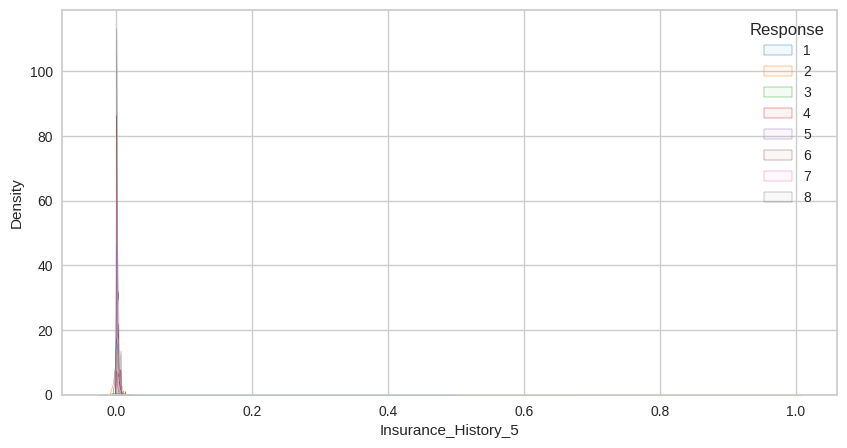

object


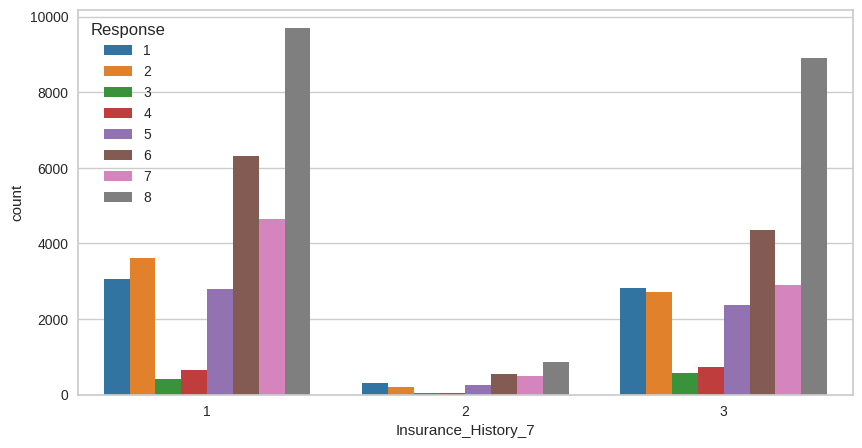

object


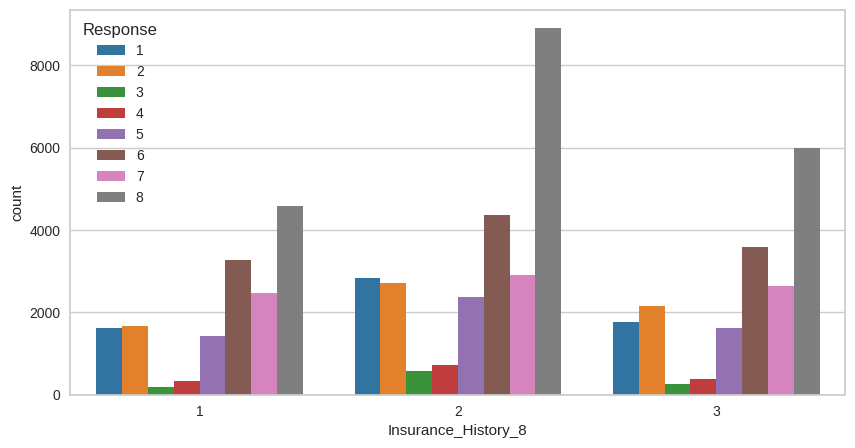

object


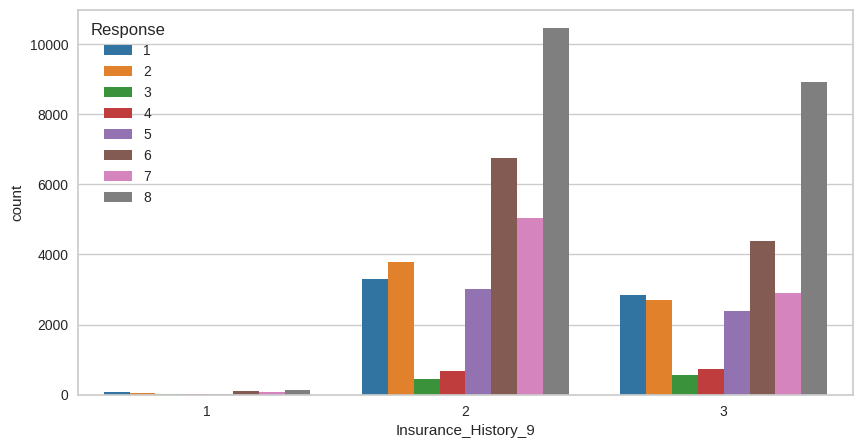

In [ ]:
# Countplot categoricals and density plot for quant variables
for i in df_object[ColSet5_InsuranceHistoryInfo].columns:
  print(df_object.dtypes[i])
  if df_object.dtypes[i] == 'object':
    plt.figure(figsize = (10,5))
    sns.countplot(x = i, hue = "Response", data = df_object, palette='tab10')
    plt.show()
  if df_object.dtypes[i] == 'int64' or df_object.dtypes[i] == 'float64':
    plt.figure(figsize = (10,5))
    sns.kdeplot(data=df_object,
                x=i,
                hue="Response", fill=True, common_norm=True, alpha=0.05, palette='tab10')
    plt.show()

### *FamilyHistoryInfo*

object


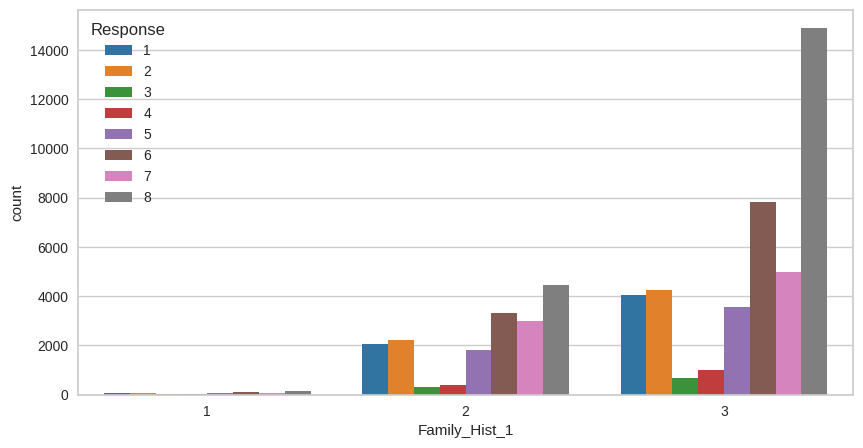

float64


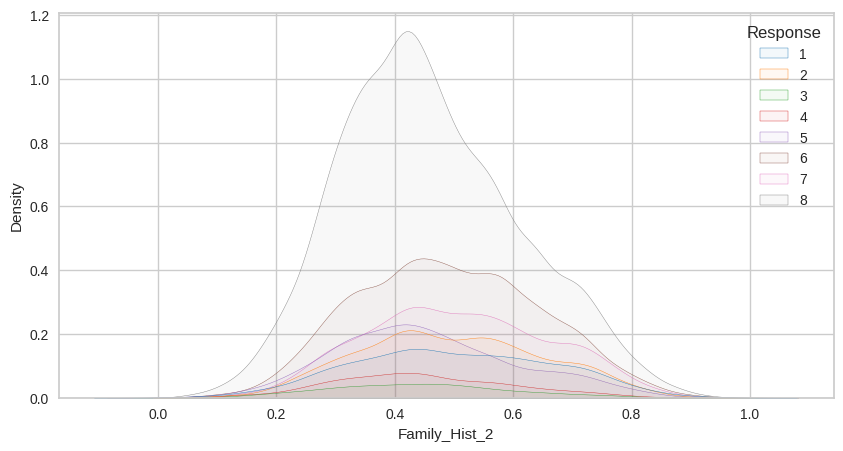

float64


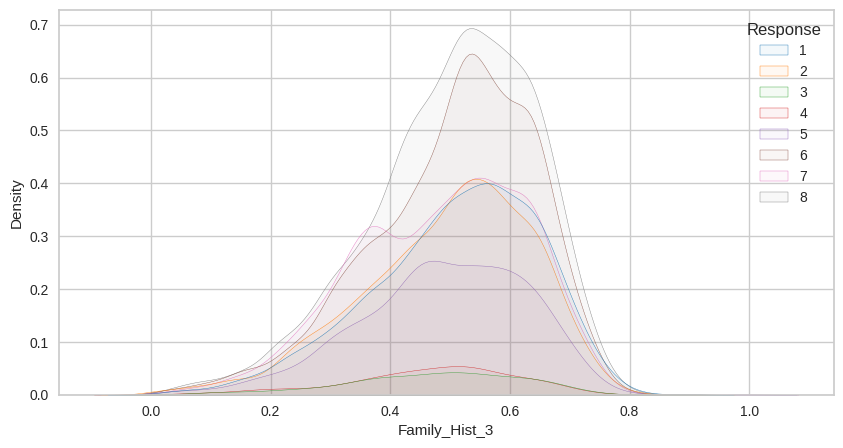

float64


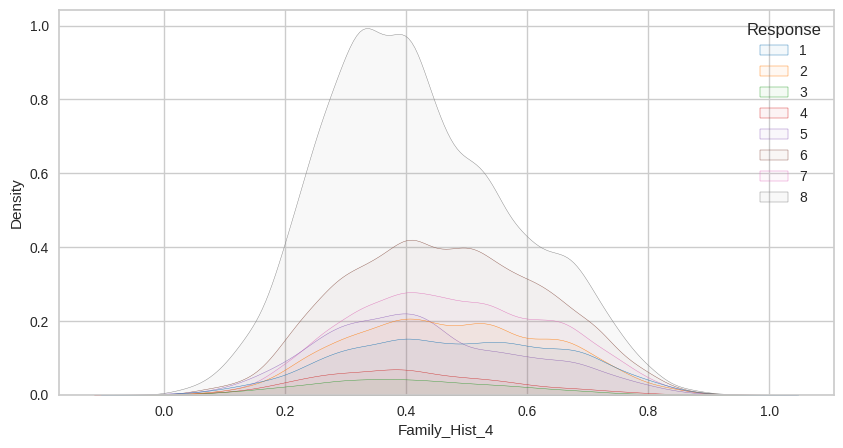

float64


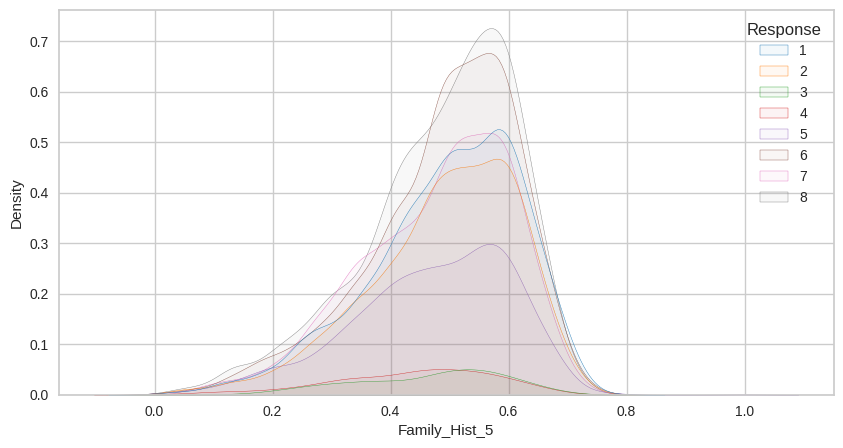

In [ ]:
# Countplot categoricals and density plot for quant variables
for i in df_object[ColSet6_FamilyHistoryInfo].columns:
  print(df_object.dtypes[i])
  if df_object.dtypes[i] == 'object':
    plt.figure(figsize = (10,5))
    sns.countplot(x = i, hue = "Response", data = df_object, palette='tab10')
    plt.show()
  if df_object.dtypes[i] == 'int64' or df_object.dtypes[i] == 'float64':
    plt.figure(figsize = (10,5))
    sns.kdeplot(data=df_object,
                x=i,
                hue="Response", fill=True, common_norm=True, alpha=0.05, palette='tab10')
    plt.show()

### *MedicalHistoryInfo*

float64


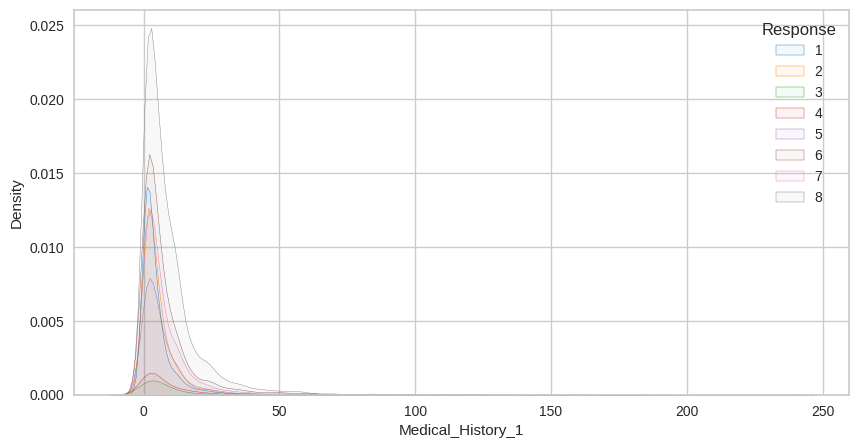

object


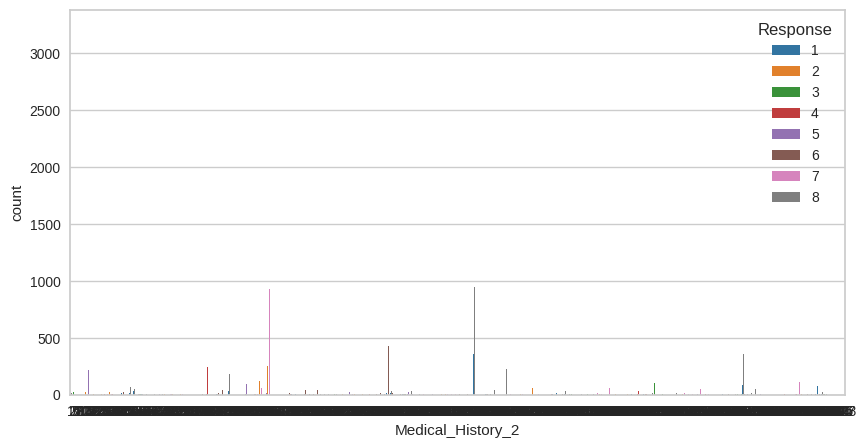

object


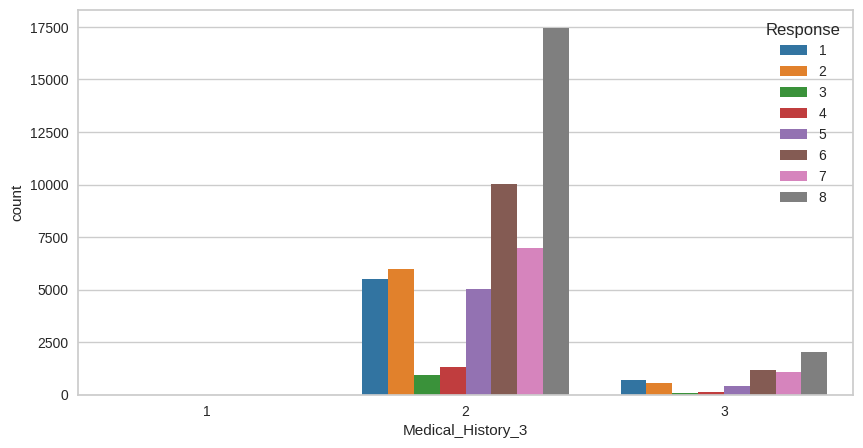

object


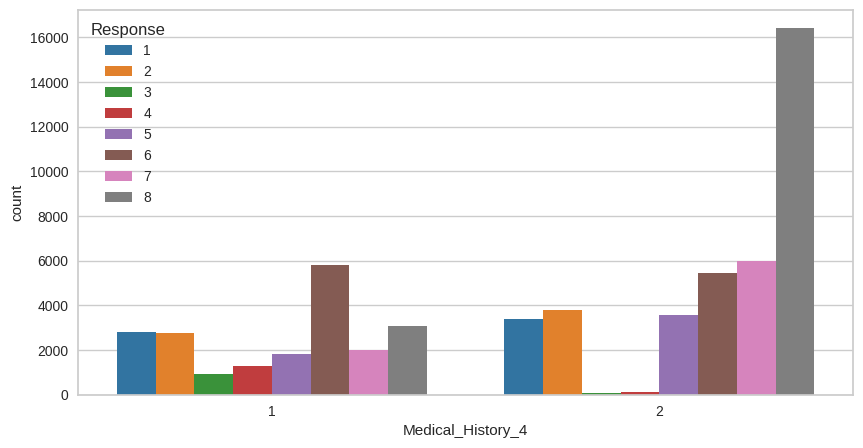

object


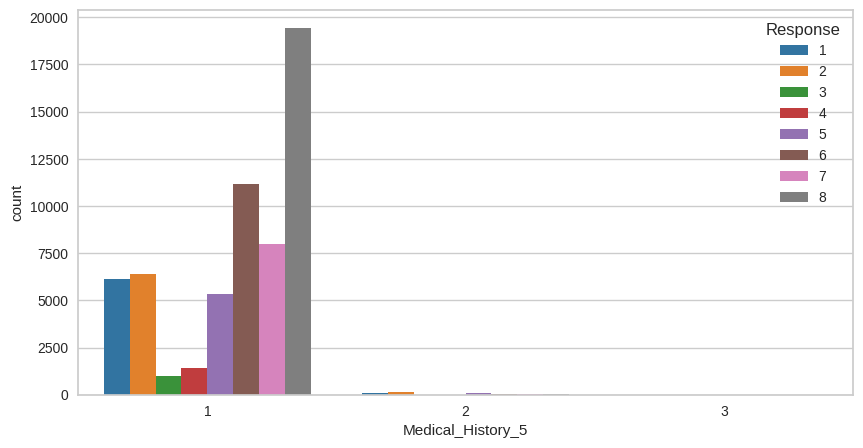

object


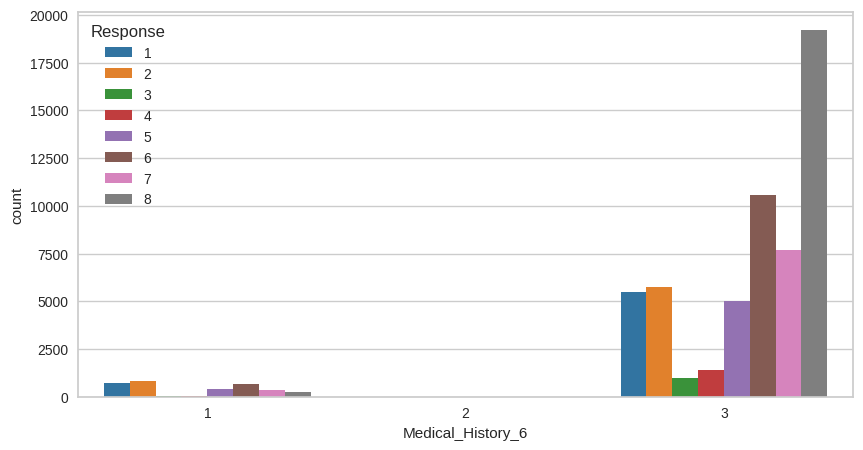

object


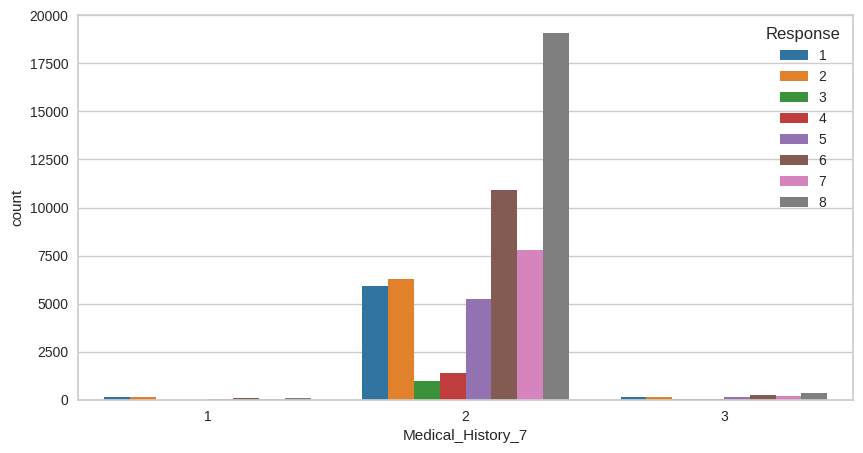

object


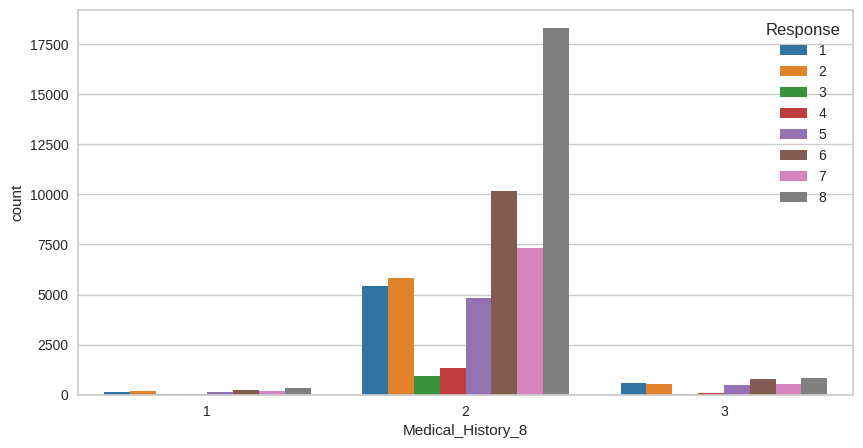

object


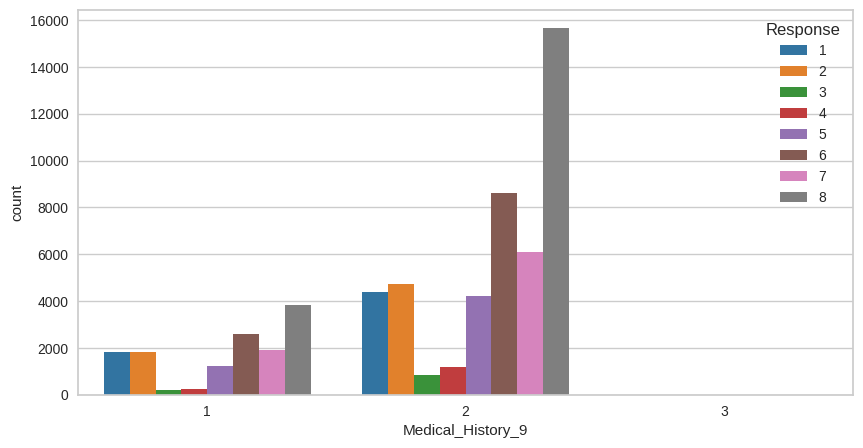

float64


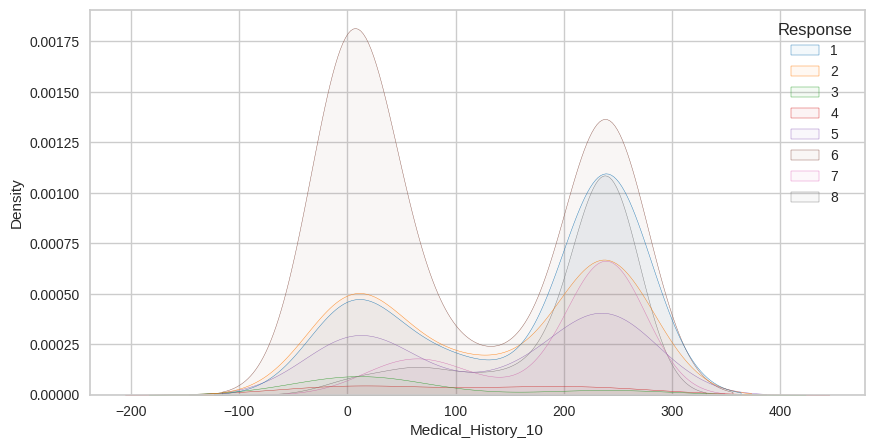

object


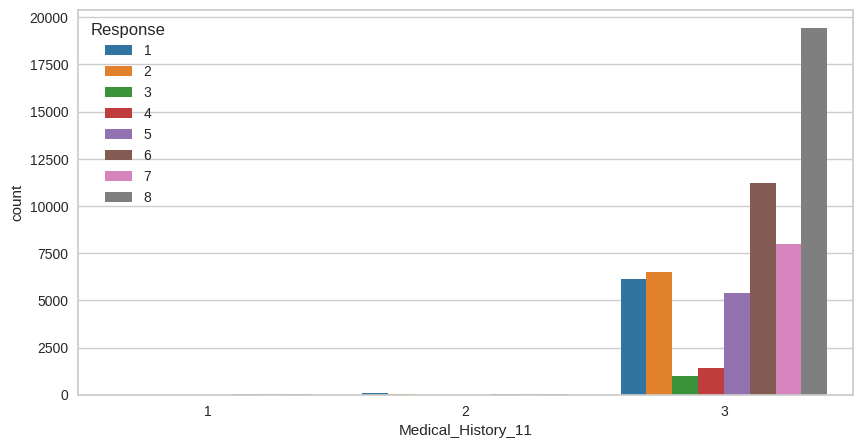

object


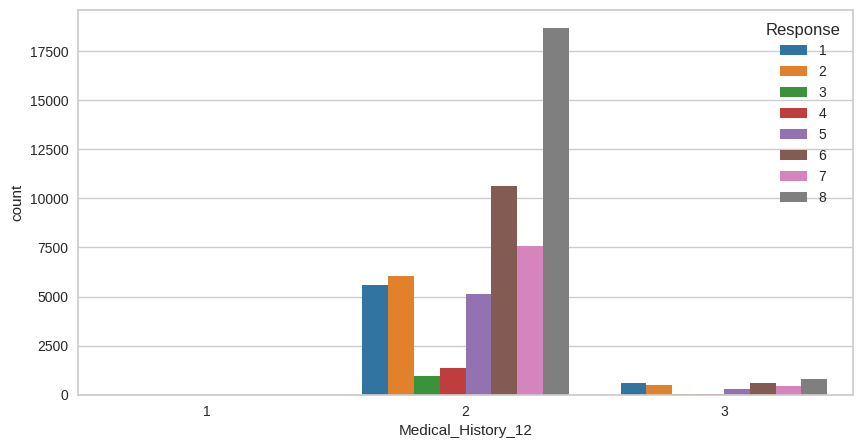

object


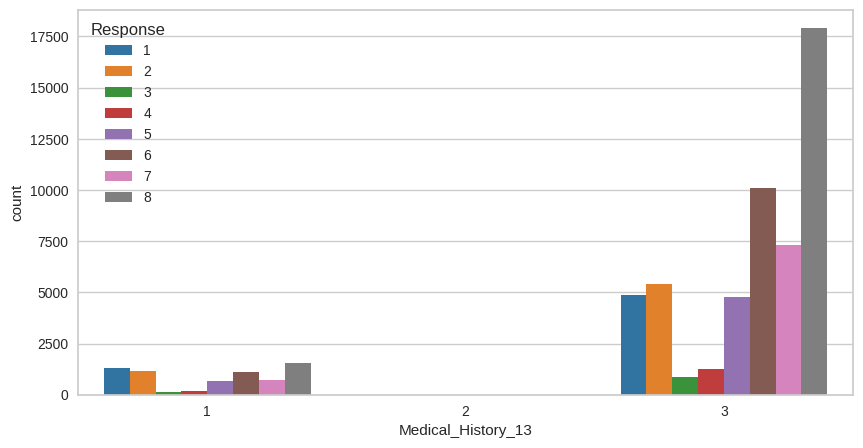

object


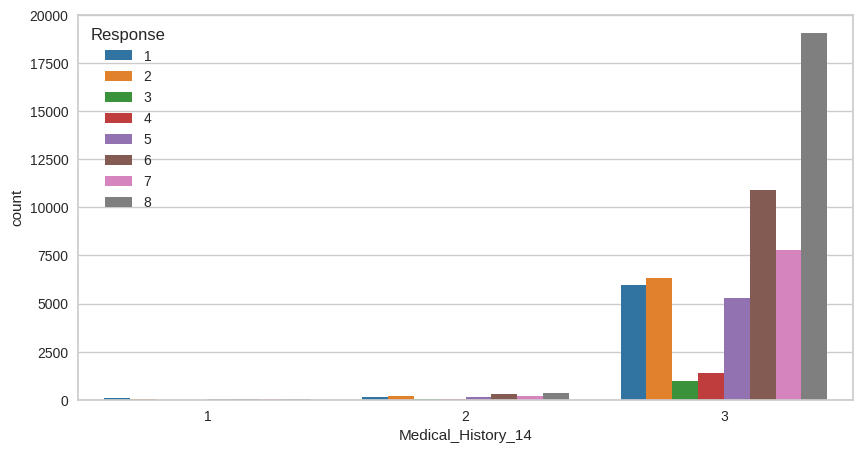

float64


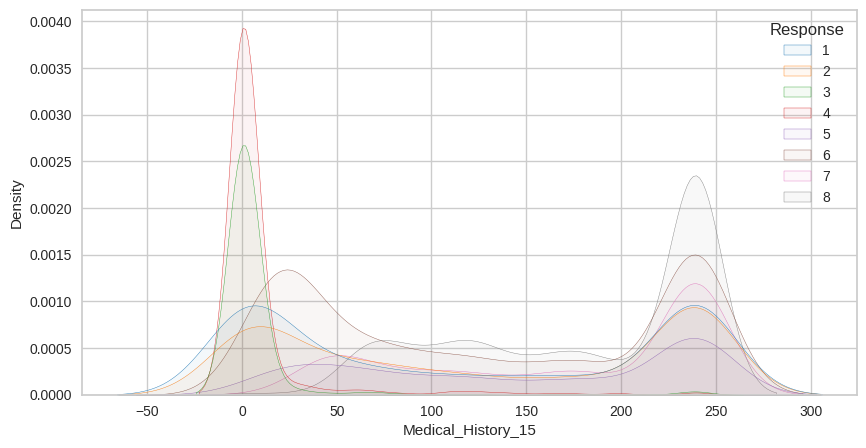

object


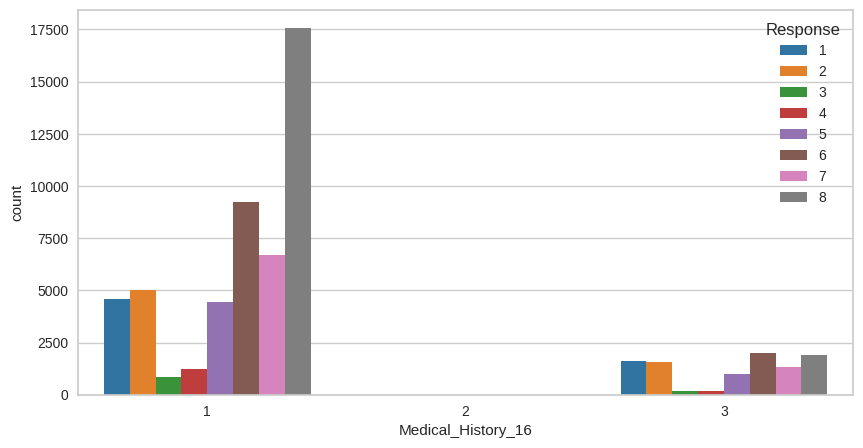

object


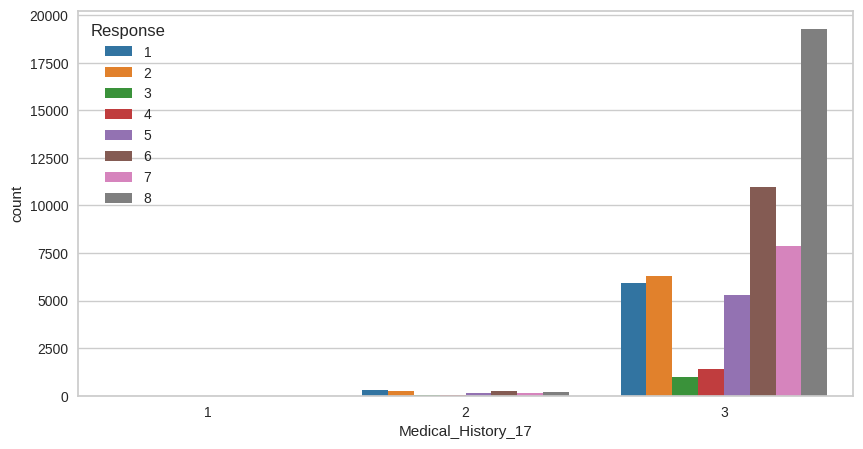

object


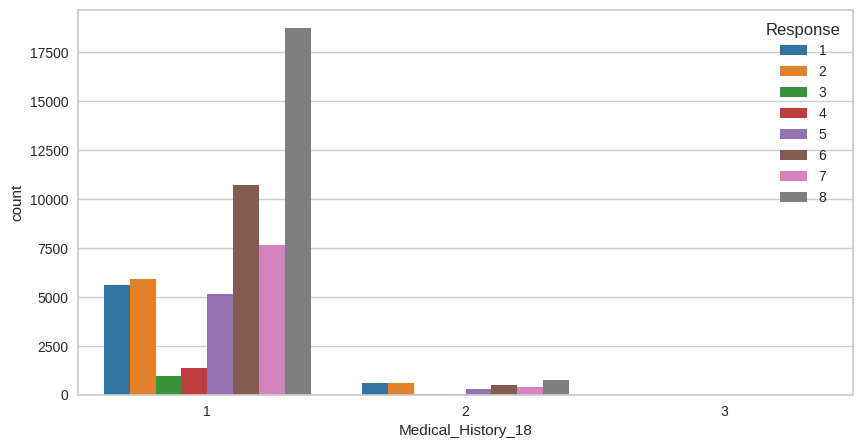

object


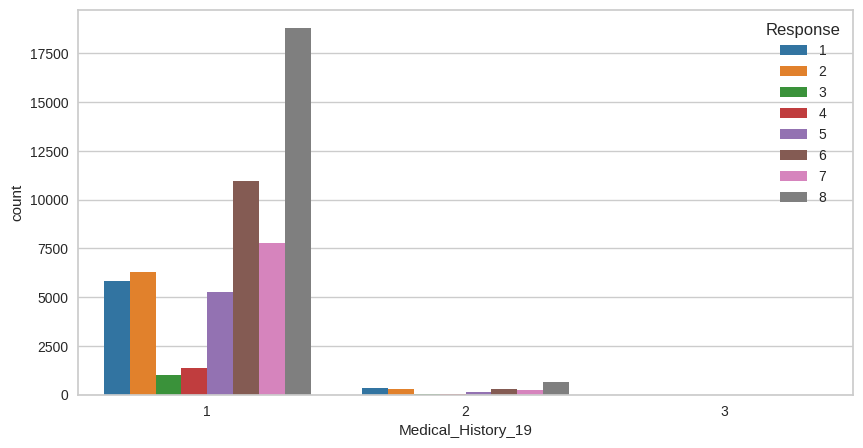

object


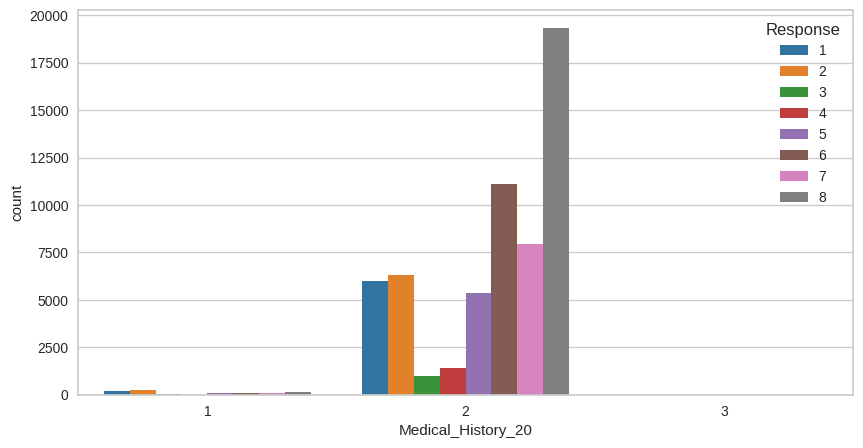

object


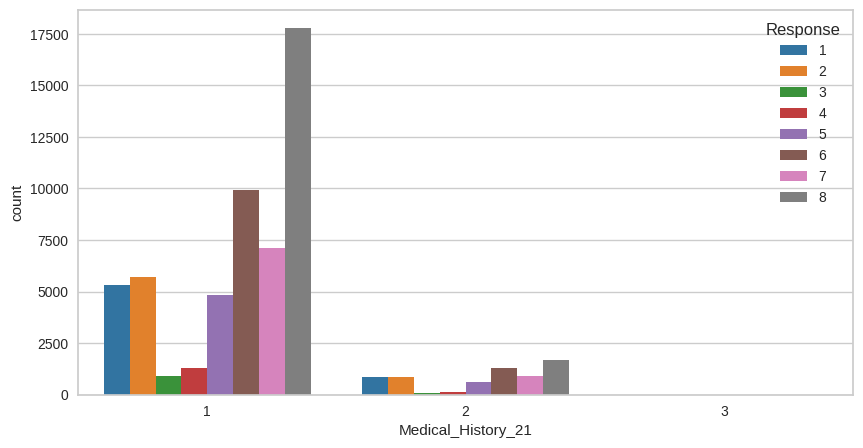

object


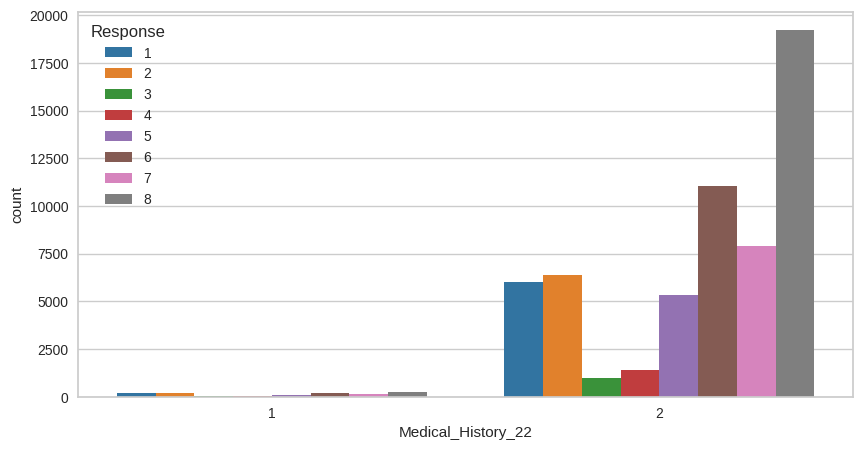

object


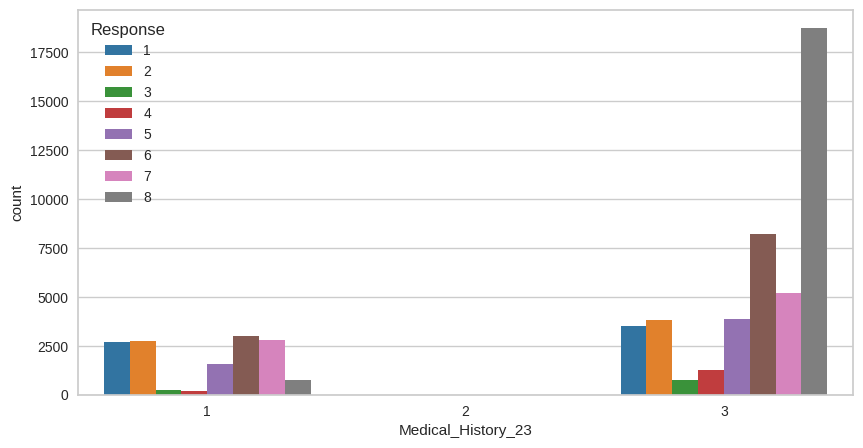

float64


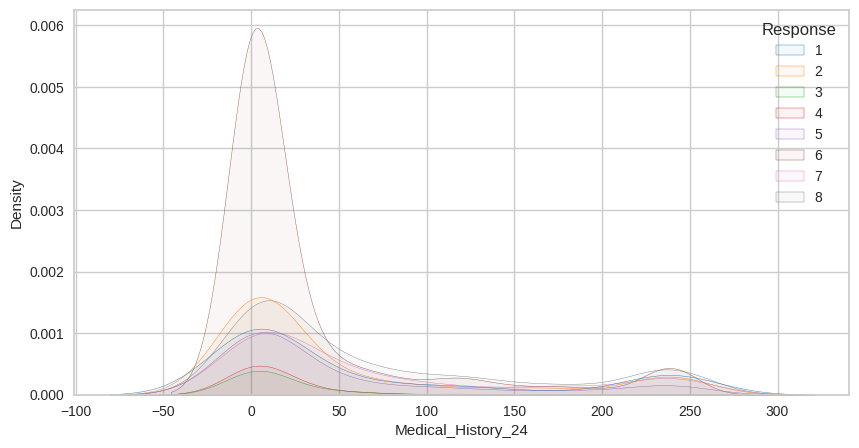

object


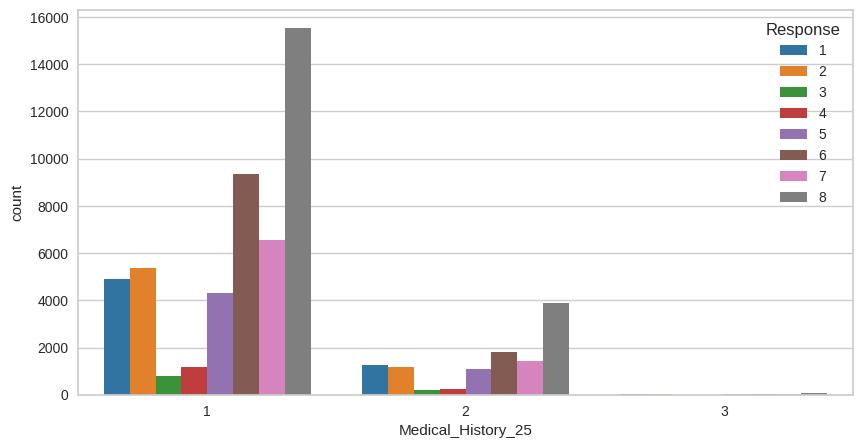

object


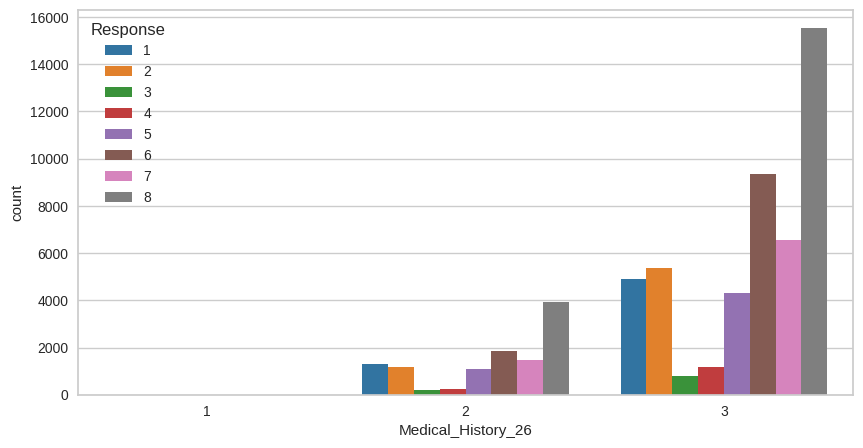

object


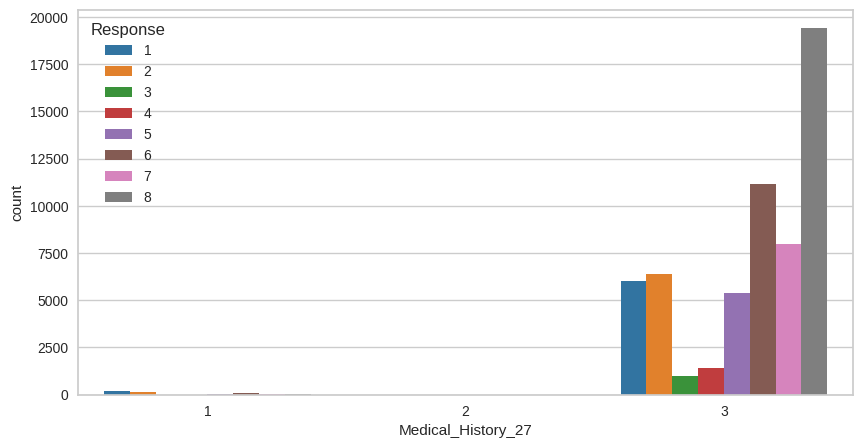

object


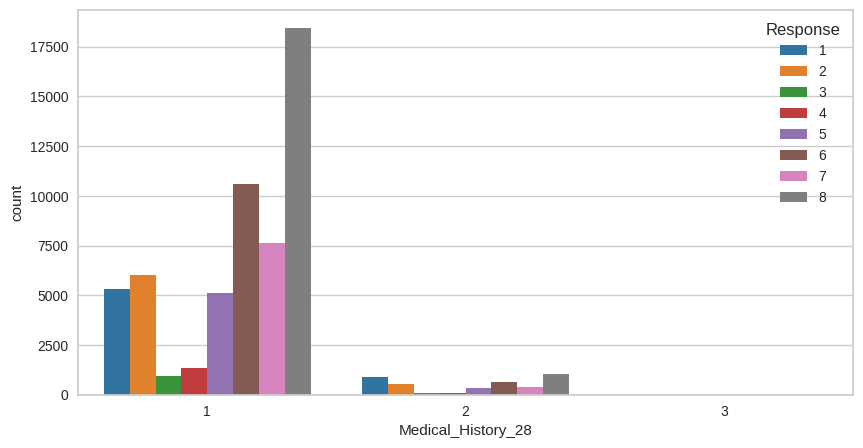

object


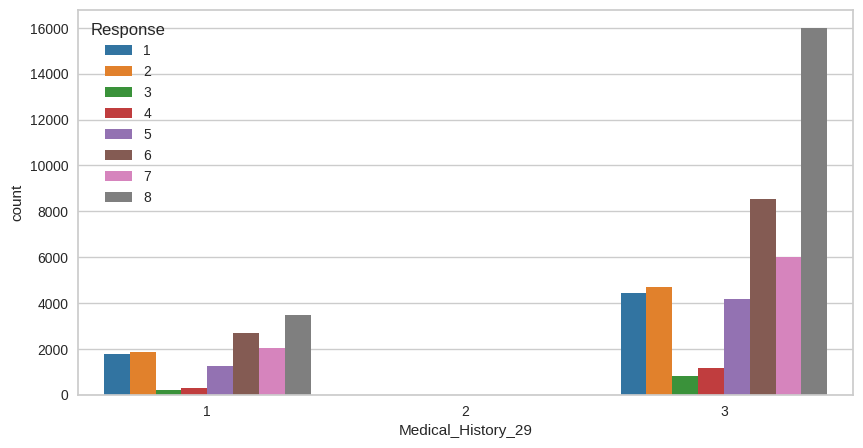

object


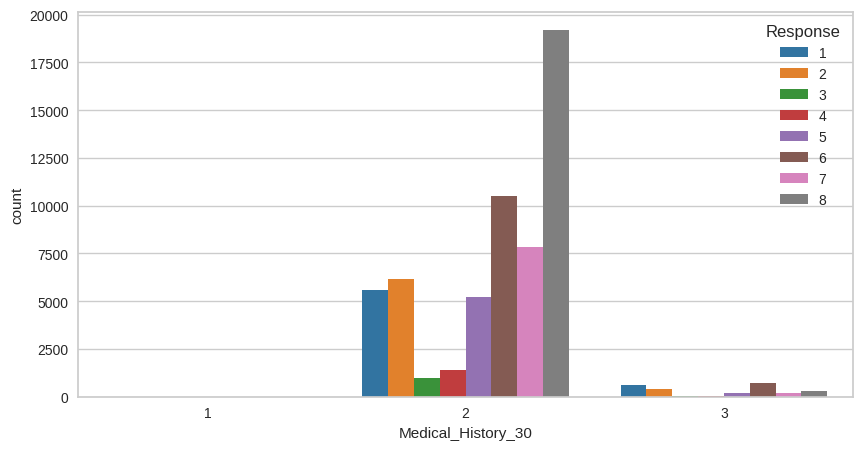

object


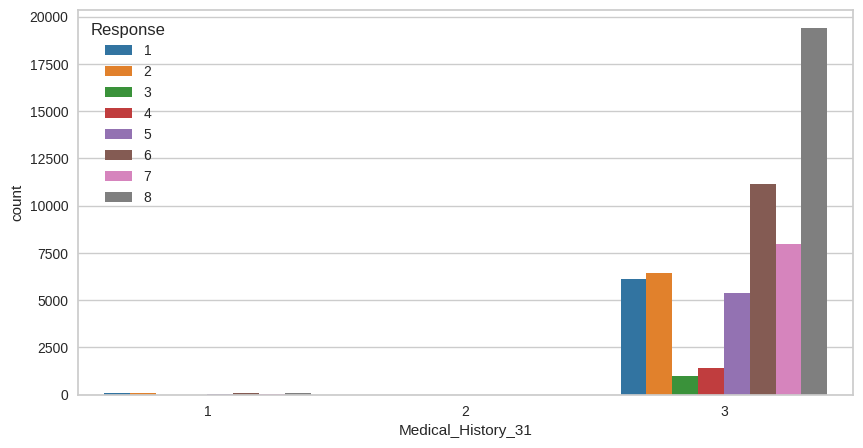

float64


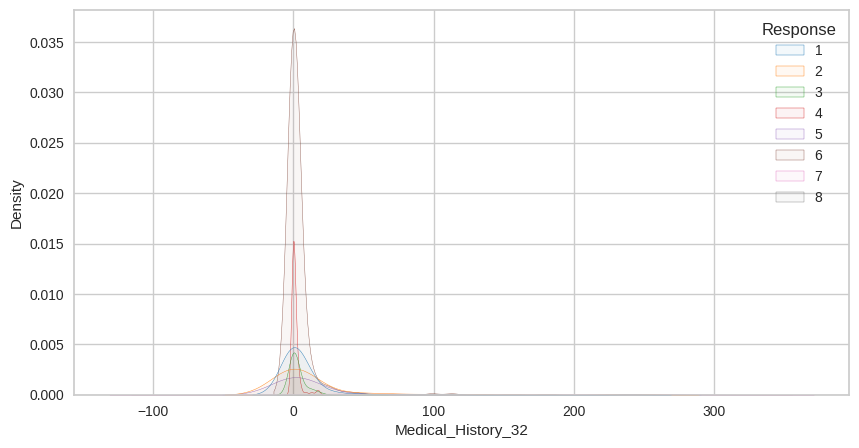

object


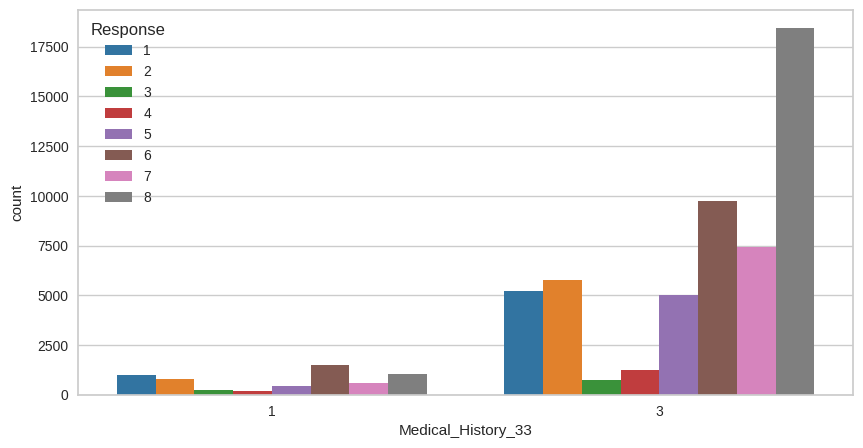

object


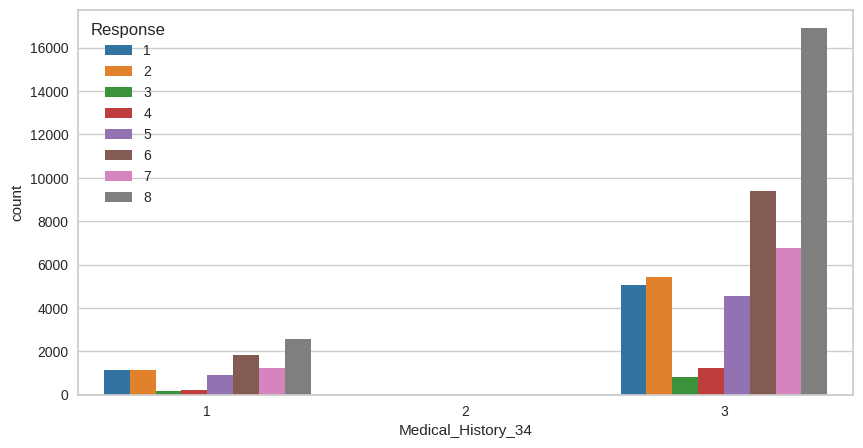

object


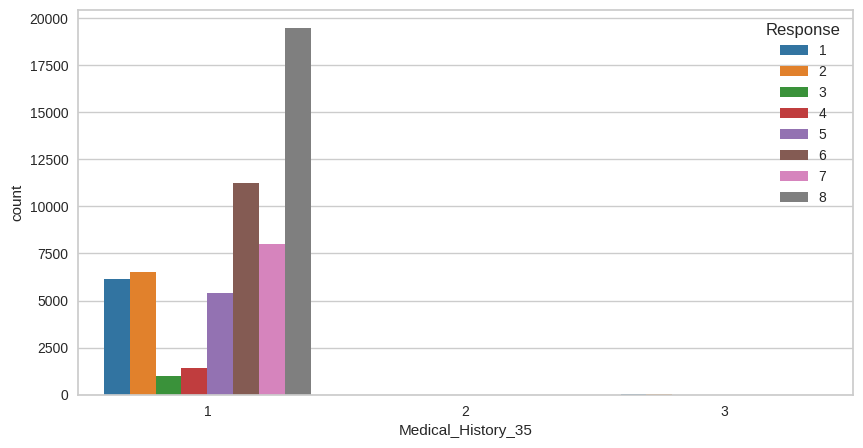

object


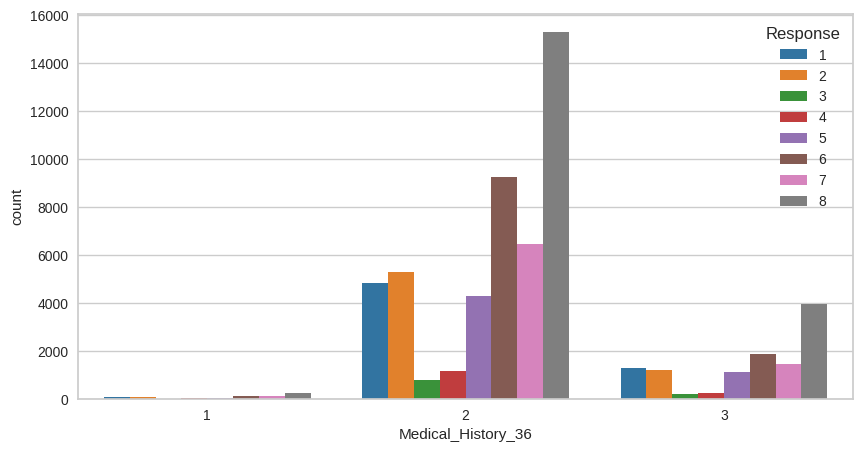

object


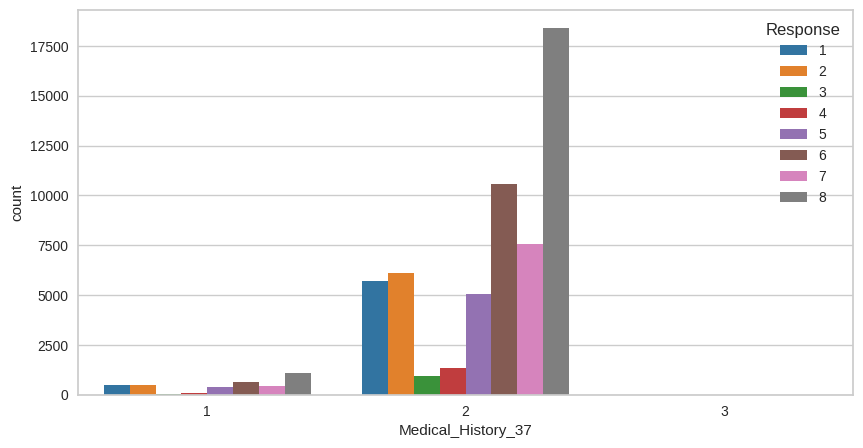

object


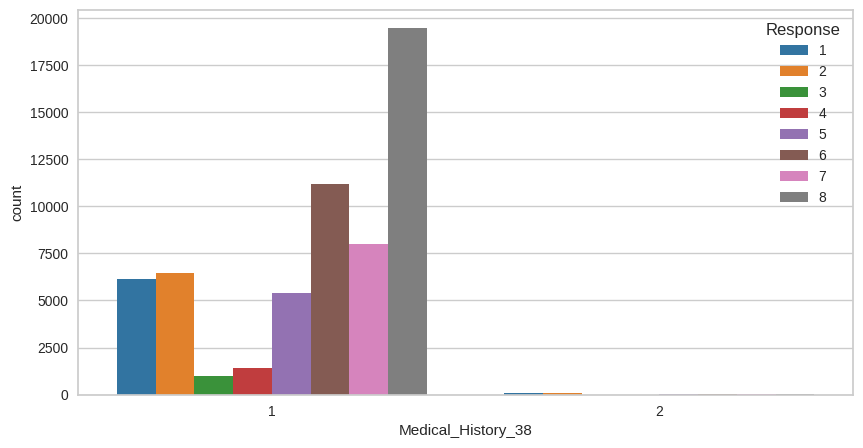

object


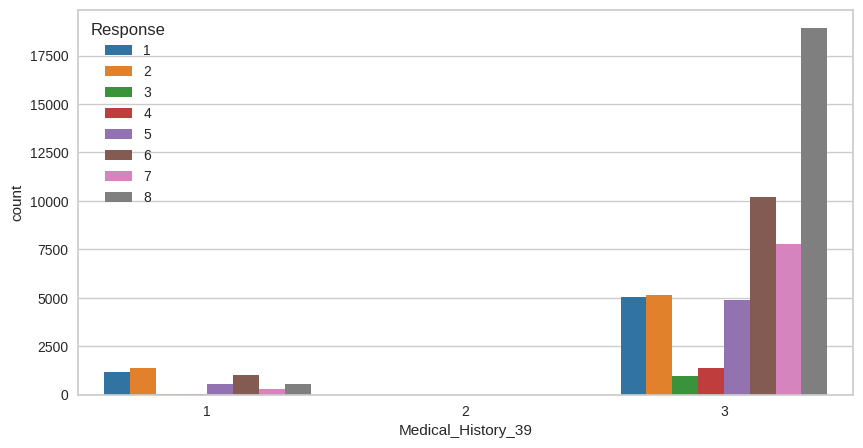

object


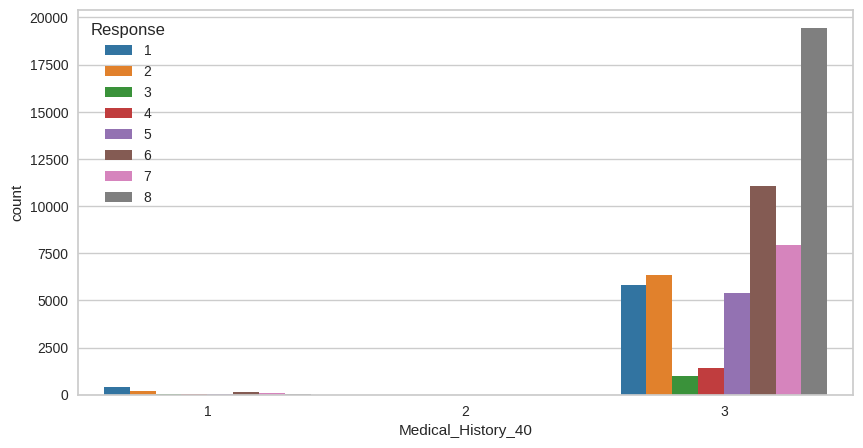

object


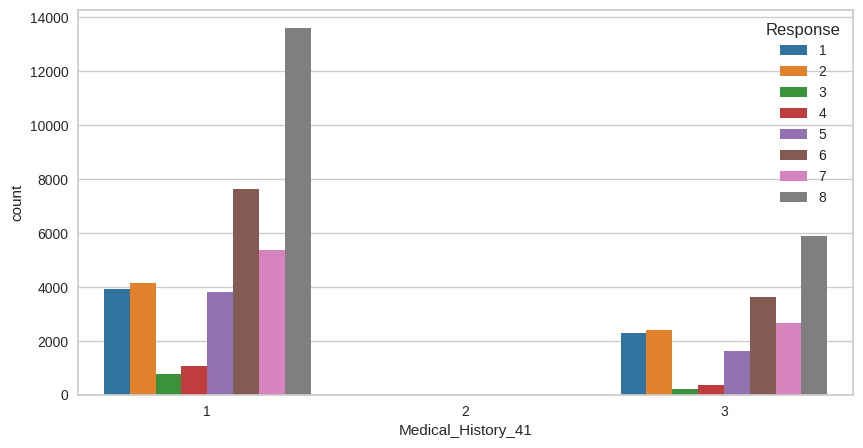

In [ ]:
# Countplot categoricals and density plot for quant variables
for i in df_object[ColSet7_MedicalHistoryInfo].columns:
  print(df_object.dtypes[i])
  if df_object.dtypes[i] == 'object':
    plt.figure(figsize = (10,5))
    sns.countplot(x = i, hue = "Response", data = df_object, palette='tab10')
    plt.show()
  if df_object.dtypes[i] == 'int64' or df_object.dtypes[i] == 'float64':
    plt.figure(figsize = (10,5))
    sns.kdeplot(data=df_object,
                x=i,
                hue="Response", fill=True, common_norm=True, alpha=0.05, palette='tab10')
    plt.show()

###*MedicalKeywordInfo*

object


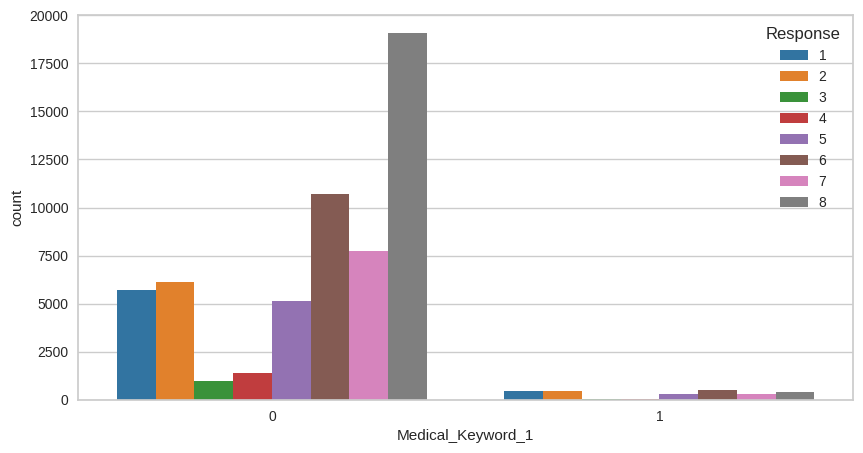

object


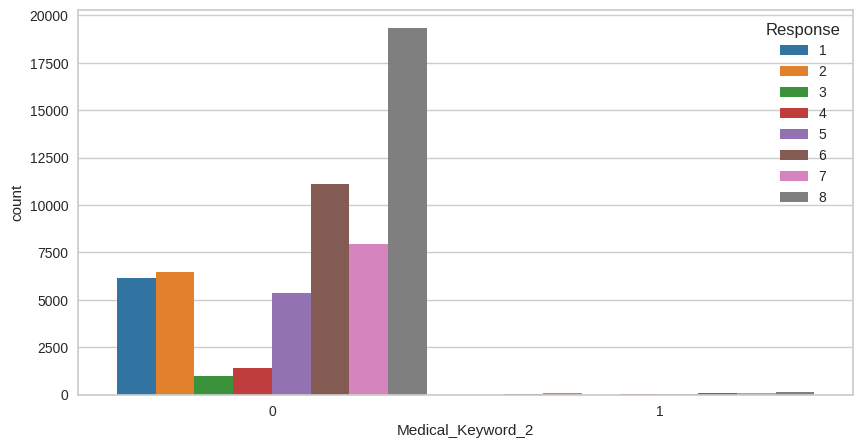

object


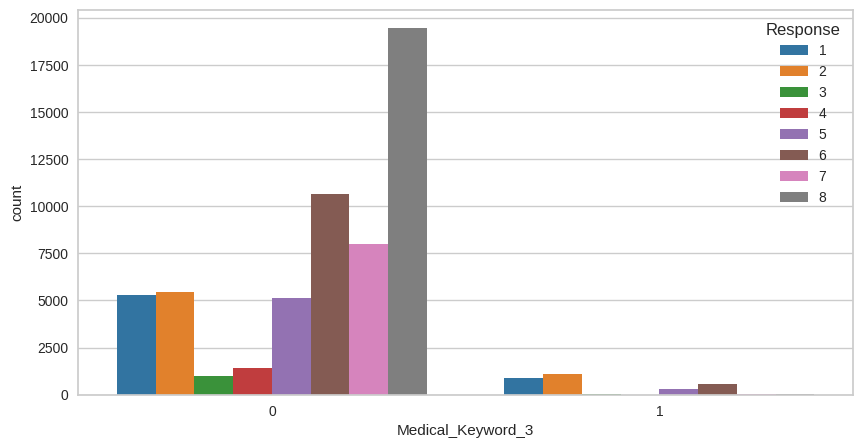

object


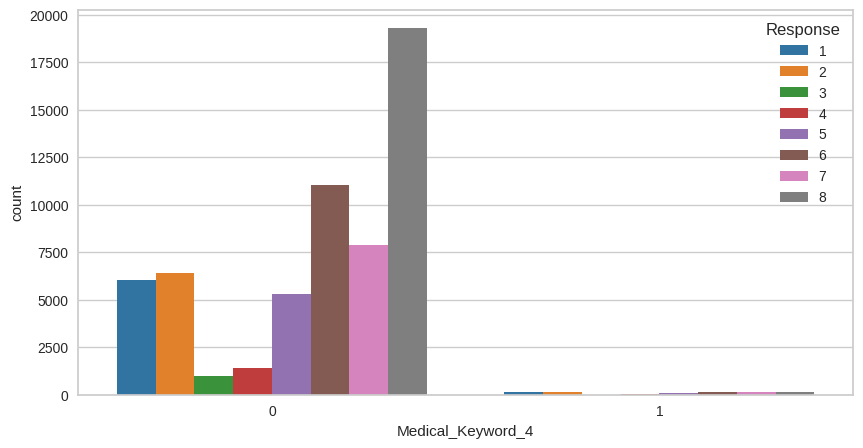

object


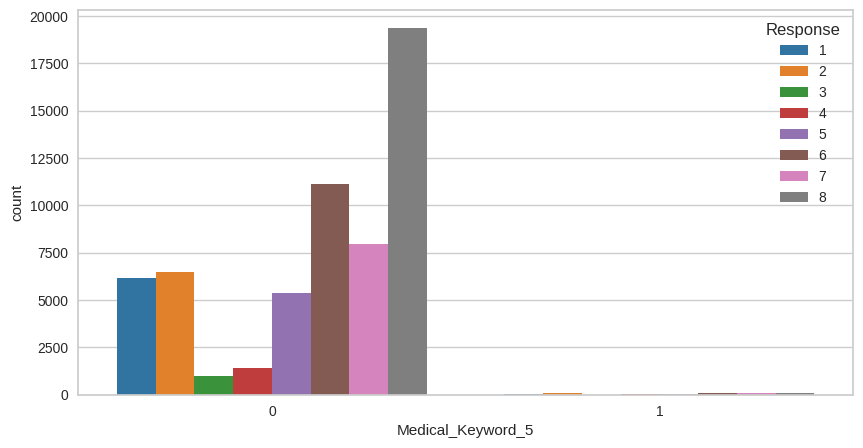

object


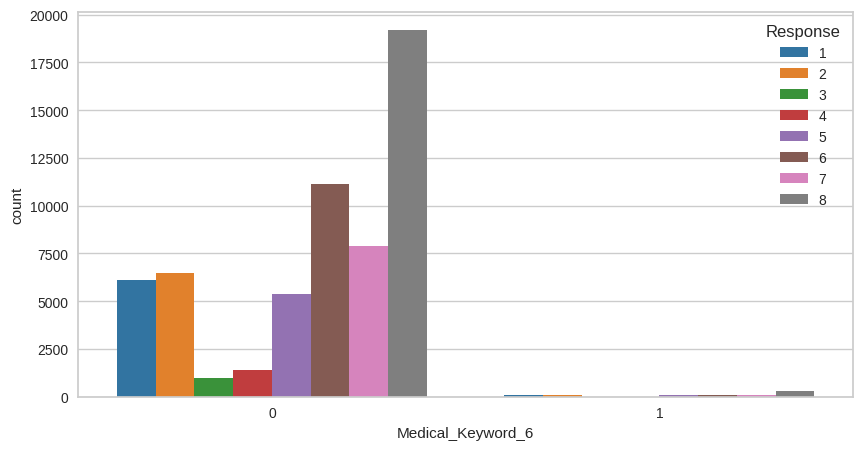

object


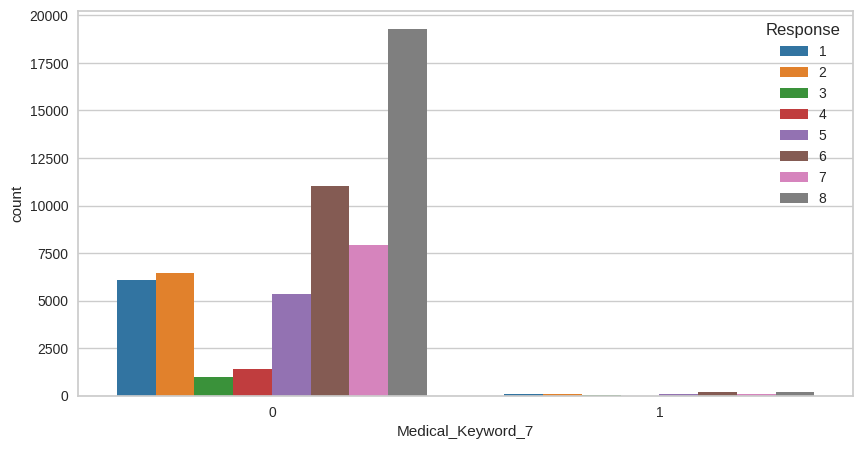

object


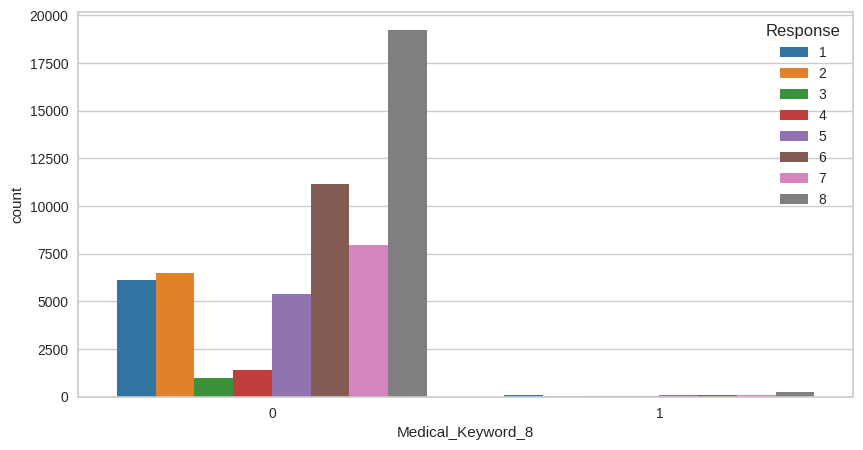

object


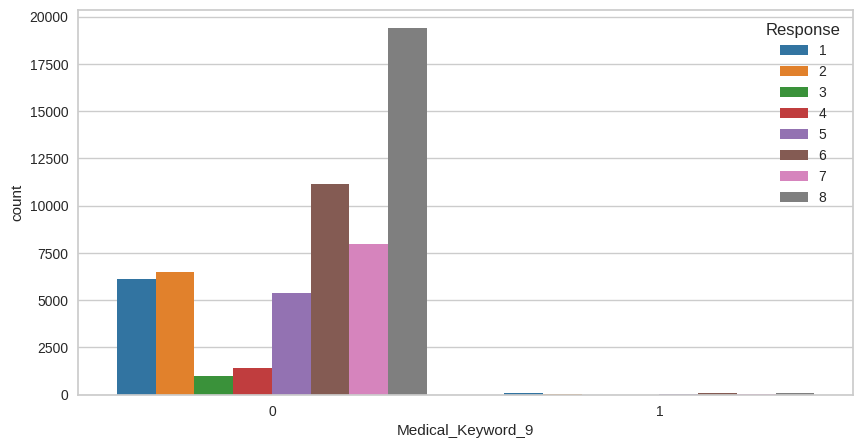

object


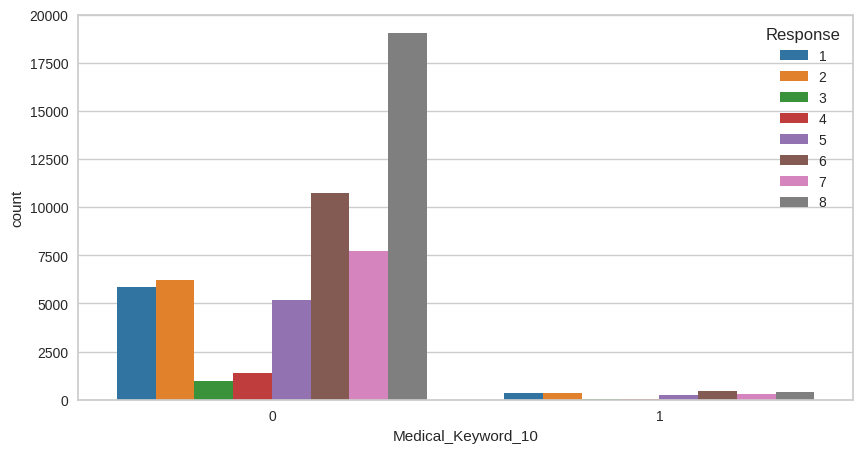

object


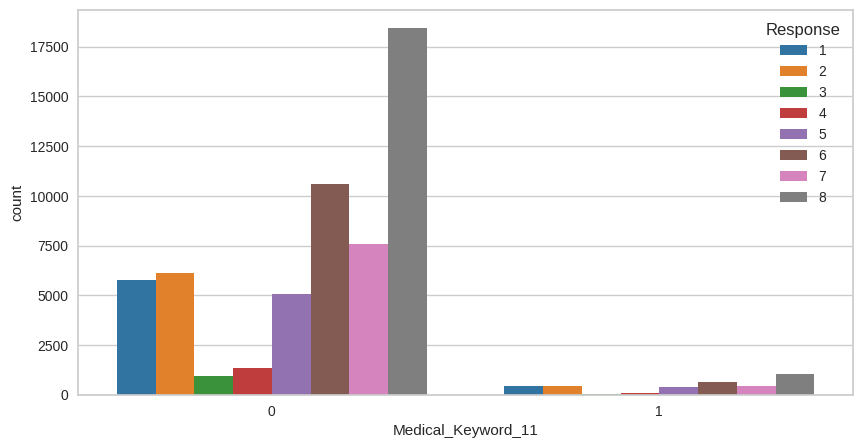

object


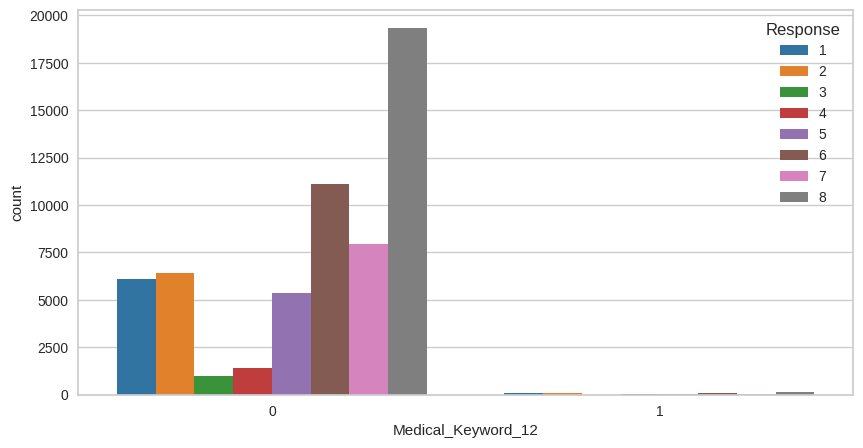

object


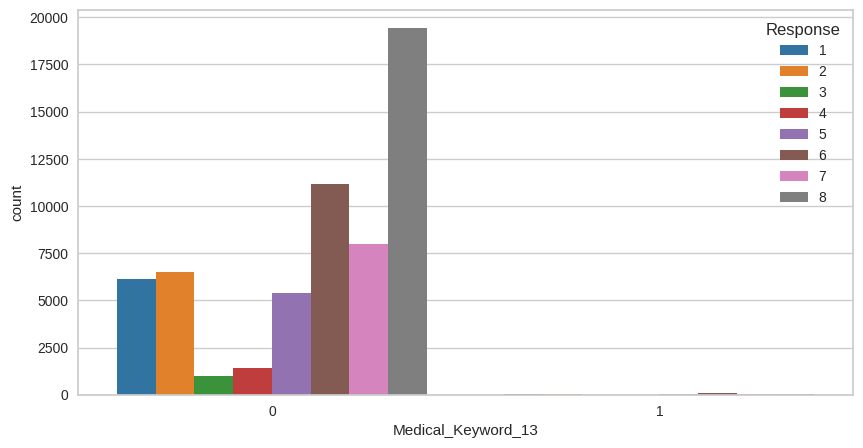

object


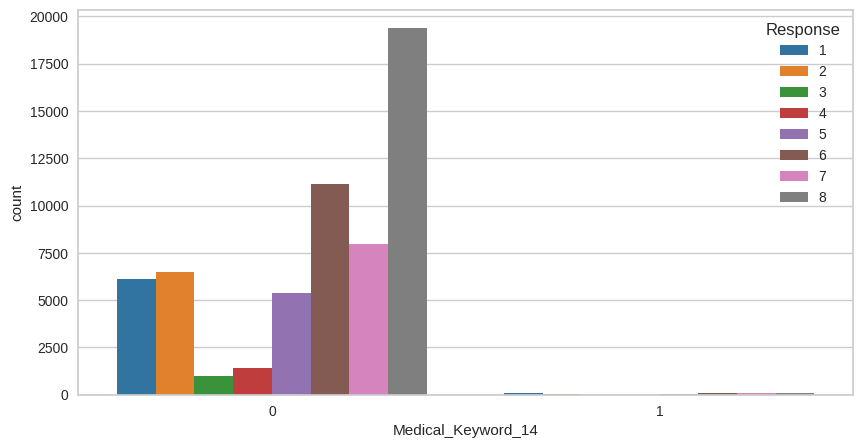

object


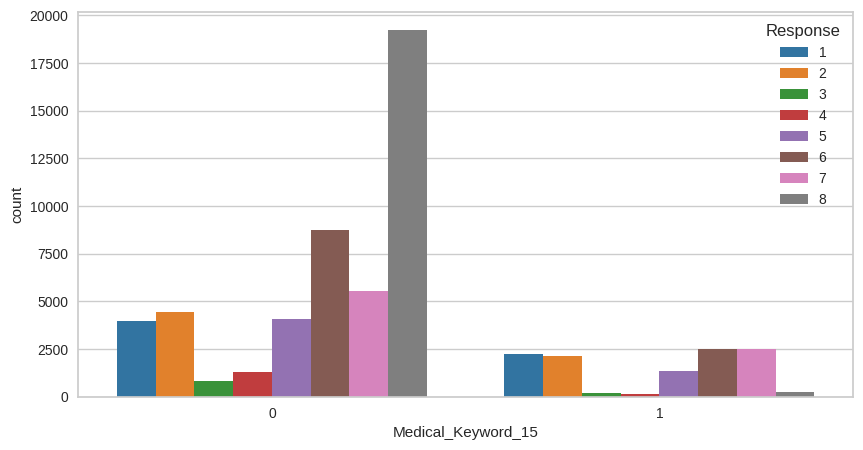

object


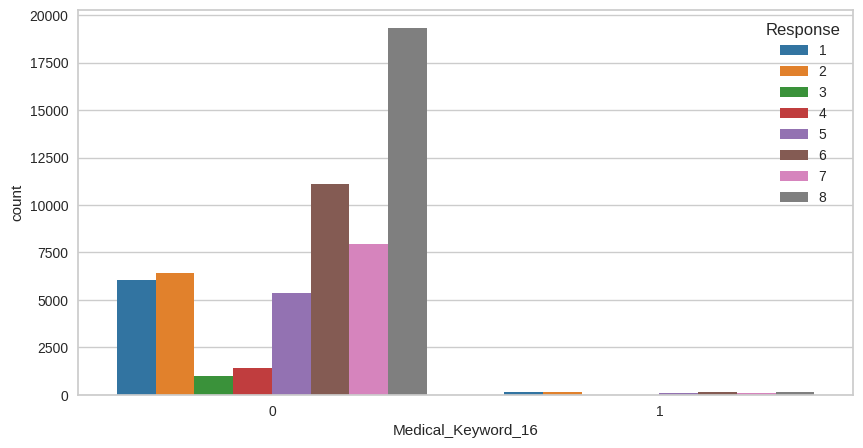

object


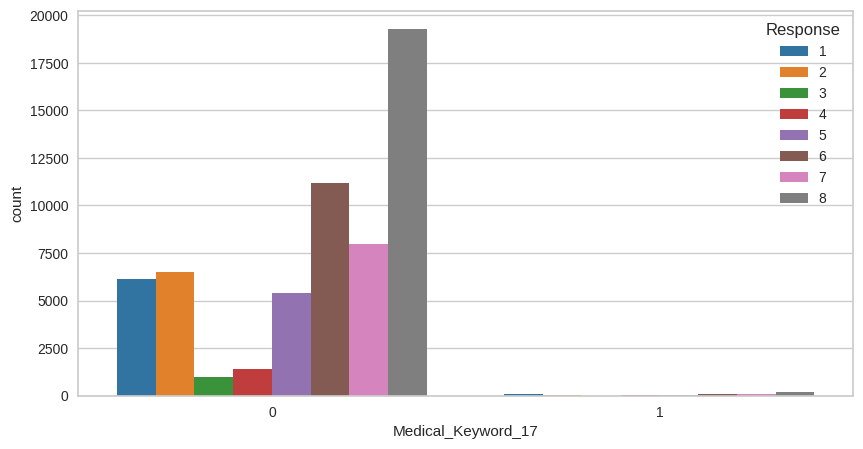

object


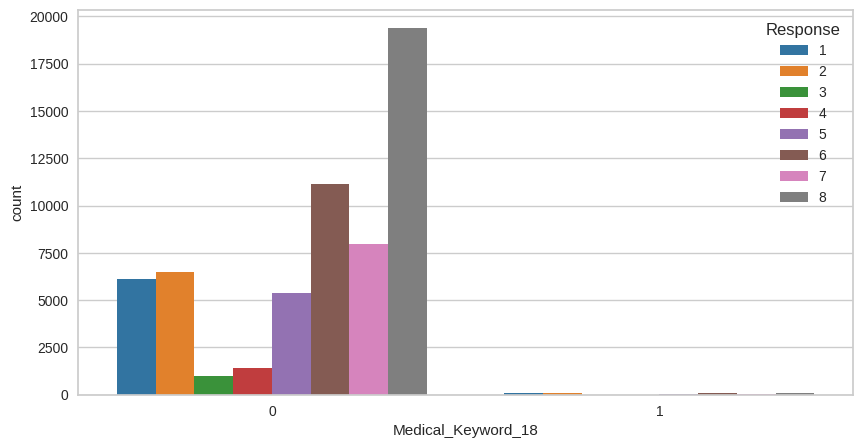

object


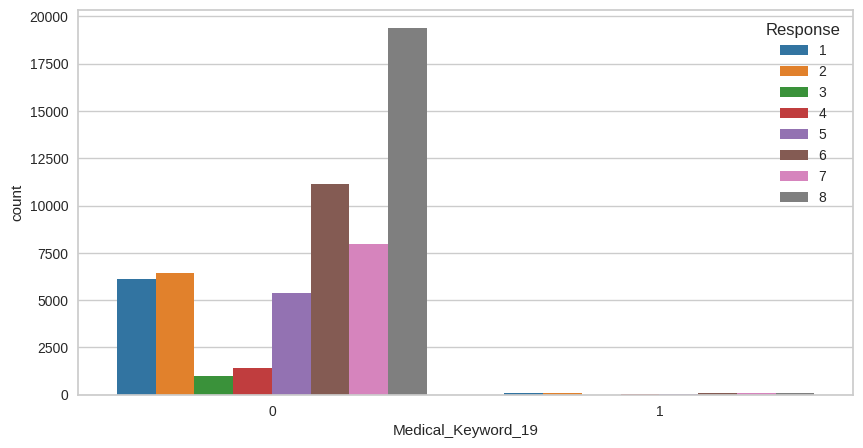

object


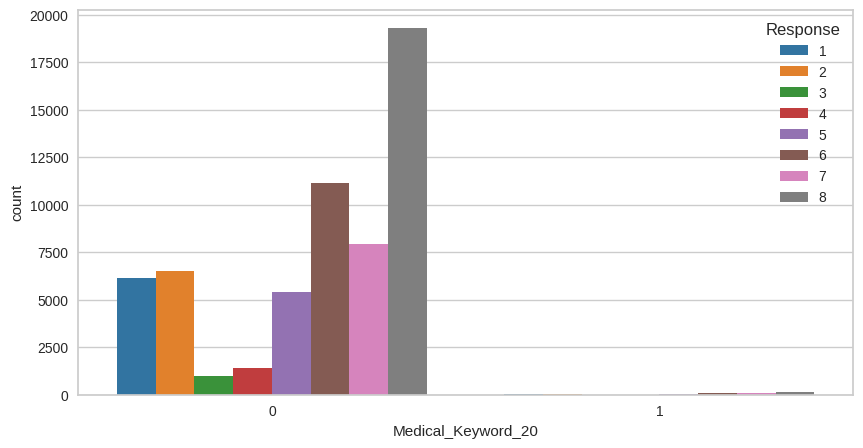

object


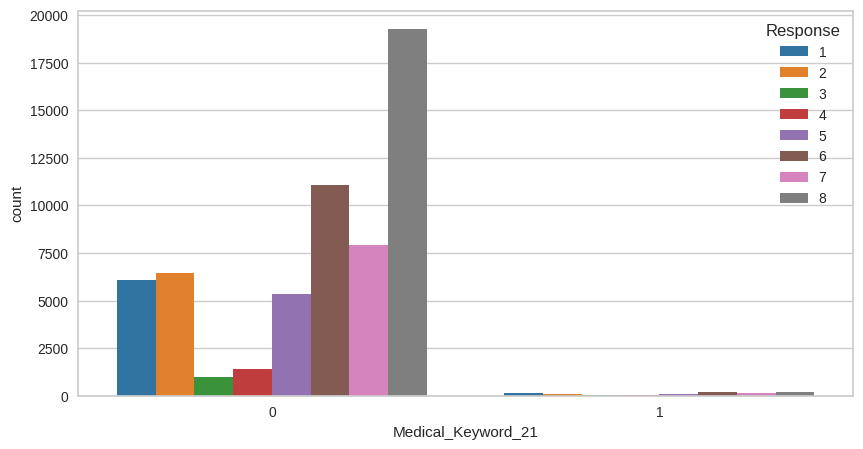

object


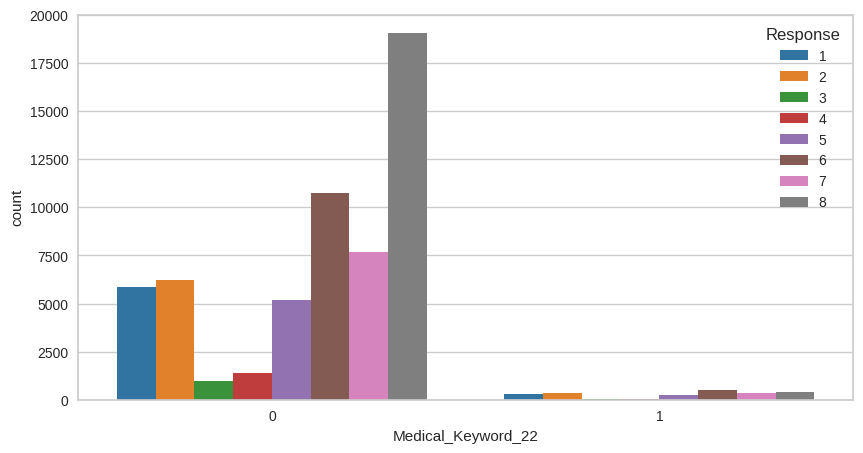

object


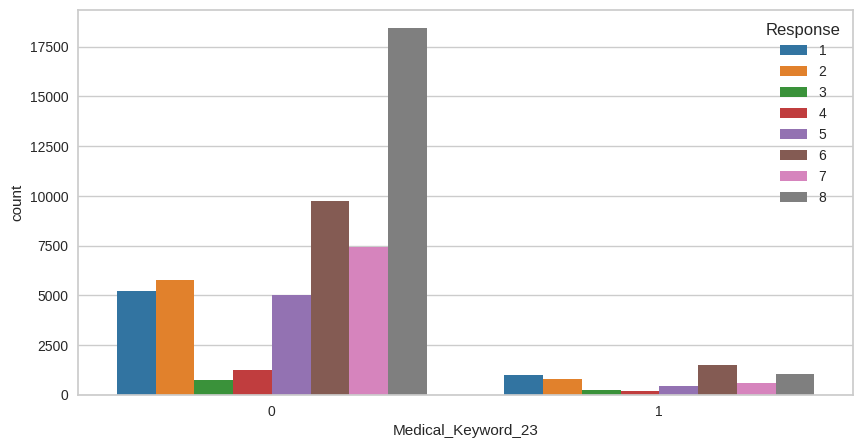

object


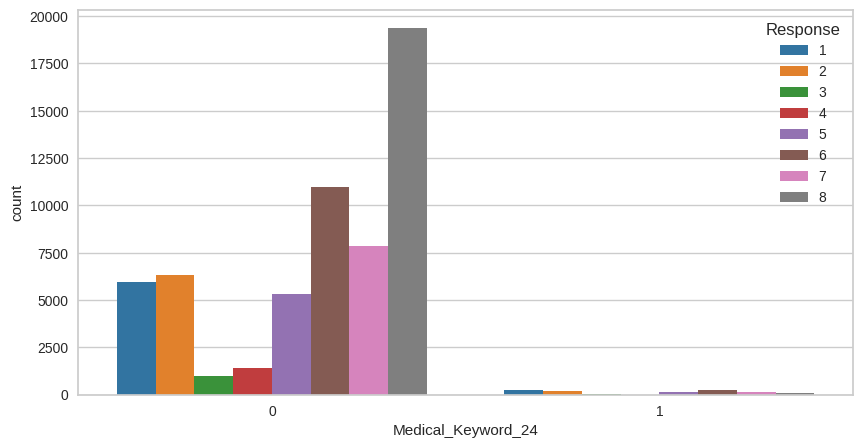

object


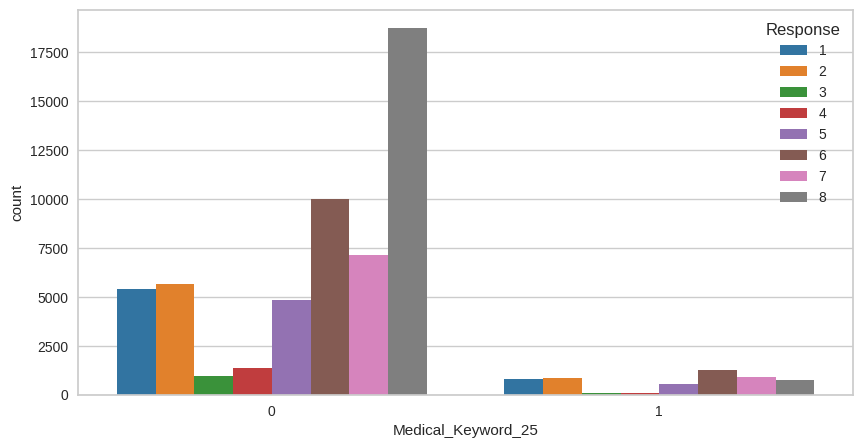

object


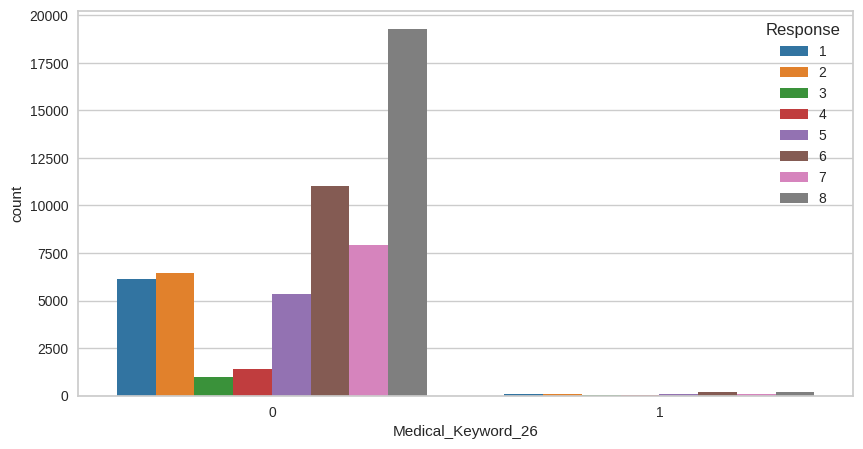

object


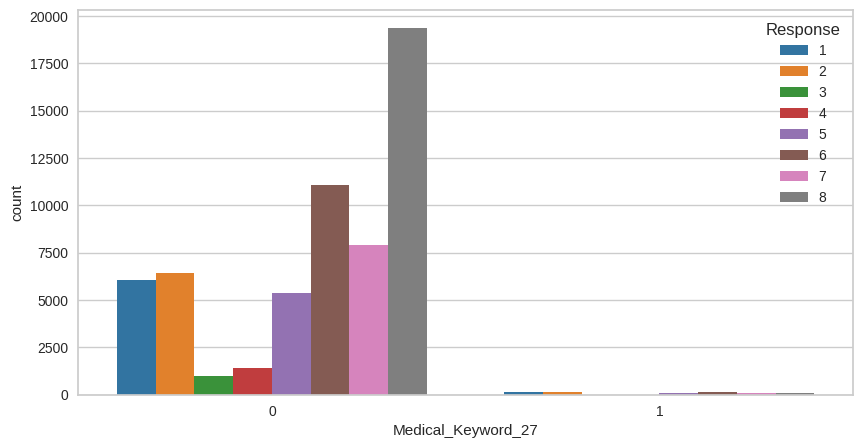

object


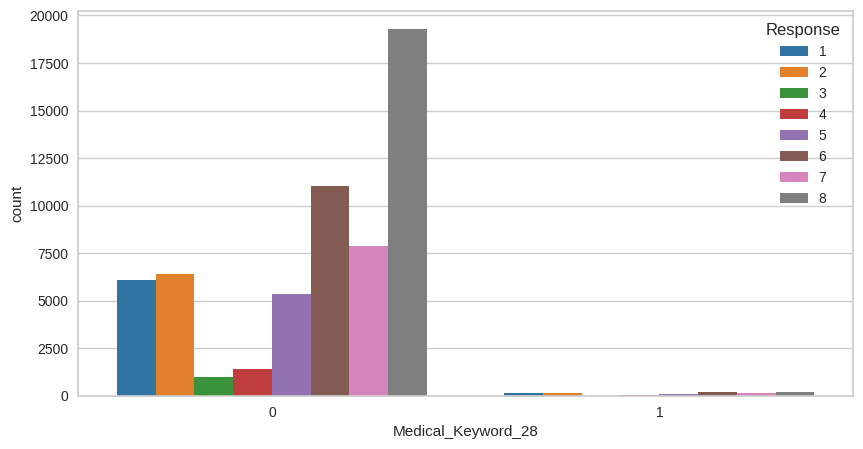

object


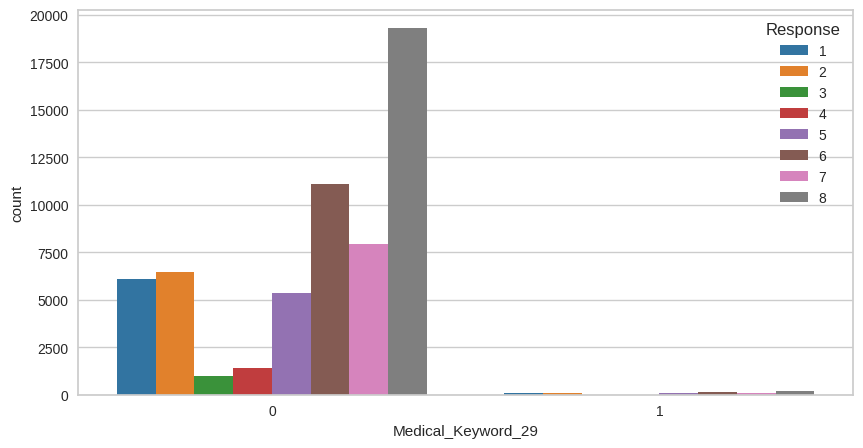

object


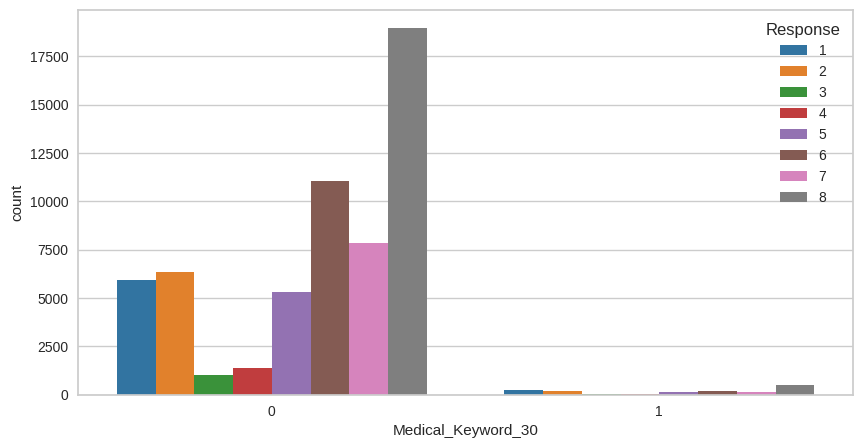

object


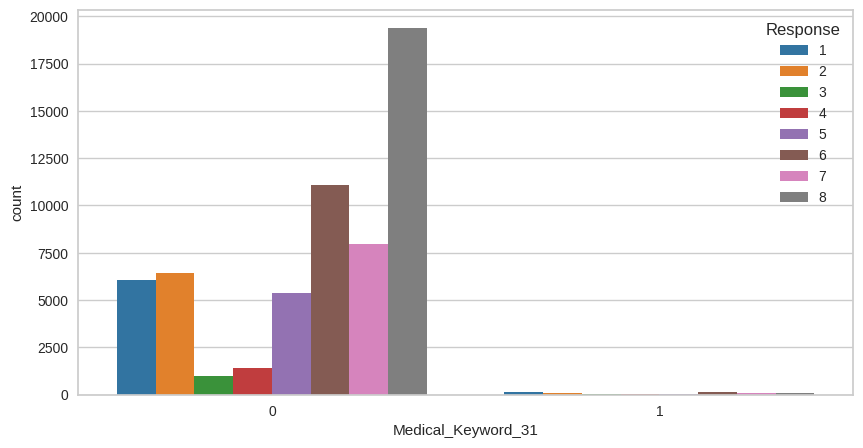

object


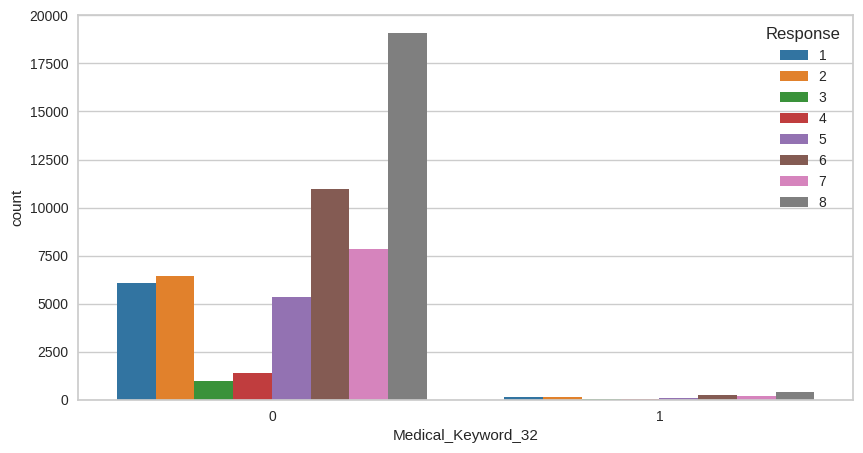

object


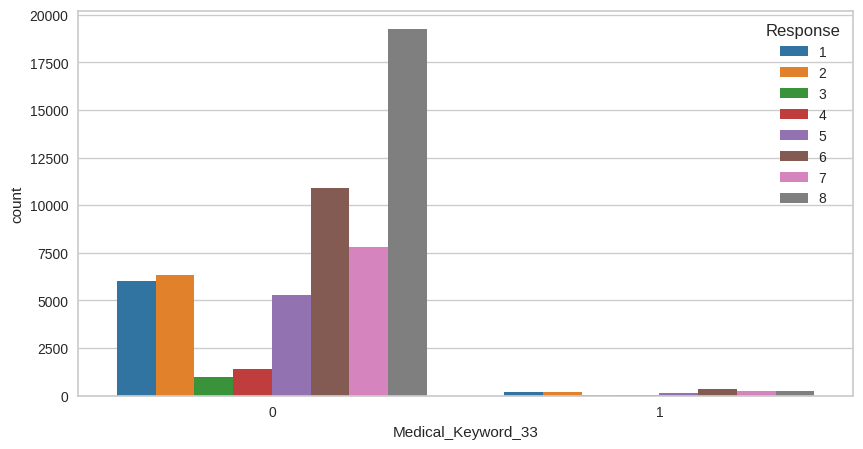

object


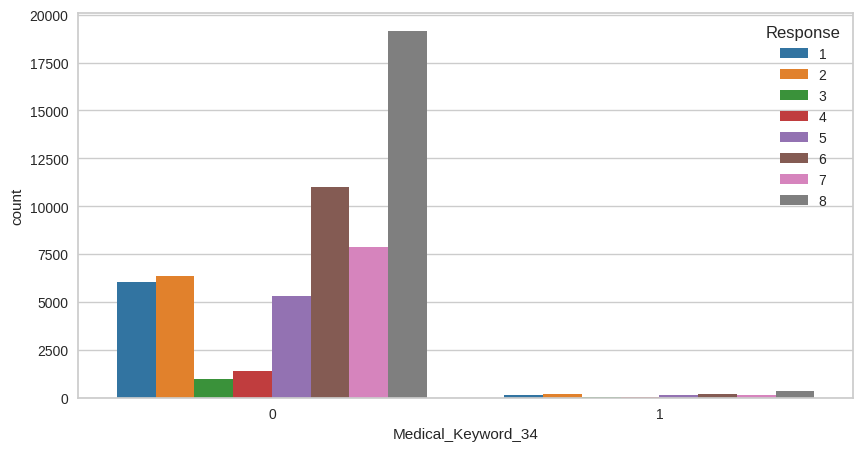

object


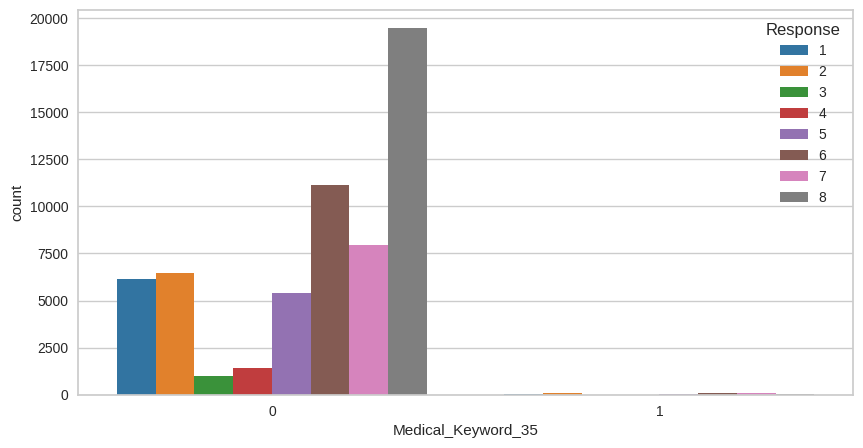

object


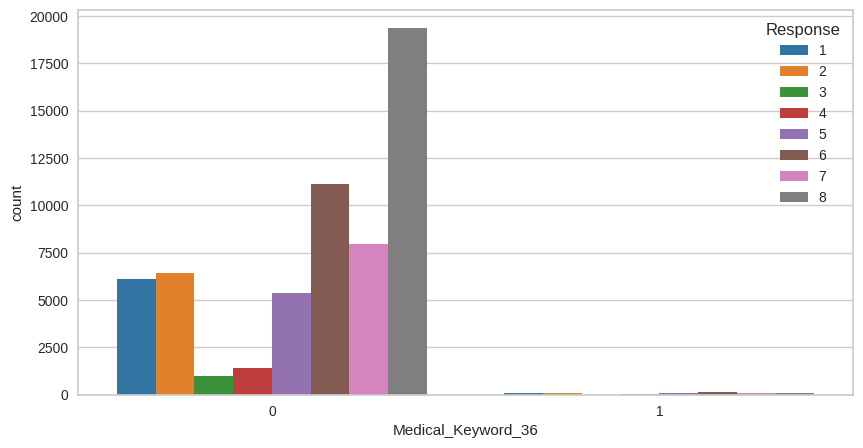

object


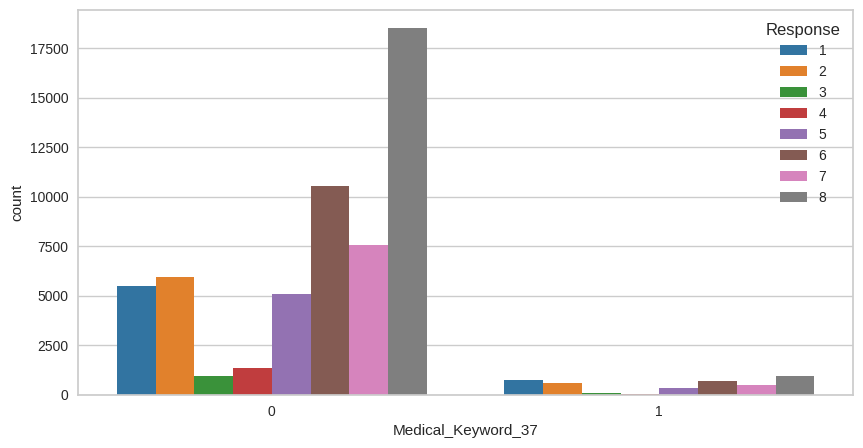

object


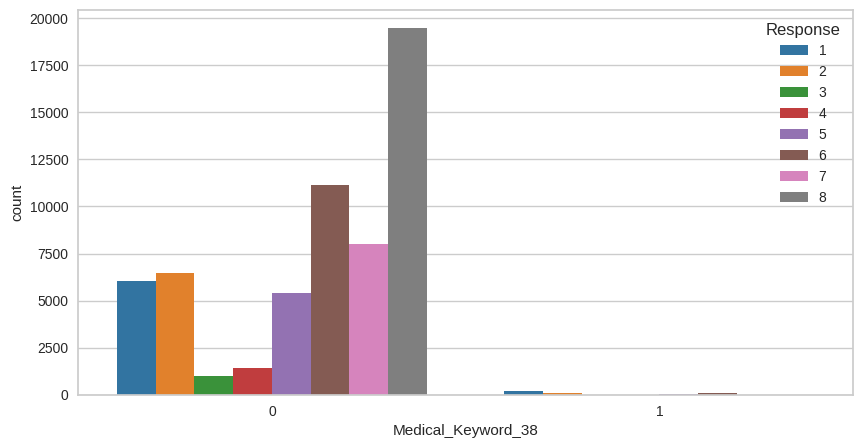

object


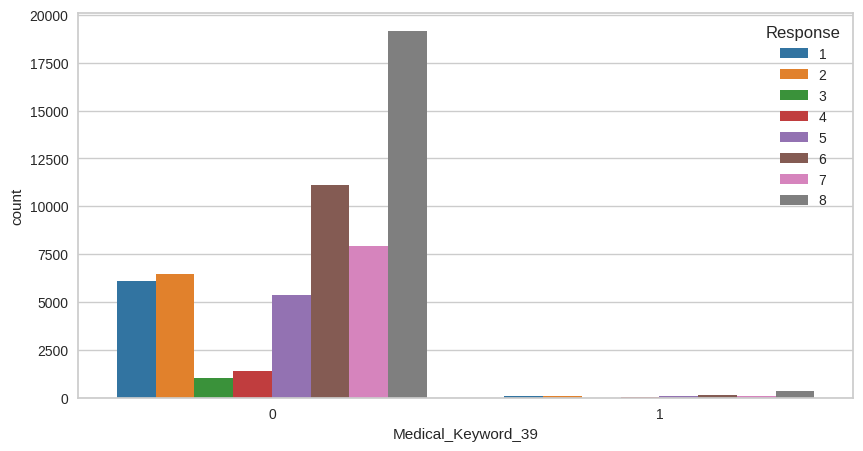

object


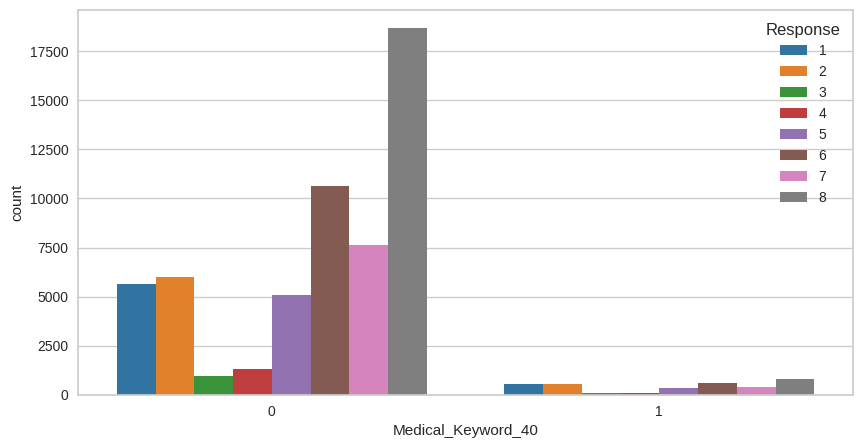

object


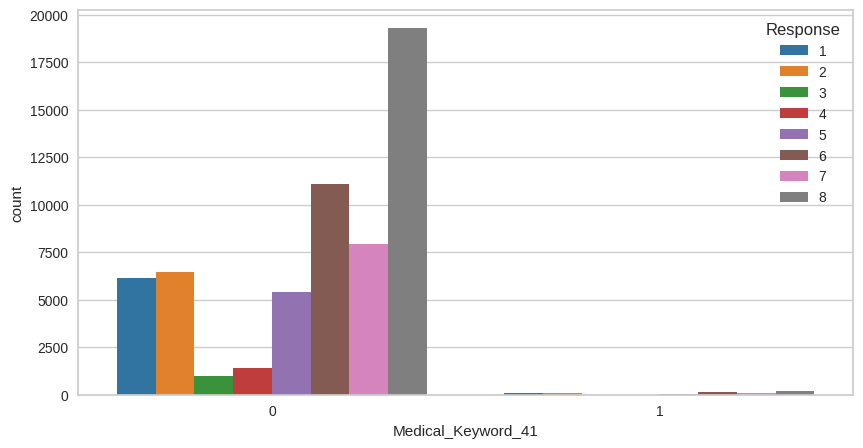

object


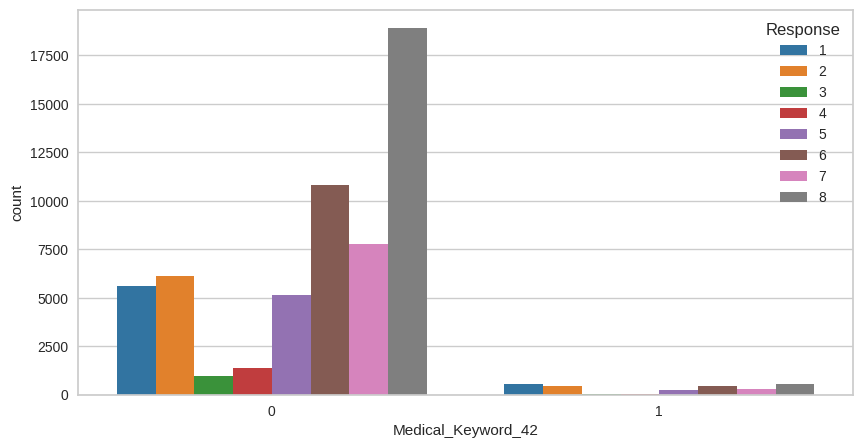

object


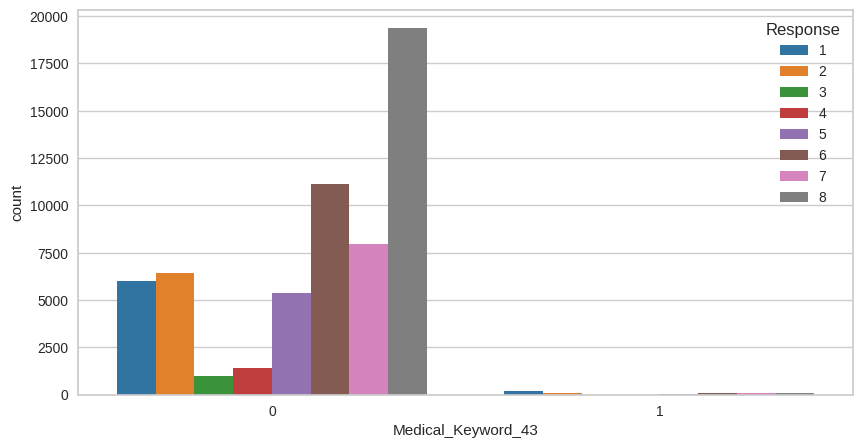

object


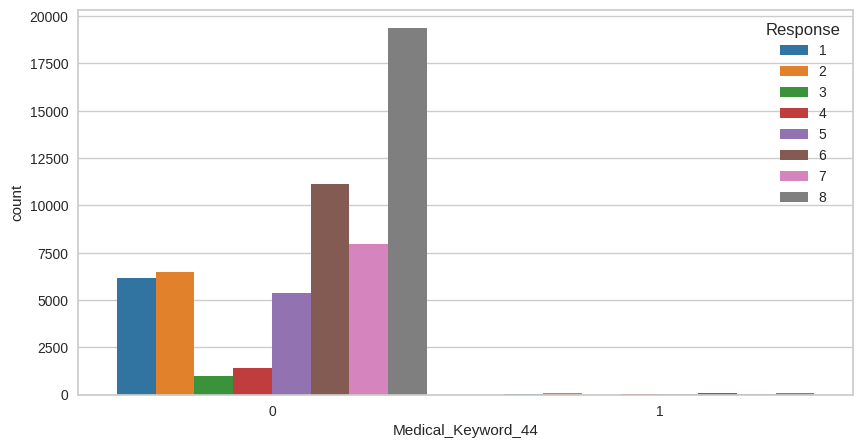

object


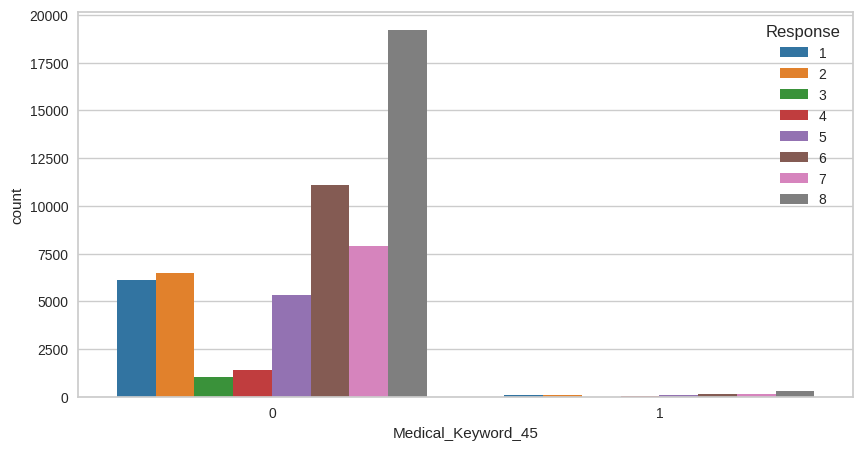

object


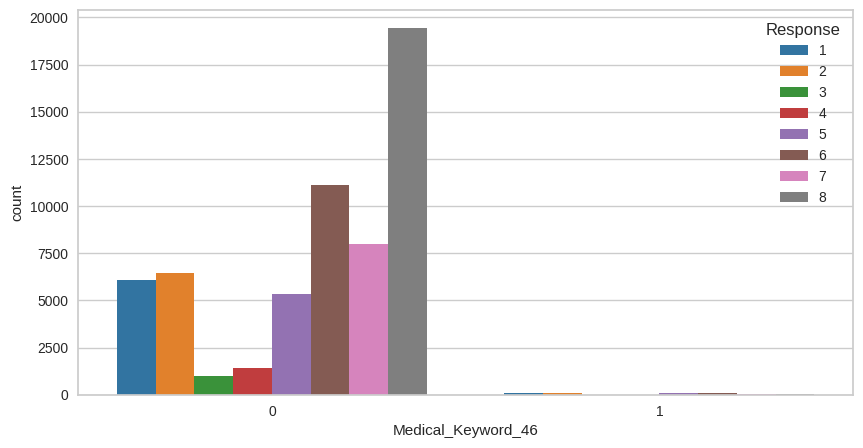

object


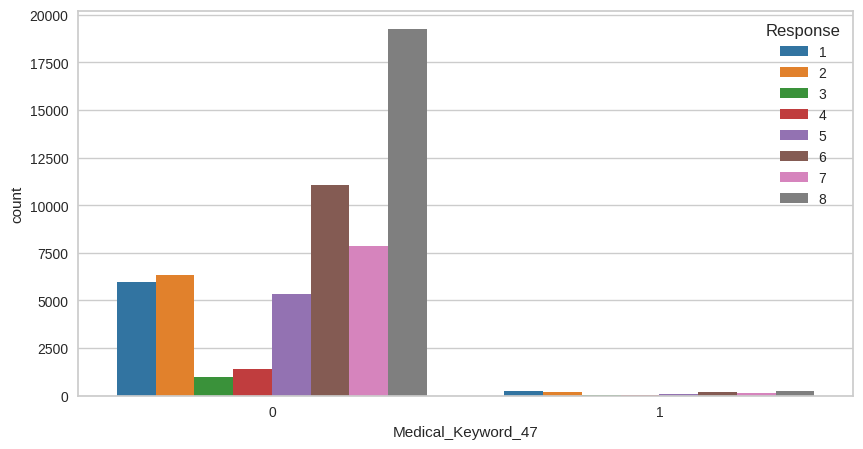

object


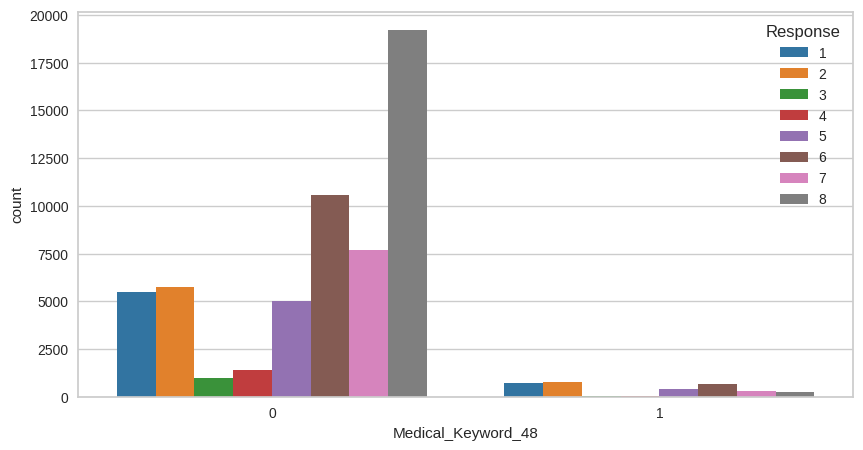

In [ ]:
# Countplot categoricals and density plot for quant variables
for i in df_object[ColSet8_MedicalKeywordInfo].columns:
  print(df_object.dtypes[i])
  if df_object.dtypes[i] == 'object':
    plt.figure(figsize = (10,5))
    sns.countplot(x = i, hue = "Response", data = df_object, palette='tab10')
    plt.show()
  if df_object.dtypes[i] == 'int64' or df_object.dtypes[i] == 'float64':
    plt.figure(figsize = (10,5))
    sns.kdeplot(data=df_object,
                x=i,
                hue="Response", fill=True, common_norm=True, alpha=0.05, palette='tab10')
    plt.show()

## **Corrlation Heatmap**

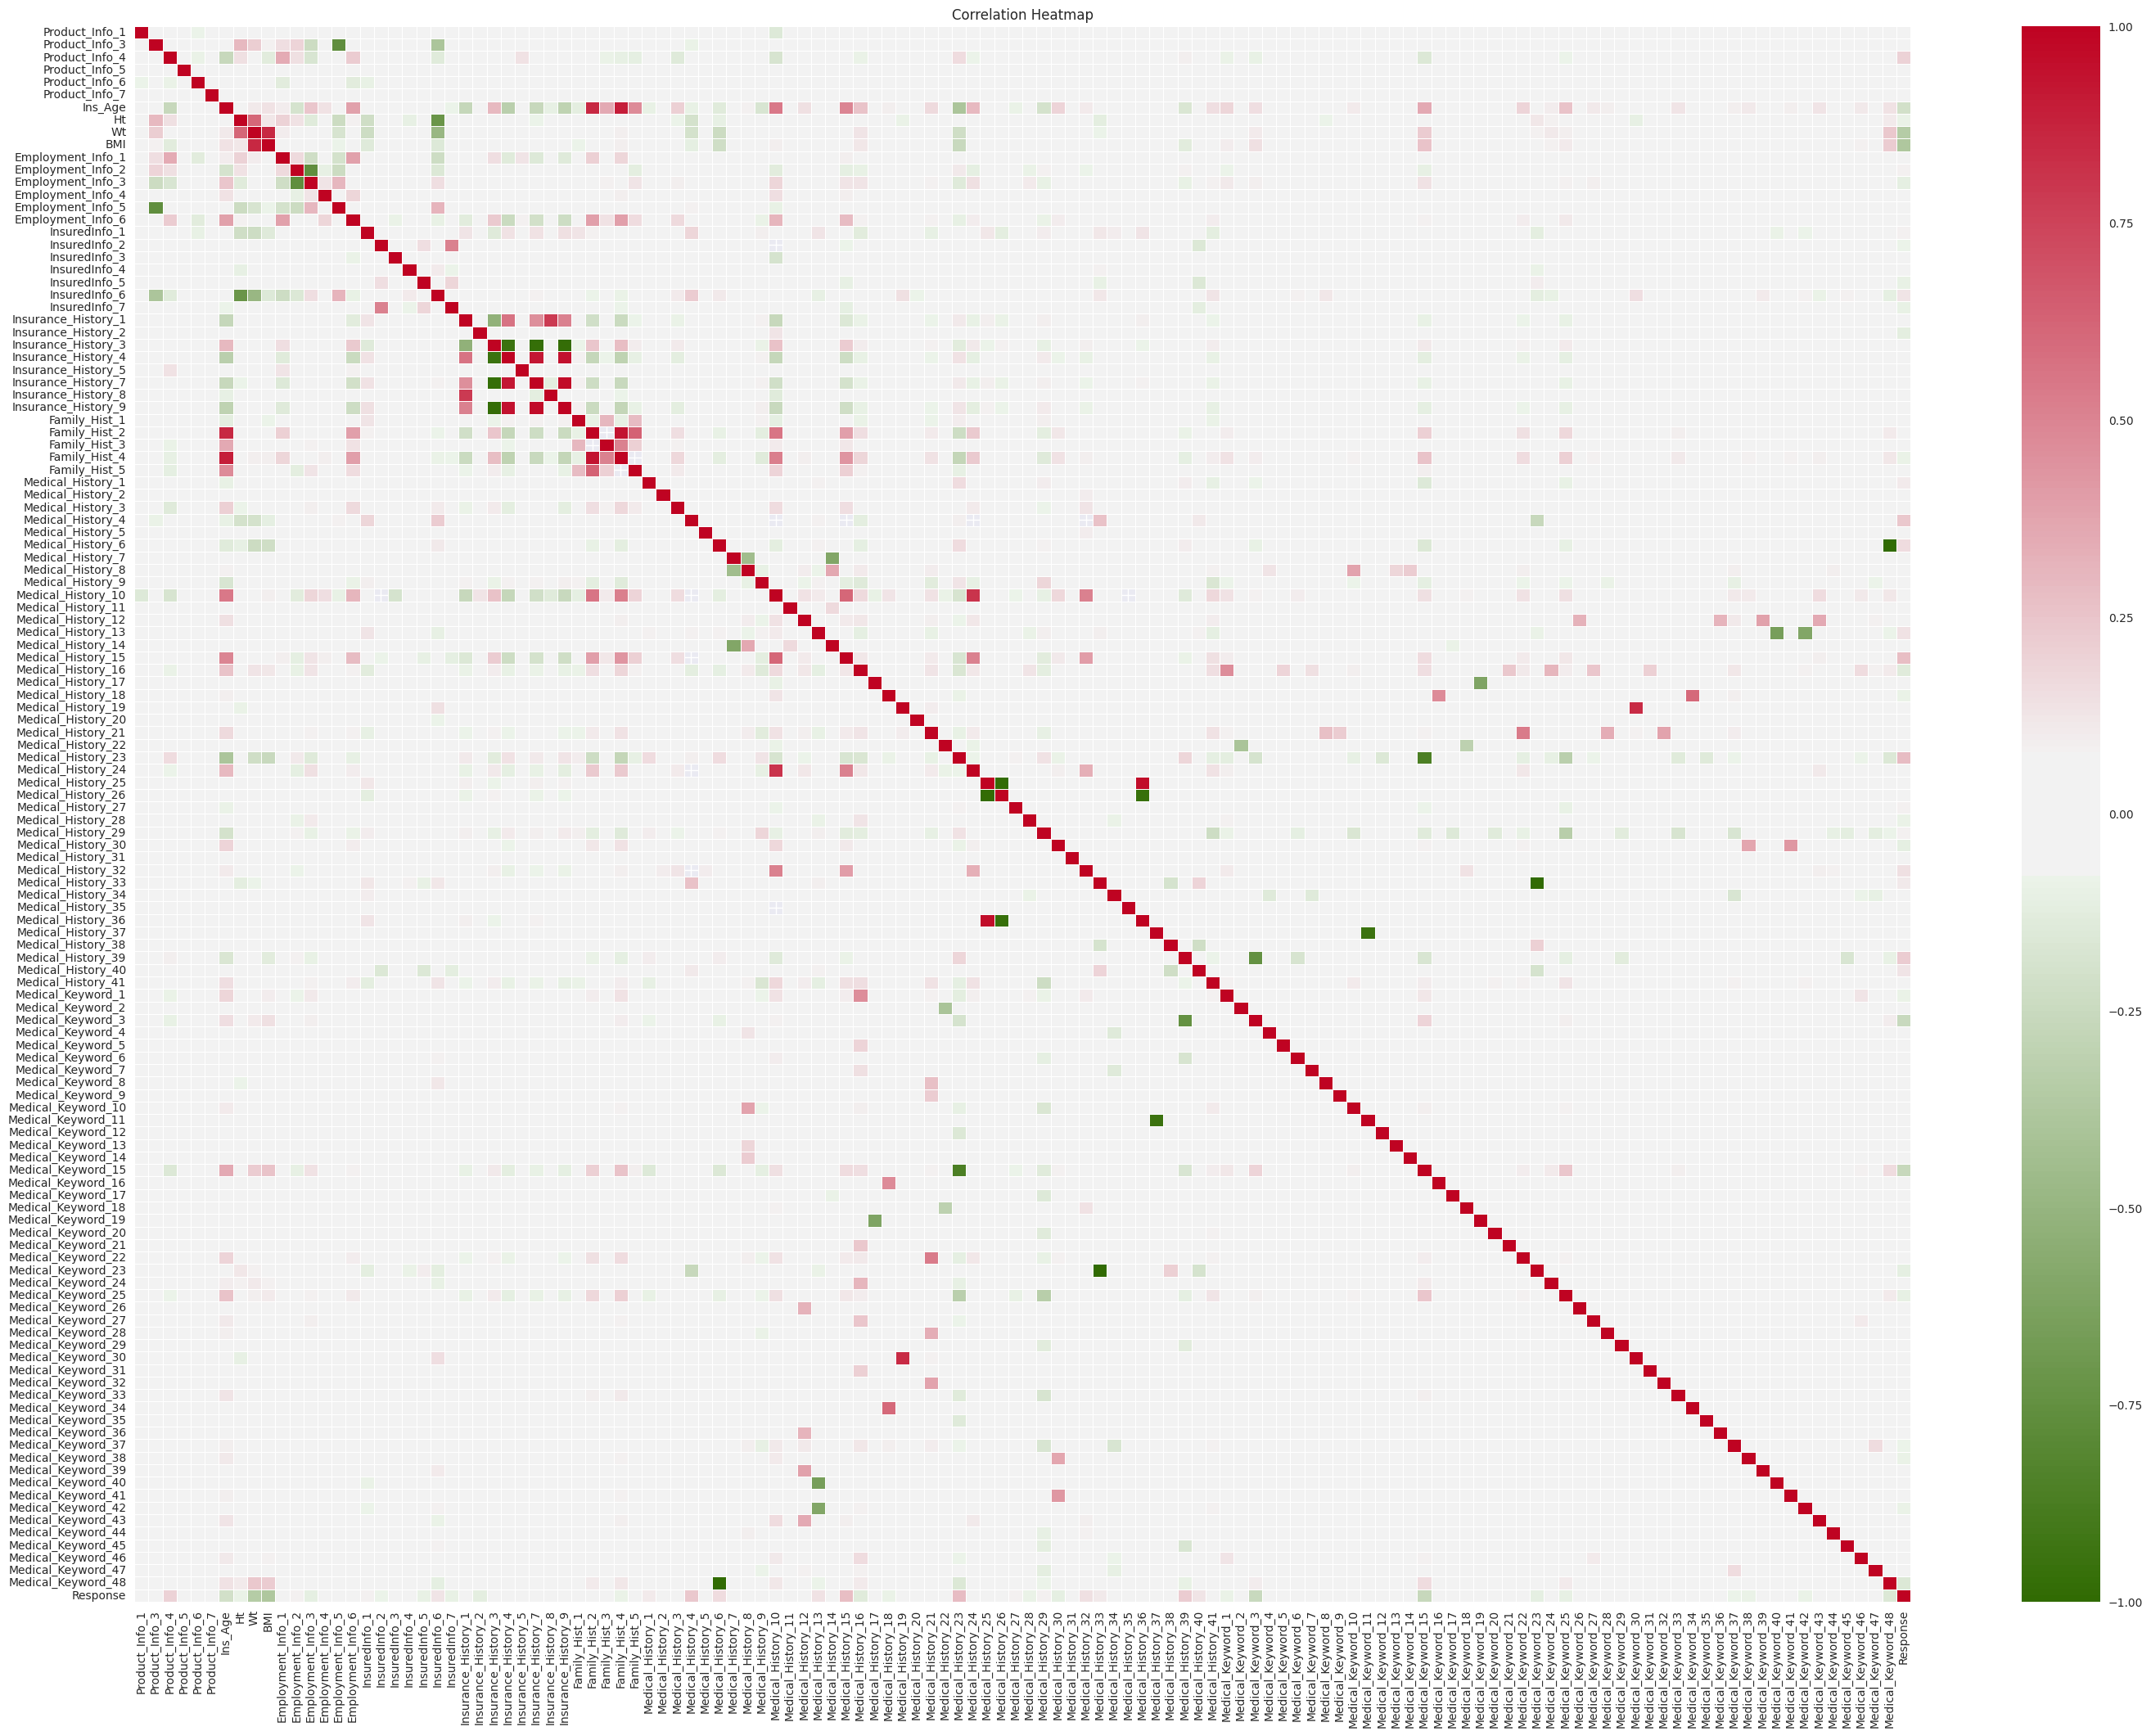

In [ ]:
#Correlation Matrix as a Heatmap
sns.set_style('darkgrid')
plt.figure(figsize = (35,25))
cmap = sns.diverging_palette(120, 10, l = 40, s = 99, sep = 20, center = 'light', as_cmap = True)
sns.heatmap((df).corr(), vmin = -1, vmax = 1, annot = False, cmap = cmap, lw = .5, linecolor = 'white')
plt.title("Correlation Heatmap")
plt.show()



> Findings:
*   Strong corrlation in ApplicantInfo subsets, specifically Age, height, BMI. Age is also corrlated with several other variables, such as `Family_Hist`
*   Strong corrlation within the `insurance_hist` and `Family_Hist` subsets
*   Some variables are corrlated in the `medical_history` and `Medical Keywords` subsets, as I believe the keyword maybe a representation of the history
* Couldn't spot a variable that is highly correlated with `Response`






## **Descriptive Statistics**

###*Skewness*

In [ ]:
# Univariate descriptive statistics using pandas
# Skewness
skewness_df = pd.DataFrame(columns=['Skewness'])
for col in numerical:
      skewness = df_object[col].skew()
      skewness_df.loc[col] = skewness
pd.set_option('display.max_rows', 200)
skewness_df

# Observation: skewness is a problem for many columns and should be corrected

Skewness
Product_Info_4         1.221772
Ins_Age                0.021939
Ht                    -0.086271
Wt                     0.693933
BMI                    0.943810
Employment_Info_1      4.713368
Employment_Info_4     15.078894
Employment_Info_6      0.787433
Insurance_History_5  102.899632
Family_Hist_2          0.212192
Family_Hist_3         -0.568174
Family_Hist_4          0.206935
Family_Hist_5         -0.727432
Medical_History_1      5.634394
Medical_History_10    -0.309968
Medical_History_15     0.016704
Medical_History_24     1.557523
Medical_History_32     4.342796

###*Univariate Outliers*

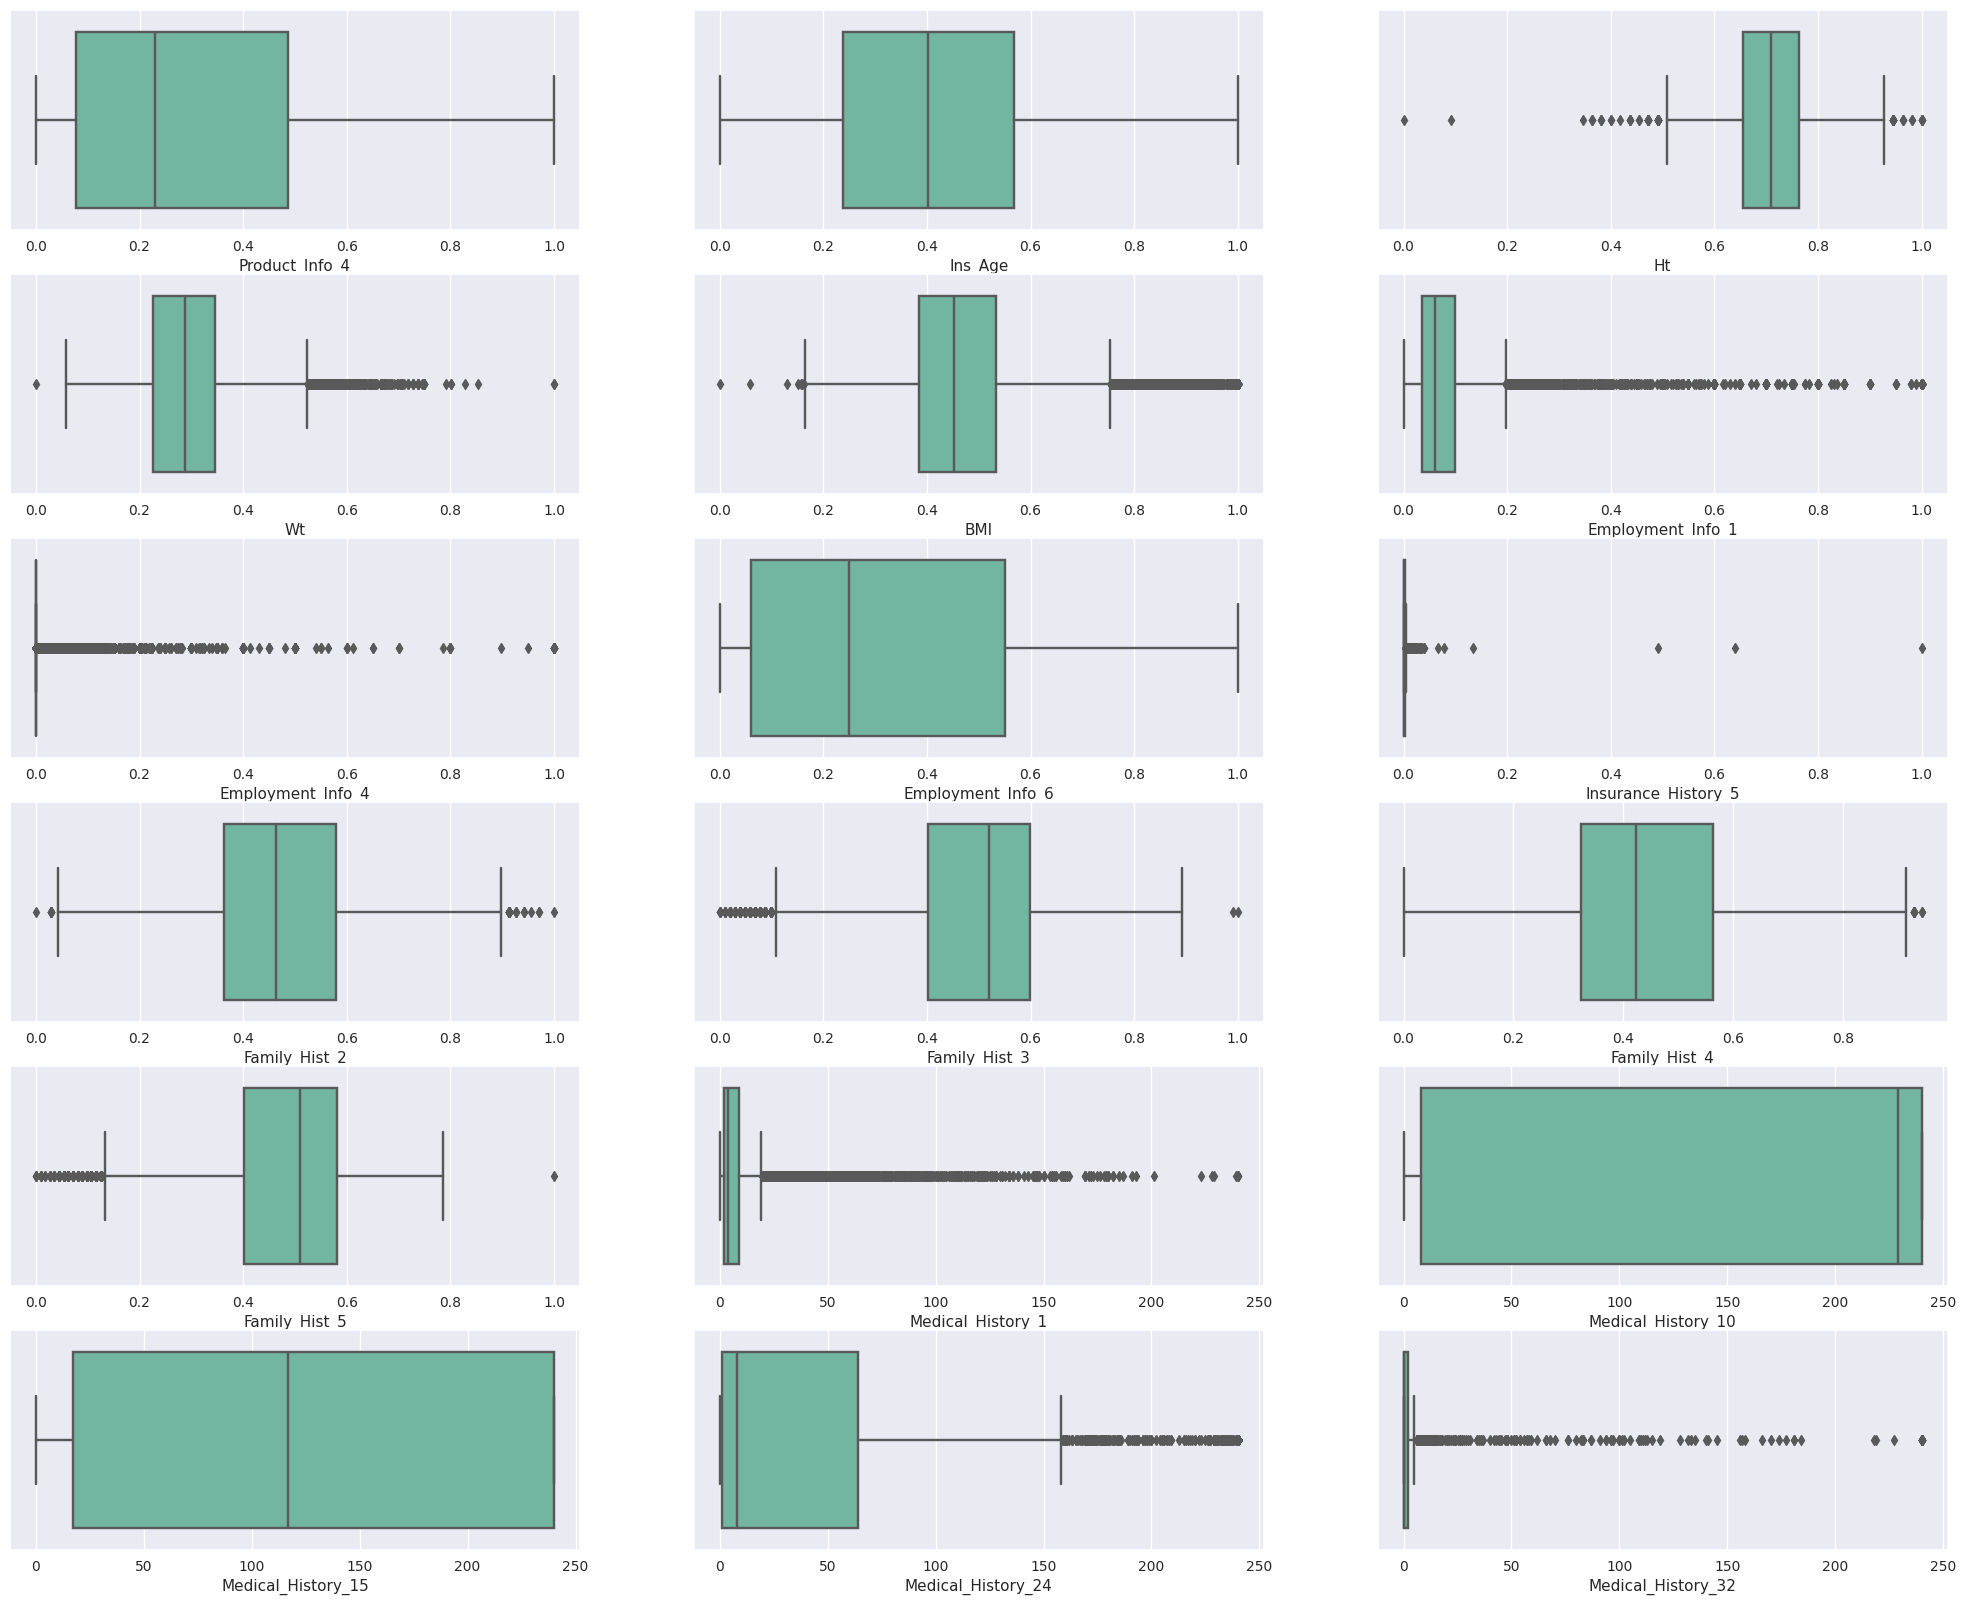

In [ ]:
# Univariate Outliers:

# Construct the subplot matrix
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(25,20))

# Iteratively plot every numerical variable as a boxplot
for i, column in enumerate(df_object[numerical].columns):
    sns.boxplot(data=df_object, x=column, orient="h", palette="Set2", ax=axes[i//3,i%3])

# Observation: Some numerical variable contains outliers

###*Multivariate Outliers*

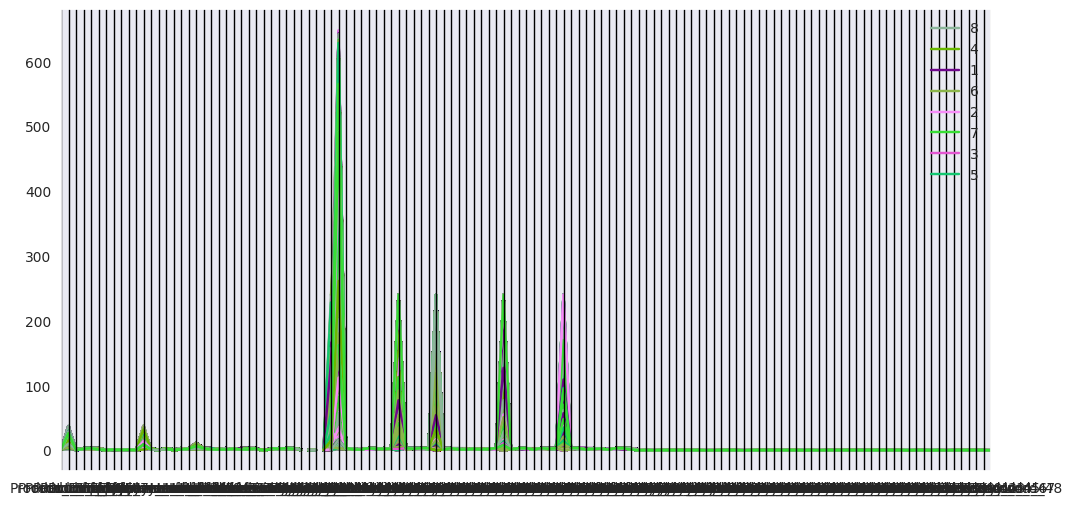

In [ ]:
# Multivariate Outliers (identification using a parallel coordinates plot)
# Excluding `Product_Info_2`, as not be encoded into numerical value yet

plt.figure(figsize = (12,6))
pd.plotting.parallel_coordinates(
    df.drop('Product_Info_2', axis=1), 'Response')
plt.show()

#**Data Preprocessing**


## **Convert Data Types**

In [ ]:
# Construct a list with categorical variables mentioned eailer
categorical_list = "Product_Info_1, Product_Info_2, Product_Info_3, Product_Info_5, Product_Info_6, Product_Info_7, Employment_Info_2, Employment_Info_3, Employment_Info_5, InsuredInfo_1, InsuredInfo_2, InsuredInfo_3, InsuredInfo_4, InsuredInfo_5, InsuredInfo_6, InsuredInfo_7, Insurance_History_1, Insurance_History_2, Insurance_History_3, Insurance_History_4, Insurance_History_7, Insurance_History_8, Insurance_History_9, Family_Hist_1, Medical_History_2, Medical_History_3, Medical_History_4, Medical_History_5, Medical_History_6, Medical_History_7, Medical_History_8, Medical_History_9, Medical_History_11, Medical_History_12, Medical_History_13, Medical_History_14, Medical_History_16, Medical_History_17, Medical_History_18, Medical_History_19, Medical_History_20, Medical_History_21, Medical_History_22, Medical_History_23, Medical_History_25, Medical_History_26, Medical_History_27, Medical_History_28, Medical_History_29, Medical_History_30, Medical_History_31, Medical_History_33, Medical_History_34, Medical_History_35, Medical_History_36, Medical_History_37, Medical_History_38, Medical_History_39, Medical_History_40, Medical_History_41"
categorical_list = categorical_list.split(', ')
# Add dummy encoded variables to the list
for item in ColSet8_MedicalKeywordInfo:
  categorical_list.append(item)
# Convert listed categorical variable to datatype `object`
df[categorical_list] = df[categorical_list].astype('object')

# Convert datatype of response variables to `object`
df['Response']=df['Response'].astype('object')

# Check
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59381 entries, 2 to 79146
Columns: 127 entries, Product_Info_1 to Response
dtypes: float64(18), object(109)
memory usage: 58.0+ MB


## **Drop Duplicate**

In [ ]:
df = df.drop_duplicates()
# Check for duplicates
print('\n Duplicates:',df.duplicated().sum())


 Duplicates: 0


## **Missing Values**

In [ ]:
missing_df

missing_count  missing_percent
Employment_Info_1               19             0.03
Employment_Info_4             6777            11.42
Employment_Info_6            10851            18.28
Insurance_History_5          25388            42.78
Family_Hist_2                28644            48.26
Family_Hist_3                34223            57.66
Family_Hist_4                19176            32.31
Family_Hist_5                41789            70.41
Medical_History_1             8885            14.97
Medical_History_10           58794            99.06
Medical_History_15           44570            75.10
Medical_History_24           55553            93.60
Medical_History_32           58244            98.13

In [ ]:
# Delete features wih more than 48% NaNs
if 'Family_Hist_2' in df.columns:
  df = df.drop(['Family_Hist_2'],axis=1)
if 'Family_Hist_3' in df.columns:
  df = df.drop(['Family_Hist_3'],axis=1)
if 'Family_Hist_5' in df.columns:
  df = df.drop(['Family_Hist_5'],axis=1)
if 'Medical_History_10' in df.columns:
  df = df.drop(['Medical_History_10'],axis=1)
if 'Medical_History_15' in df.columns:
  df = df.drop(['Medical_History_15'],axis=1)
if 'Medical_History_24' in df.columns:
  df = df.drop(['Medical_History_24'],axis=1)
if 'Medical_History_32' in df.columns:
  df = df.drop(['Medical_History_32'],axis=1)

In [ ]:
# Fixing NaNs in 'Employment_Info_1,Employment_Info_4'continuous feature
print(df['Employment_Info_1'].describe())

print(df['Employment_Info_4'].describe())

print(df['Employment_Info_6'].describe())

print(df['Insurance_History_5'].describe())

print(df['Family_Hist_4'].describe())

print(df['Medical_History_1'].describe())

count    59332.000000
mean         0.077520
std          0.082213
min          0.000000
25%          0.035000
50%          0.060000
75%          0.099896
max          1.000000
Name: Employment_Info_1, dtype: float64
count    52574.000000
mean         0.006223
std          0.031941
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Employment_Info_4, dtype: float64
count    48500.000000
mean         0.361335
std          0.349510
min          0.000000
25%          0.060000
50%          0.250000
75%          0.550000
max          1.000000
Name: Employment_Info_6, dtype: float64
count    33963.000000
mean         0.001728
std          0.007332
min          0.000000
25%          0.000400
50%          0.000967
75%          0.002000
max          1.000000
Name: Insurance_History_5, dtype: float64
count    40175.000000
mean         0.444880
std          0.163023
min          0.000000
25%          0.323944
50%          0.422535
75

In [ ]:
# replace the continuos features NAN with mean
df['Employment_Info_1'] = df['Employment_Info_1'].replace(np.nan, 0.8)
df['Employment_Info_4'] = df['Employment_Info_4'].replace(np.nan, 0)
df['Employment_Info_6'] = df['Employment_Info_6'].replace(np.nan, 0.36)
df['Insurance_History_5'] = df['Insurance_History_5'].replace(np.nan, 0.002)
df['Family_Hist_4'] = df['Family_Hist_4'].replace(np.nan, 0.44)
df['Medical_History_1'] = df['Medical_History_1'].replace(np.nan,8)

In [ ]:
df.shape

(59351, 120)

## **Dummy Encoding**

In [ ]:
# One-Hot Encode Categorical Variables
df = pd.get_dummies(data=df, columns=['Product_Info_2'],drop_first=True)

df.shape

(59351, 137)

## **Skewness**

In [ ]:
# Code for skewness correction (see source below)
# Depending upon the characteritics of a feature (column), a log, Box-Cox or power transform is applied to normalize the distribution

# -*- coding: utf-8 -*-
"""
Created on Sat Feb 23 14:42:46 2019
@author: DATAmadness
"""

##################################################
# A function that will accept a pandas dataframe
# and auto-transforms columns that exceeds threshold value
#  -  Offers choice between boxcox or log / exponential transformation
#  -  Automatically handles negative values
#  -  Auto recognizes positive /negative skewness

# Further documentation available here:
# https://datamadness.github.io/Skewness_Auto_Transform

def skew_autotransform(DF, include = None, exclude = None, plot = False, threshold = 1, exp = False):

    #Get list of column names that should be processed based on input parameters
    if include is None and exclude is None:
        colnames = DF.columns.values
    elif include is not None:
        colnames = include
    elif exclude is not None:
        colnames = [item for item in list(DF.columns.values) if item not in exclude]
    else:
        print('No columns to process!')

    #Helper function that checks if all values are positive
    def make_positive(series):
        minimum = np.amin(series)
        #If minimum is negative, offset all values by a constant to move all values to positive teritory
        if minimum <= 0:
            series = series + abs(minimum) + 0.01
        return series


    #Go through desired columns in DataFrame
    for col in colnames:
        #Get column skewness
        skew = DF[col].skew()
        transformed = True

        if plot:
            #Prep the plot of original data
            sns.set_style("darkgrid")
            sns.set_palette("Blues_r")
            fig, axes = plt.subplots(1, 2, figsize=(10, 5))
            #ax1 = sns.distplot(DF[col], ax=axes[0])
            ax1 = sns.histplot(DF[col], ax=axes[0], color="blue", label="100% Equities", kde=True, stat="density", linewidth=0)
            ax1.set(xlabel='Original ' + str(col))

        #If skewness is larger than threshold and positively skewed; If yes, apply appropriate transformation
        if abs(skew) > threshold and skew > 0:
            skewType = 'positive'
            #Make sure all values are positive
            DF[col] = make_positive(DF[col])

            if exp:
               #Apply log transformation
               DF[col] = DF[col].apply(math.log)
            else:
                #Apply boxcox transformation
                DF[col] = ss.boxcox(DF[col])[0]
            skew_new = DF[col].skew()

        elif abs(skew) > threshold and skew < 0:
            skewType = 'negative'
            #Make sure all values are positive
            DF[col] = make_positive(DF[col])

            if exp:
               #Apply exp transformation
               DF[col] = DF[col].pow(10)
            else:
                #Apply boxcox transformation
                DF[col] = ss.boxcox(DF[col])[0]
            skew_new = DF[col].skew()

        else:
            #Flag if no transformation was performed
            transformed = False
            skew_new = skew

        #Compare before and after if plot is True
        if plot:
            print('\n ------------------------------------------------------')
            if transformed:
                print('\n %r had %r skewness of %2.2f' %(col, skewType, skew))
                print('\n Transformation yielded skewness of %2.2f' %(skew_new))
                sns.set_palette("Paired")
                #ax2 = sns.distplot(DF[col], ax=axes[1], color = 'r')
                ax2 = sns.histplot(DF[col], ax=axes[1], color="red", label="100% Equities", kde=True, stat="density", linewidth=0)
                ax2.set(xlabel='Transformed ' + str(col))
                plt.show()
            else:
                print('\n NO TRANSFORMATION APPLIED FOR %r . Skewness = %2.2f' %(col, skew))
                #ax2 = sns.distplot(DF[col], ax=axes[1])
                ax2 = sns.histplot(DF[col], ax=axes[1], color="blue", label="100% Equities", kde=True, stat="density", linewidth=0)
                ax2.set(xlabel='NO TRANSFORM ' + str(col))
                plt.show()


    return DF

In [ ]:
# Split the quant variables and categorical variable
X_quant =  df[['Product_Info_4', 'Ins_Age', 'Ht', 'Wt', 'BMI', 'Employment_Info_1', 'Employment_Info_4', 'Employment_Info_6', 'Insurance_History_5', 'Family_Hist_4','Medical_History_1']]
X_categorical = df.drop(['Product_Info_4', 'Ins_Age', 'Ht', 'Wt', 'BMI', 'Employment_Info_1',
                'Employment_Info_4', 'Employment_Info_6', 'Insurance_History_5',
                'Family_Hist_4','Medical_History_1','Response'],axis=1)
y = df['Response']


 ------------------------------------------------------

 'Product_Info_4' had 'positive' skewness of 1.22

 Transformation yielded skewness of -0.02


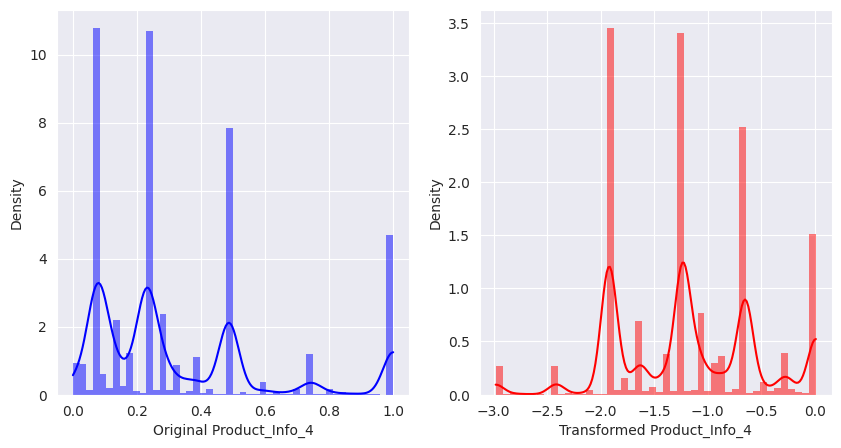


 ------------------------------------------------------

 NO TRANSFORMATION APPLIED FOR 'Ins_Age' . Skewness = 0.02


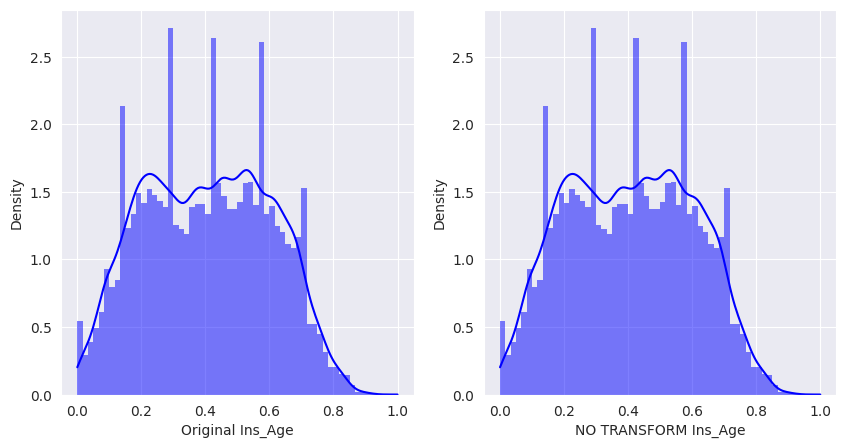


 ------------------------------------------------------

 NO TRANSFORMATION APPLIED FOR 'Ht' . Skewness = -0.09


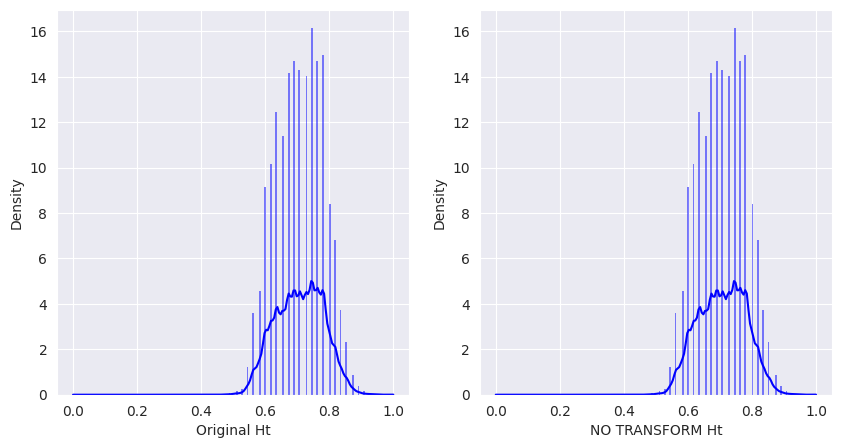


 ------------------------------------------------------

 NO TRANSFORMATION APPLIED FOR 'Wt' . Skewness = 0.69


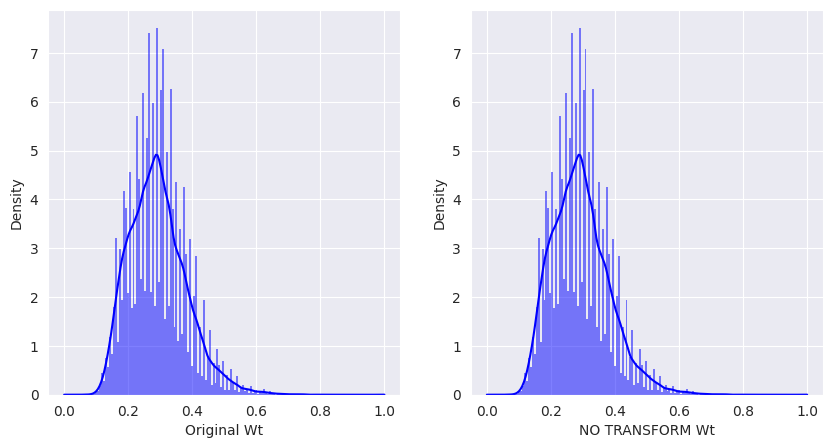


 ------------------------------------------------------

 NO TRANSFORMATION APPLIED FOR 'BMI' . Skewness = 0.94


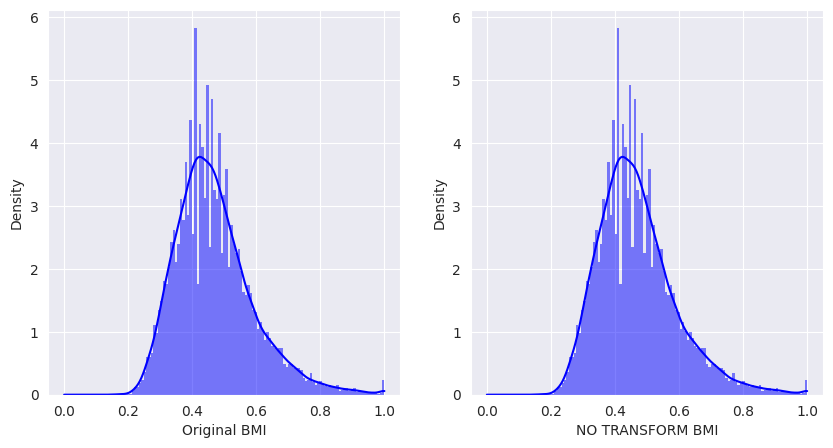


 ------------------------------------------------------

 'Employment_Info_1' had 'positive' skewness of 4.75

 Transformation yielded skewness of 0.03


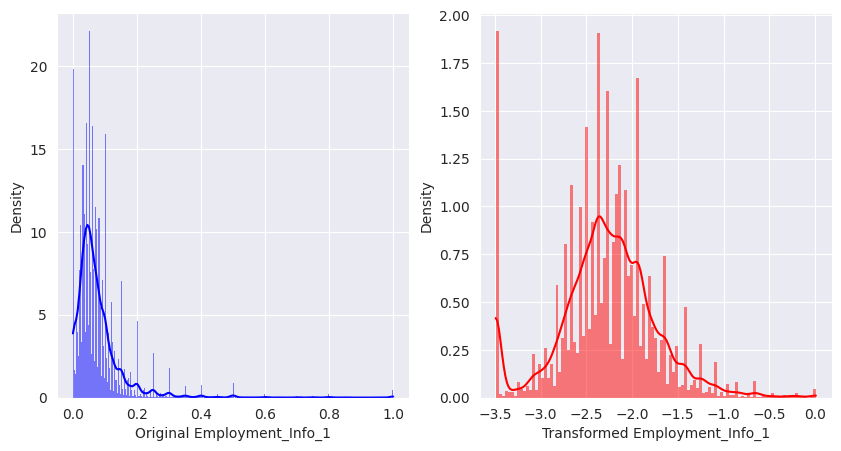


 ------------------------------------------------------

 'Employment_Info_4' had 'positive' skewness of 15.99

 Transformation yielded skewness of 2.33


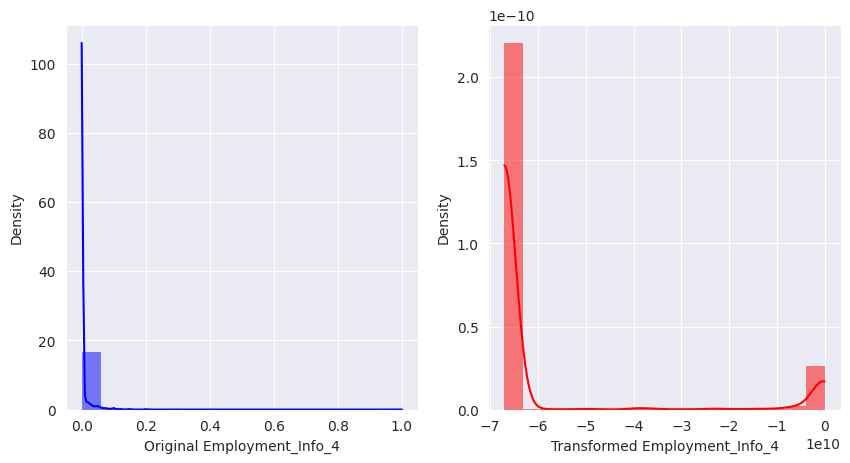


 ------------------------------------------------------

 NO TRANSFORMATION APPLIED FOR 'Employment_Info_6' . Skewness = 0.87


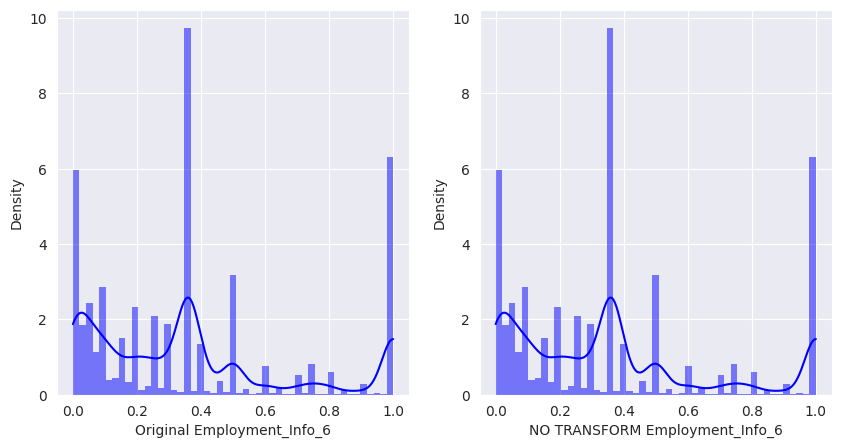


 ------------------------------------------------------

 'Insurance_History_5' had 'positive' skewness of 135.84

 Transformation yielded skewness of -0.02


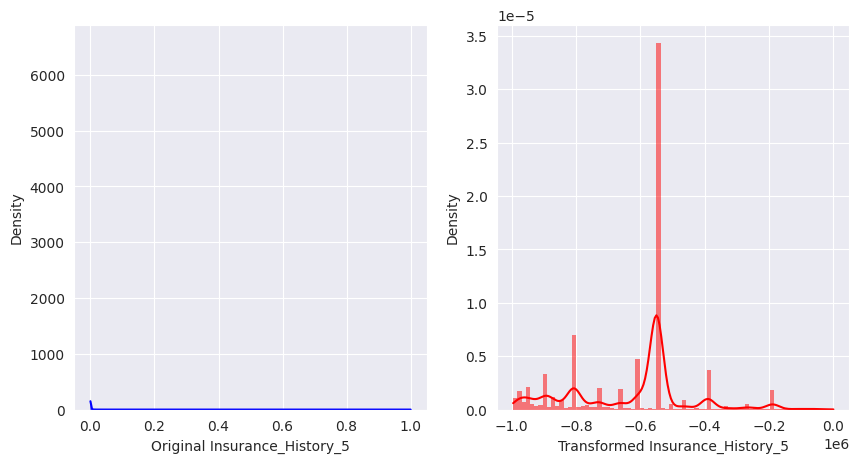


 ------------------------------------------------------

 NO TRANSFORMATION APPLIED FOR 'Family_Hist_4' . Skewness = 0.29


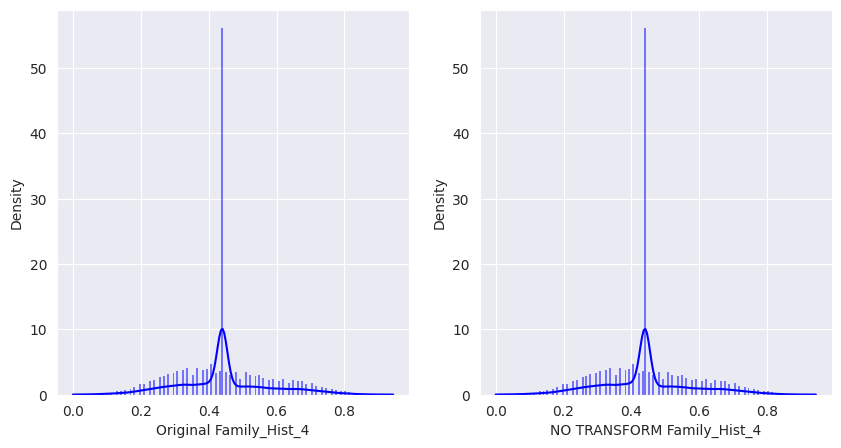


 ------------------------------------------------------

 'Medical_History_1' had 'positive' skewness of 6.11

 Transformation yielded skewness of 0.05


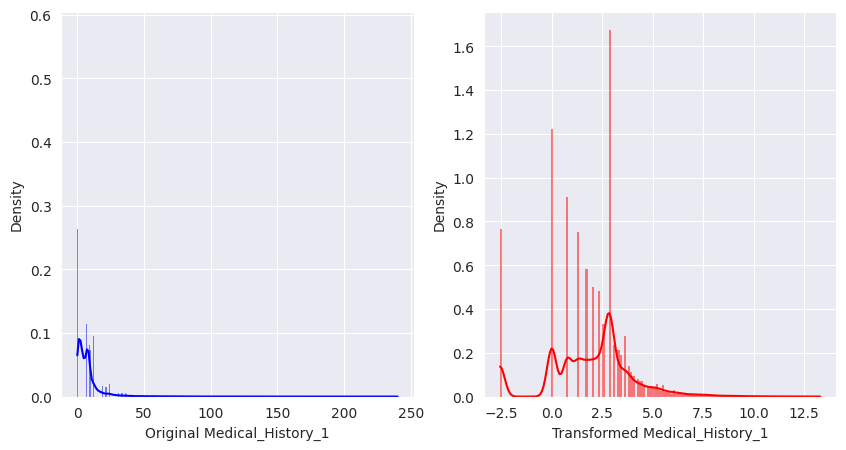

In [ ]:
# Use code above (adapted from https://github.com/datamadness/Automatic-skewness-transformation-for-Pandas-DataFrame) to correct skewness
# All the predictors are real-valued, so we can push them all through the skewness check/correction.
X_quant = skew_autotransform(X_quant.copy(deep=True), plot = True, exp = False, threshold = 1)

## **Outliers**

In [ ]:
# Tukey Rule outliers
# As an alternative, you could use z-scores greater than 3 or less than -3.

cols = X_quant.columns
#Tukey's method
def tukey_rule(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    upper_lim = data[col].quantile(0.5) + 2 * IQR
    lower_lim = data[col].quantile(0.5) - 2 * IQR
    outliers = []
    for index, x in enumerate(data[col]):
        if x < lower_lim or x >= upper_lim:
            outliers.append(index)
    return outliers

# Identify outliers
for i in cols:
  outliers_Tukey = tukey_rule(X_quant,i)
  print("Column ",i,": ",outliers_Tukey)

# Windsorize X and check the results
print("Descriptive Statistics Before", X_quant.describe())
X_quant_winsorized = X_quant.copy(deep=True)
for i in cols:
  X_quant_winsorized[i] = winsorize(X_quant[i], limits=(0.05, 0.05))
print("Descriptive Statistics After", X_quant_winsorized.describe())

Column  Product_Info_4 :  []
Column  Ins_Age :  []
Column  Ht :  [45, 226, 789, 827, 843, 1029, 1906, 3282, 4190, 4254, 4754, 4880, 5059, 6779, 10011, 10581, 11369, 12153, 12838, 13925, 14227, 14251, 14418, 15057, 15391, 16409, 18240, 18728, 19034, 19372, 19498, 21117, 21377, 21405, 22527, 22678, 22996, 23630, 24170, 24504, 25021, 25509, 25542, 25782, 25804, 26106, 26302, 26826, 27007, 27588, 27841, 27851, 27948, 27976, 28959, 29118, 29397, 29509, 30121, 30851, 31333, 31677, 32306, 32717, 33272, 33274, 34419, 34646, 35178, 35430, 36104, 36130, 36303, 36532, 37071, 37332, 40885, 40987, 41004, 41474, 42783, 43963, 44211, 44822, 45785, 47449, 47944, 48115, 48418, 48832, 51176, 52040, 52083, 52906, 53040, 53983, 54744, 54852, 55361, 56151, 56465, 56514, 59091]
Column  Wt :  [22, 84, 97, 106, 129, 191, 218, 252, 277, 317, 330, 481, 484, 514, 634, 663, 687, 792, 801, 816, 843, 1086, 1128, 1135, 1188, 1199, 1327, 1413, 1470, 1500, 1523, 1607, 1654, 1672, 1682, 1855, 1903, 1997, 2116, 2234, 22

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4650: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4650: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4650: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4650: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4650: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4650: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition

Descriptive Statistics After        Product_Info_4       Ins_Age            Ht            Wt           BMI  \
count    59351.000000  59351.000000  59351.000000  59351.000000  59351.000000   
mean        -1.163742      0.404814      0.706692      0.290536      0.466405   
std          0.624342      0.189606      0.069613      0.080023      0.107753   
min         -1.922281      0.089552      0.581818      0.163180      0.302855   
25%         -1.922281      0.238806      0.654545      0.225941      0.385517   
50%         -1.235182      0.402985      0.709091      0.288703      0.451349   
75%         -0.651127      0.567164      0.763636      0.345188      0.532858   
max          0.009960      0.716418      0.818182      0.451883      0.699805   

       Employment_Info_1  Employment_Info_4  Employment_Info_6  \
count       59351.000000       5.935100e+04       59351.000000   
mean           -2.296505      -5.901123e+10           0.361091   
std             0.507944       2.122835e+10

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4650: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


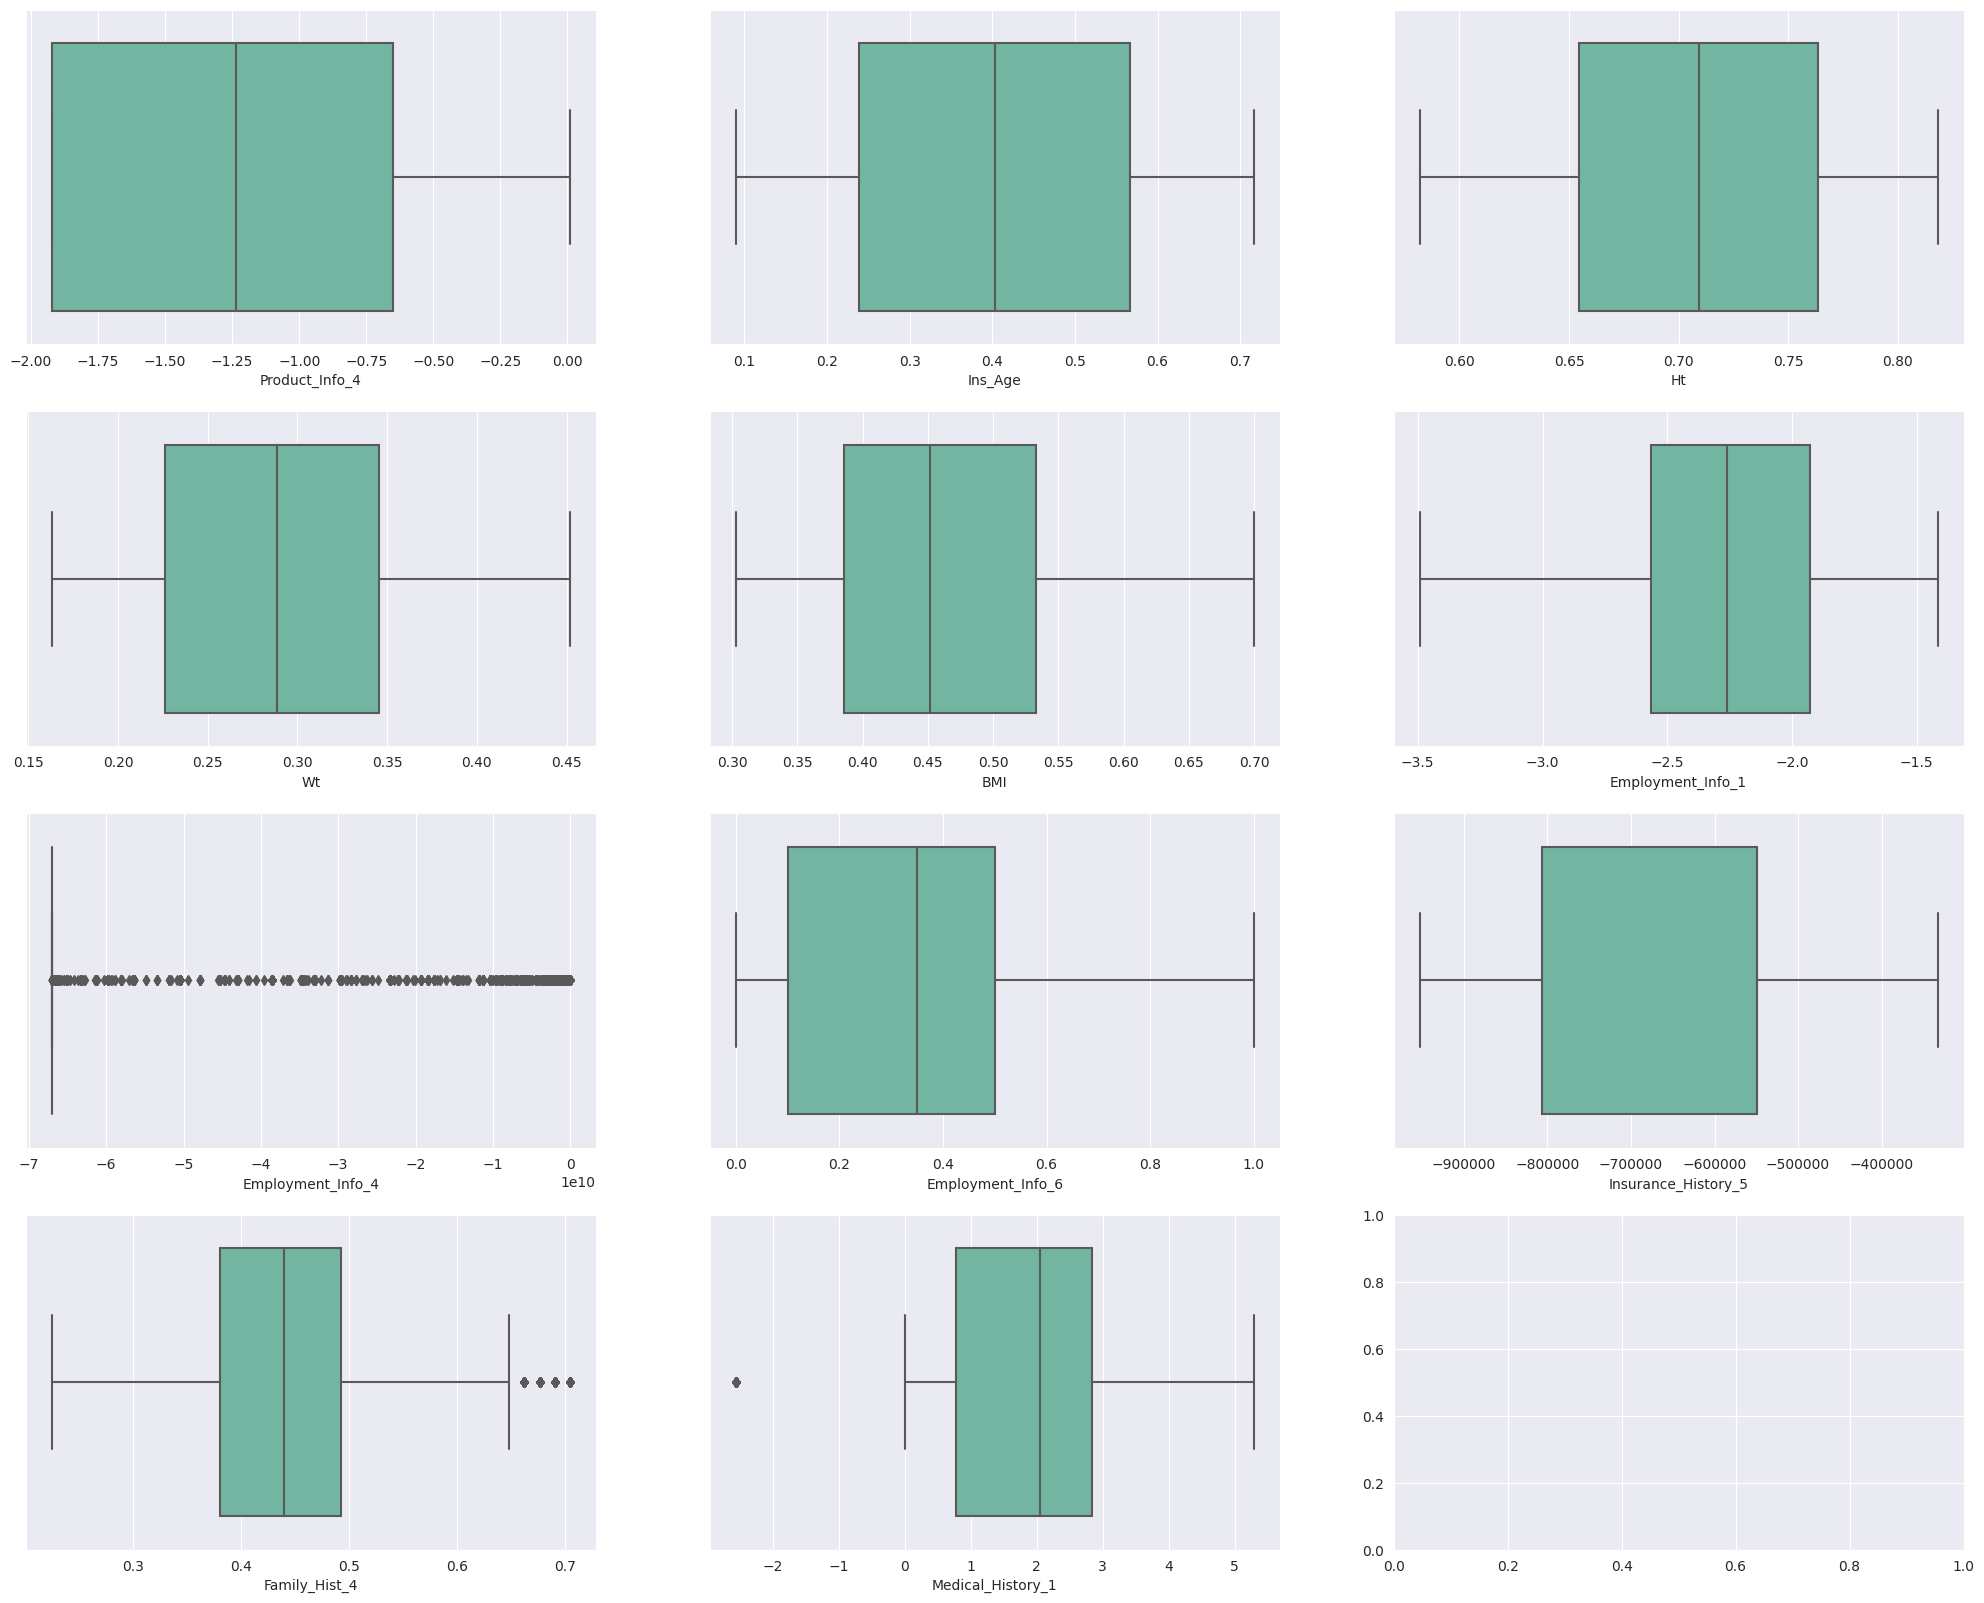

In [ ]:
# Check Univariate Outliers:

# Construct the subplot matrix
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(25,20))
for i, column in enumerate(X_quant_winsorized.columns):
    sns.boxplot(data=X_quant_winsorized, x=column, orient="h", palette="Set2", ax=axes[i//3,i%3])

In [ ]:
df = pd.concat([X_quant_winsorized,X_categorical,y],axis=1)
df.shape

(59351, 137)

In [ ]:
# Exporting dataframe before Undersampling
df.to_csv('Cleaned_Prudential_V1.csv', index=True)

## **Under Sampling**

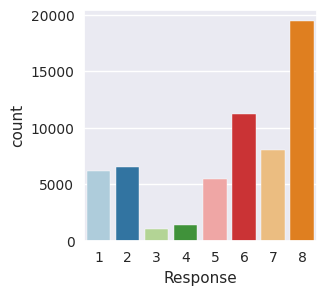

In [ ]:
plt.figure(figsize=(3,3))
sns.countplot(x=df['Response']);
plt.show()
# the current `response` variable has 8 unique values
# first step is to cut class 8, 6 instances to macth 7

In [ ]:
# Split the dataset into majority and minority classes
majority_class8 = df[df['Response'] == 8]
majority_class6 = df[df['Response'] == 6]
minority_classes = df[(df['Response'] != 6) & (df['Response'] != 8)]

# Calculate the number of instances to keep after undersampling (same as class 7)
n_samples = len(df[df['Response'] == 7])

# Randomly undersample the majority class to the desired number of instances
undersampled_majority_class8 = resample(majority_class8, replace=False, n_samples=n_samples, random_state=12)
undersampled_majority_class6 = resample(majority_class6, replace=False, n_samples=n_samples, random_state=34)

# Combine the undersampled majority class with the minority classes
undersampled_df = pd.concat([undersampled_majority_class8, undersampled_majority_class6, minority_classes])


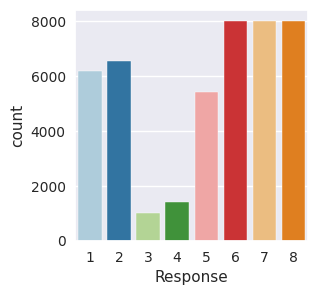

In [ ]:
# The distribution now does not have a significant majority class
plt.figure(figsize=(3,3))
sns.countplot(x=undersampled_df['Response']);
plt.show()

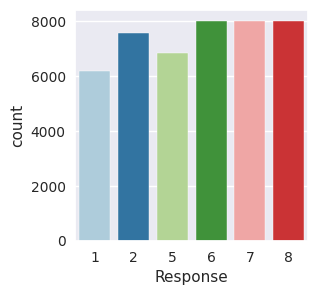

In [ ]:
# Combine 3 and 2 to 2 , and combine 4, 5 to 5
undersampled_df['Response'] = undersampled_df['Response'].replace(3, 2)
undersampled_df['Response'] = undersampled_df['Response'].replace(4, 5)

# Check
plt.figure(figsize=(3,3))
sns.countplot(x=undersampled_df['Response']);
plt.show()

## **Split Data**

In [ ]:
df = undersampled_df.copy(deep=True)

# Split Predictors
y = df['Response']

X = df.drop(['Response'],axis=1)

X.shape

(44698, 136)

## **Oversampling (SMOTE) DONT USE**

In [ ]:
# # SMOTE (oversampling)

# import imblearn
# print("imblearn version: ", imblearn.__version__)

# from imblearn.over_sampling import SMOTE

# sm = SMOTE(random_state=123456)
# X_SMOTE, y_SMOTE = sm.fit_resample(X, y)

# print("Shape before SMOTE: ", X.shape, y.shape, "\n")
# print("Shape after SMOTE: ", X_SMOTE.shape, y_SMOTE.shape, "\n")

imblearn version:  0.10.1
Shape before SMOTE:  (44698, 136) (44698,) 

Shape after SMOTE:  (64200, 136) (64200,) 



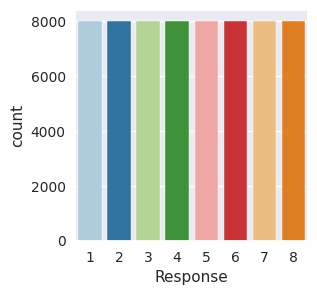

In [ ]:
# # Check the Response Variable after SMOTE
# plt.figure(figsize=(3,3))
# sns.countplot(x=y_SMOTE);
# plt.show()

In [ ]:
# y_SMOTE = y_SMOTE.astype('object')
# df = pd.concat([X_SMOTE,y_SMOTE],axis=1)
# df.shape

(64200, 137)

## **Export Cleaned CSV**

In [ ]:
df.to_csv('Cleaned_Prudential.csv', index=True)